# Dataset divided with ['Is Attack IP'] == True | ['Is Account Takeover'] == True | ['Login Successful'] == False

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

safe = pd.read_csv('divided-chunks/3096534_safe_dataset.csv', dtype={"Login Timestamp": object, "User ID": float, "IP Address": object, "Country": object, "ASN": float, "Browser Name and Version": object, "OS Name and Version": object, "Device Type": object, "Login Successfull": bool, "Is Attack IP": bool, "Is Account Takeover": bool})
susp = pd.read_csv('divided-chunks/suspicious_dataset_3m.csv', low_memory=False)

In [2]:
safe['Login Timestamp'] =  pd.to_datetime(safe['Login Timestamp'], infer_datetime_format=True)
susp['Login Timestamp'] =  pd.to_datetime(susp['Login Timestamp'], infer_datetime_format=True)
susp.dropna(axis = 0, how = 'all', inplace = True)
safe.dropna(axis = 0, how = 'all', inplace = True)

In [3]:
susp['IP Address'] = susp['IP Address'].apply(lambda x: str(x))
# susp["IP Address"] = susp["IP Address"].apply(lambda x: x.split("."))
safe['IP Address'] = safe['IP Address'].apply(lambda x: str(x))
# safe["IP Address"] = safe["IP Address"].apply(lambda x: x.split("."))

In [4]:
susp = susp.reset_index(drop=True)
safe = safe.reset_index(drop=True)

In [5]:
susp[susp.isna().any(axis=1)].count

<bound method DataFrame.count of               ASN Browser Name and Version Country Device Type  \
3331     137308.0          134 Browser 1.0      ID         NaN   
18071    137308.0          134 Browser 1.0      ID         NaN   
24814    137308.0          134 Browser 1.0      ID         NaN   
29269    137308.0          134 Browser 1.0      ID         NaN   
29848    393398.0          134 Browser 1.0      US         NaN   
...           ...                      ...     ...         ...   
3049346   24521.0          134 Browser 1.0      ID         NaN   
3054103  398986.0          134 Browser 1.0      US         NaN   
3058057  393398.0          134 Browser 1.0      US         NaN   
3072558   24521.0          134 Browser 1.0      ID         NaN   
3085431   24521.0          134 Browser 1.0      ID         NaN   

              IP Address Is Account Takeover Is Attack IP Login Successful  \
3331      103.108.187.47               False         True            False   
18071     103.108.

In [6]:
safe[safe.isna().any(axis=1)].count

<bound method DataFrame.count of                 Login Timestamp       User ID      IP Address Country  \
12062   2020-04-22 17:32:16.256 -4.324476e+18   170.39.78.117      US   
16945   2020-06-25 00:30:53.856 -4.324476e+18  23.137.225.204      US   
44975   2021-02-02 03:55:55.213 -4.324476e+18  185.112.224.98      DK   
45154   2020-12-06 10:33:56.092 -4.324476e+18   46.254.120.61      DE   
84621   2020-10-18 13:29:39.817 -4.324476e+18    170.39.77.11      US   
...                         ...           ...             ...     ...   
2946972 2020-07-01 16:27:41.949 -4.324476e+18     91.200.44.0      RU   
2956874 2020-03-18 15:01:40.283 -4.324476e+18    152.93.30.73      NO   
2965495 2020-07-01 17:45:49.284 -4.324476e+18    10.4.128.230      ID   
2968845 2020-05-16 21:55:14.176 -4.324476e+18      10.3.82.21      HU   
2994978 2020-07-09 01:02:45.421 -4.324476e+18    10.4.129.199      BE   

              ASN Browser Name and Version OS Name and Version Device Type  \
12062    393

In [7]:
searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
safe["Blacklisted"] = np.where(safe["Country"].str.contains('|'.join(searchfor)), True, False)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4      mobile              True   
1      Iron 66.0.3450.1084          iOS 11.2.6      mobile             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6     desktop              True   
3      Firefox Mobile 84.0         Android 4.1      mobile             False   
4      Firefox 20.0.0.1673            iOS 13.4      mobile              True   

   Is Attack IP  Is Account Takeover  Blacklisted  
0         False                False        False  
1         False                False         True  
2         False                False        False  
3         False                False        False  
4         False                False        False

In [8]:
susp["Blacklisted"] = np.where(susp["Country"].str.contains('|'.join(searchfor)), True, False)
susp.head()

ASN         Browser Name and Version Country Device Type  \
0  398986.0  Chrome Mobile WebView 85.0.4183      US      mobile   
1  393398.0  Chrome Mobile WebView 85.0.4183      US      mobile   
2  393398.0          Chrome Mobile 51.0.2704      US      mobile   
3  393398.0          Chrome Mobile 84.0.4147      US      mobile   
4  266433.0           Chrome 69.0.3497.17.19      BR     desktop   

        IP Address Is Account Takeover Is Attack IP Login Successful  \
0        10.0.0.47               False         True            False   
1  209.236.123.126               False         True            False   
2    38.135.39.102               False         True            False   
3  209.236.117.198               False         True             True   
4     170.82.7.240               False         True            False   

          Login Timestamp OS Name and Version       User ID  Blacklisted  
0 2020-02-03 12:43:59.396         Android 2.2 -4.618854e+18         True  
1 2020-02-03 12:44:05.160         Android 4.1 -4.324476e+18         True  
2 2020-02-03 12:44:40.204         Android 4.1  9.133471e+18         True  
3 2020-02-03 12:45:13.655   Windows Phone 8.1 -3.522289e+18         True  
4 2020-02-03 12:45:16.478    Mac OS X 10.14.6 -6.623218e+18         True

In [9]:
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
safe = safe.replace(cleanup_devices)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4           M              True   
1      Iron 66.0.3450.1084          iOS 11.2.6           M             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6           D              True   
3      Firefox Mobile 84.0         Android 4.1           M             False   
4      Firefox 20.0.0.1673            iOS 13.4           M              True   

   Is Attack IP  Is Account Takeover  Blacklisted  
0         False                False        False  
1         False                False         True  
2         False                False        False  
3         False                False        False  
4         False                False        False

In [10]:
susp = susp.replace(cleanup_devices)
susp.head()

ASN         Browser Name and Version Country Device Type  \
0  398986.0  Chrome Mobile WebView 85.0.4183      US           M   
1  393398.0  Chrome Mobile WebView 85.0.4183      US           M   
2  393398.0          Chrome Mobile 51.0.2704      US           M   
3  393398.0          Chrome Mobile 84.0.4147      US           M   
4  266433.0           Chrome 69.0.3497.17.19      BR           D   

        IP Address Is Account Takeover Is Attack IP Login Successful  \
0        10.0.0.47               False         True            False   
1  209.236.123.126               False         True            False   
2    38.135.39.102               False         True            False   
3  209.236.117.198               False         True             True   
4     170.82.7.240               False         True            False   

          Login Timestamp OS Name and Version       User ID  Blacklisted  
0 2020-02-03 12:43:59.396         Android 2.2 -4.618854e+18         True  
1 2020-02-03 12:44:05.160         Android 4.1 -4.324476e+18         True  
2 2020-02-03 12:44:40.204         Android 4.1  9.133471e+18         True  
3 2020-02-03 12:45:13.655   Windows Phone 8.1 -3.522289e+18         True  
4 2020-02-03 12:45:16.478    Mac OS X 10.14.6 -6.623218e+18         True

In [11]:
safe["Browser Type"] = (np.where(safe["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(safe["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
safe = safe.replace(cleanup_browser)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4           M              True   
1      Iron 66.0.3450.1084          iOS 11.2.6           M             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6           D              True   
3      Firefox Mobile 84.0         Android 4.1           M             False   
4      Firefox 20.0.0.1673            iOS 13.4           M              True   

   Is Attack IP  Is Account Takeover  Blacklisted Browser Type  
0         False                False        False            F  
1         False                False         True            O  
2         False                False        False            C  
3         False                False        False            F  
4         False                False        False            F

In [12]:
susp["Browser Type"] = (np.where(susp["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(susp["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
susp = susp.replace(cleanup_browser)
susp.tail()

ASN         Browser Name and Version Country Device Type  \
3097036  500035.0                      Linkbot 1.0      ID           B   
3097037  208653.0     Chrome Mobile 81.0.4044.1947      DE           M   
3097038   22612.0             Chrome 72.0.3626.116      ID           D   
3097039  393398.0     Chrome Mobile 81.0.4044.1933      US           M   
3097040  197175.0  Chrome Mobile WebView 43.0.2357      CA           M   

              IP Address Is Account Takeover Is Attack IP Login Successful  \
3097036      10.0.37.160               False         True            False   
3097037    5.183.138.218               False         True            False   
3097038  199.188.207.122               False         True            False   
3097039  209.236.125.108               False         True            False   
3097040      10.0.16.204               False         True            False   

                Login Timestamp OS Name and Version       User ID  \
3097036 2021-02-28 23:57:00.409              Other  -4.324476e+18   
3097037 2021-02-28 23:57:20.002         Android 4.1 -4.324476e+18   
3097038 2021-02-28 23:58:04.017    Mac OS X 10.14.6 -4.324476e+18   
3097039 2021-02-28 23:58:44.011            iOS 13.4 -4.324476e+18   
3097040 2021-02-28 23:59:22.608          iOS 12.4.6 -4.324476e+18   

         Blacklisted Browser Type  
3097036         True            O  
3097037        False            C  
3097038         True            C  
3097039         True            C  
3097040        False            C

**Preparing dataset is done.**

### ATO 10/1000

In [13]:
# random sample for ML part with 10/1000 ato
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(600), safe.head(390), s.head(10)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df.to_csv('new_modified_sample_dataset1000.csv', encoding='utf-8', index=False)

In [15]:
df1 = df.copy()
df1.drop("OS Name and Version", inplace=True, axis=1)
df1.drop("Browser Name and Version", inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ASN                  1000 non-null   float64       
 1   Country              1000 non-null   object        
 2   Device Type          1000 non-null   object        
 3   IP Address           1000 non-null   object        
 4   Is Account Takeover  1000 non-null   object        
 5   Is Attack IP         1000 non-null   object        
 6   Login Successful     1000 non-null   object        
 7   Login Timestamp      1000 non-null   datetime64[ns]
 8   User ID              1000 non-null   float64       
 9   Blacklisted          1000 non-null   bool          
 10  Browser Type         1000 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(7)
memory usage: 79.2+ KB


In [16]:
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  1000 non-null   float64 
 1   Country              1000 non-null   category
 2   Device Type          1000 non-null   category
 3   IP Address           1000 non-null   category
 4   Is Account Takeover  1000 non-null   bool    
 5   Is Attack IP         1000 non-null   bool    
 6   Login Successful     1000 non-null   bool    
 7   Login Timestamp      1000 non-null   category
 8   User ID              1000 non-null   float64 
 9   Blacklisted          1000 non-null   bool    
 10  Browser Type         1000 non-null   category
dtypes: bool(4), category(5), float64(2)
memory usage: 90.7 KB


In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## XGB Classifier - EXPERIMENTAL
##### https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  1000 non-null   float64 
 1   Country              1000 non-null   category
 2   Device Type          1000 non-null   category
 3   IP Address           1000 non-null   category
 4   Is Attack IP         1000 non-null   bool    
 5   Login Successful     1000 non-null   bool    
 6   Login Timestamp      1000 non-null   category
 7   User ID              1000 non-null   float64 
 8   Blacklisted          1000 non-null   bool    
 9   Browser Type         1000 non-null   category
 10  Is Account Takeover  1000 non-null   bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 90.7 KB
Feature importances:
[0.13135657 0.49352363 0.07387897 0.         0.         0.05633408
 0.20868494 0.03622184 0.         0.        ]


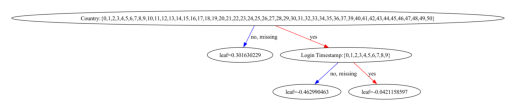

In [21]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model.json")
# #eval results
# clf.evals_result_
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("./caterogical-model-graph.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

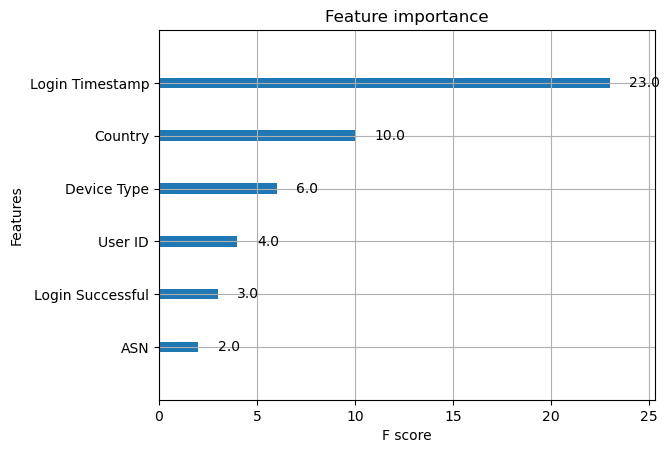

In [20]:
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [22]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  1000 non-null   float64
 1   Country              1000 non-null   int8   
 2   Device Type          1000 non-null   int8   
 3   IP Address           1000 non-null   int16  
 4   Is Account Takeover  1000 non-null   bool   
 5   Is Attack IP         1000 non-null   bool   
 6   Login Successful     1000 non-null   bool   
 7   Login Timestamp      1000 non-null   int16  
 8   User ID              1000 non-null   float64
 9   Blacklisted          1000 non-null   bool   
 10  Browser Type         1000 non-null   int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 26.5 KB


ASN  Country  Device Type  IP Address  Is Account Takeover  \
0  208653.0       14            2         474                False   
1    3280.0       38            1         273                 True   
2  393398.0       46            2         347                False   
3  393398.0       46            4         201                False   
4  197535.0       39            1         627                False   

   Is Attack IP  Login Successful  Login Timestamp       User ID  Blacklisted  \
0          True             False              648 -4.324476e+18        False   
1          True              True               14 -5.783801e+18        False   
2          True             False              762 -4.324476e+18         True   
3         False             False              385 -4.324476e+18         True   
4          True             False              882 -4.324476e+18         True   

   Browser Type  
0             0  
1             0  
2             0  
3             2  
4             0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 99.30%
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       429
        True       0.25      1.00      0.40         1

    accuracy                           0.99       430
   macro avg 

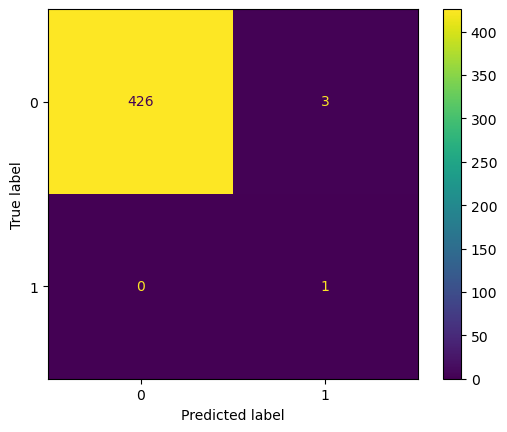

In [28]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.43
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 794 records for the majority class and 6 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       196
        True       0.02      1.00      0.04         4

    accuracy                           0.02       200
   macro avg       0.01      0.50      0.02       200
weighted avg       0.00      0.02      0.00       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       196
        True       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200

[[  0 196]
 [  0   4]]


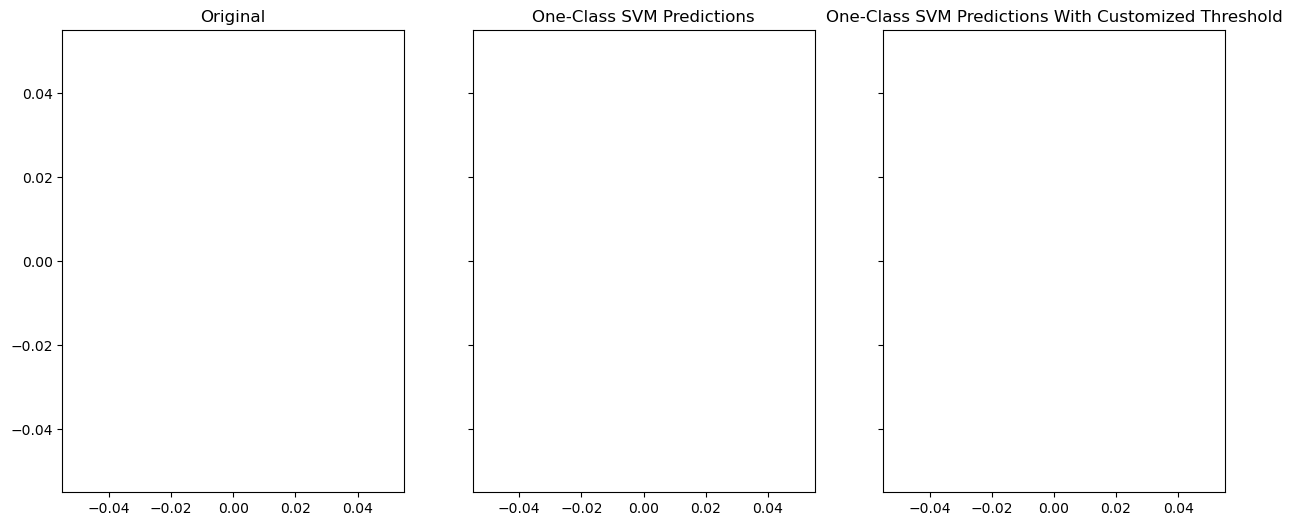

In [29]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 695 records for the majority class and 5 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       295
        True       0.02      1.00      0.03         5

    accuracy                           0.02       300
   macro avg       0.01      0.50      0.02       300
weighted avg       0.00      0.02      0.00       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       295
        True       0.00      0.00      0.00         5

    accuracy                           0.98       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.98      0.98       300

[[  0 295]
 [  0   5]]


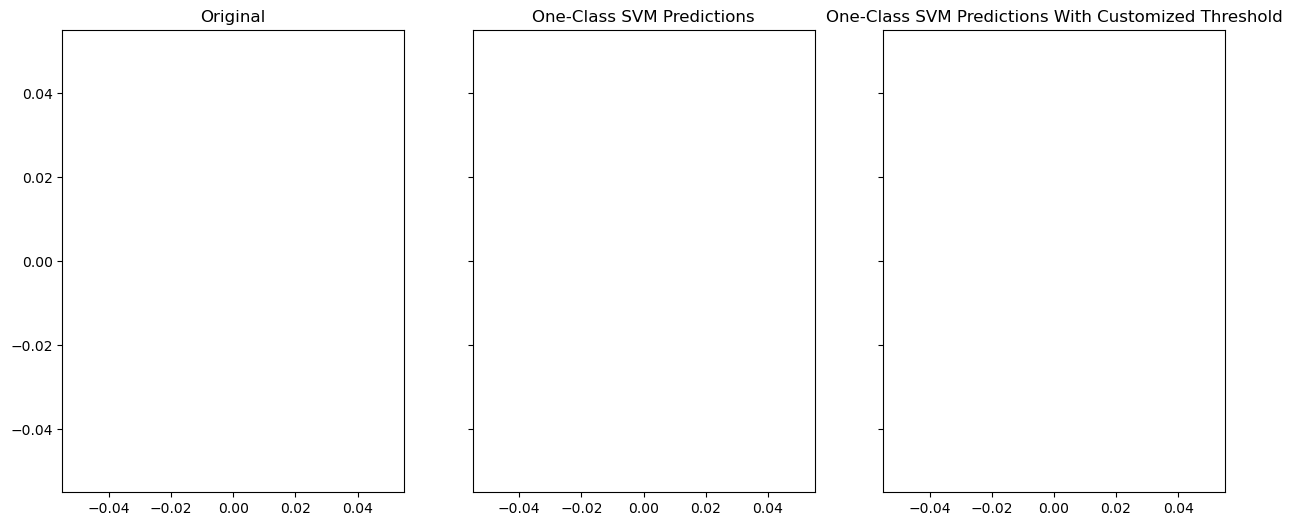

In [30]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Login Timestamp'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 498 records for the majority class and 2 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       492
        True       0.02      1.00      0.03         8

    accuracy                           0.02       500
   macro avg       0.01      0.50      0.02       500
weighted avg       0.00      0.02      0.00       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       492
        True       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500

[[  0 492]
 [  0   8]]


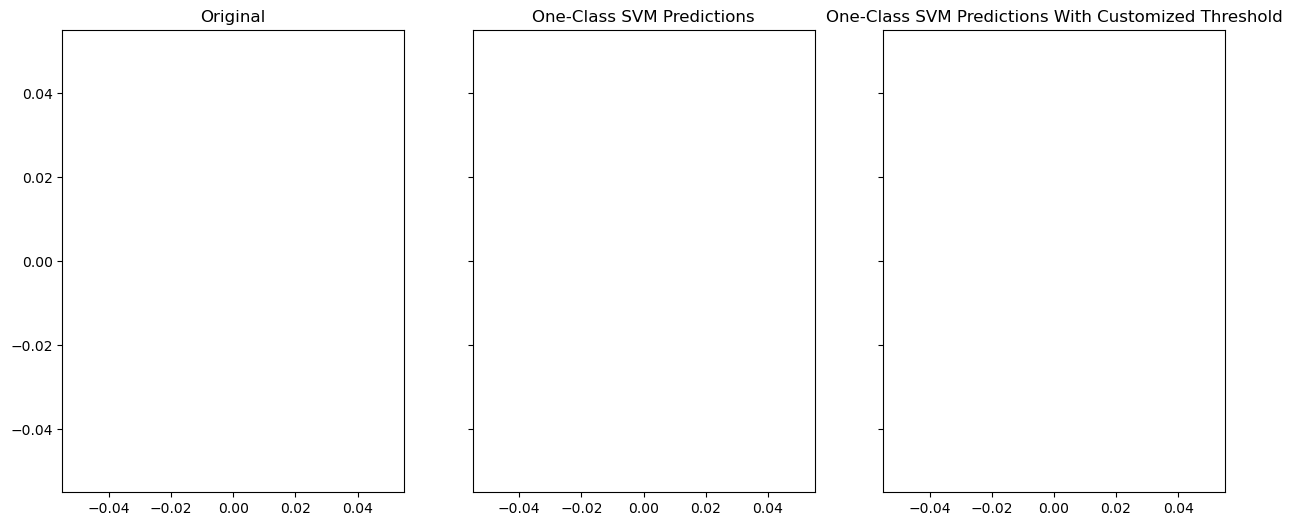

In [31]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Login Timestamp'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [32]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0            True        False        0.023674        1                False
1            True        False       -0.217652       -1                 True
2            True         True        0.074817        1                False
3           False         True        0.000000        1                False
4            True         True        0.074817        1                False
..            ...          ...             ...      ...                  ...
995          True         True        0.074817        1                False
996         False         True        0.000000        1                False
997          True        False        0.023674        1                False
998          True         True        0.074817        1                False
999         False        False        0.048050        1                False

[1000 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  990
Total Number of Values: 1000


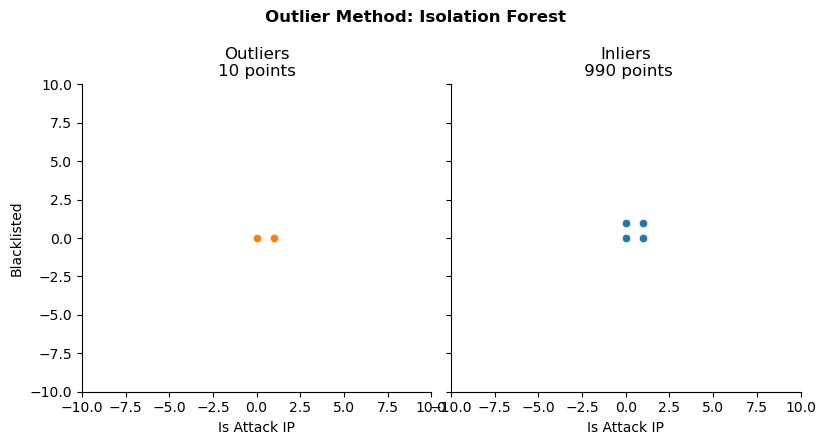

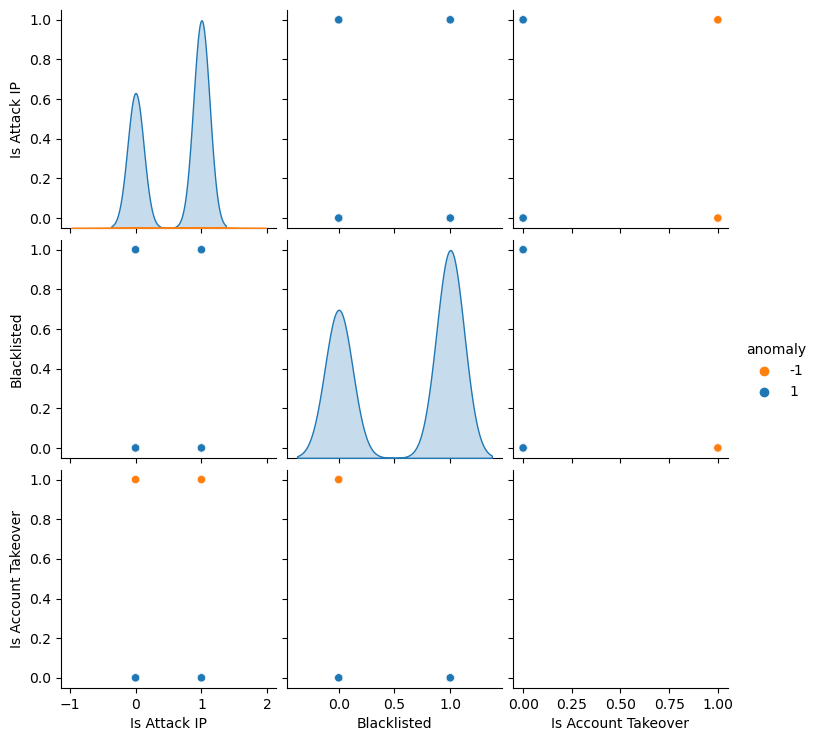

In [33]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 155
Number of non anomalous values  845
Total Number of Values: 1000


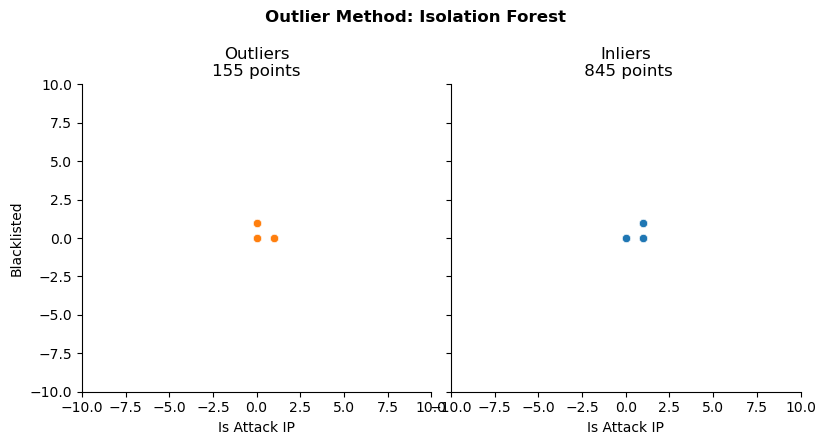

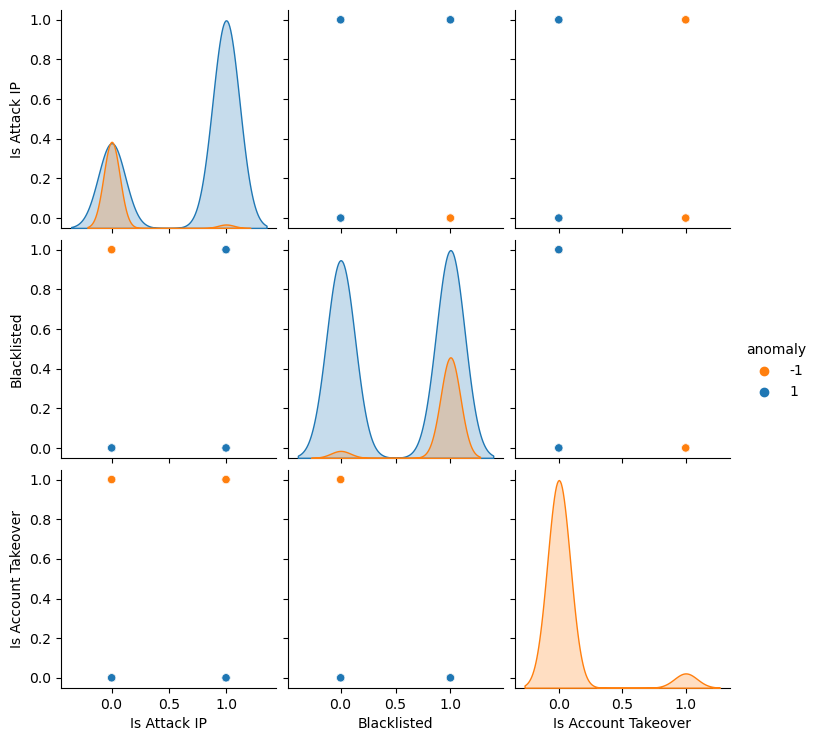

In [34]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 322
Number of non anomalous values  678
Total Number of Values: 1000


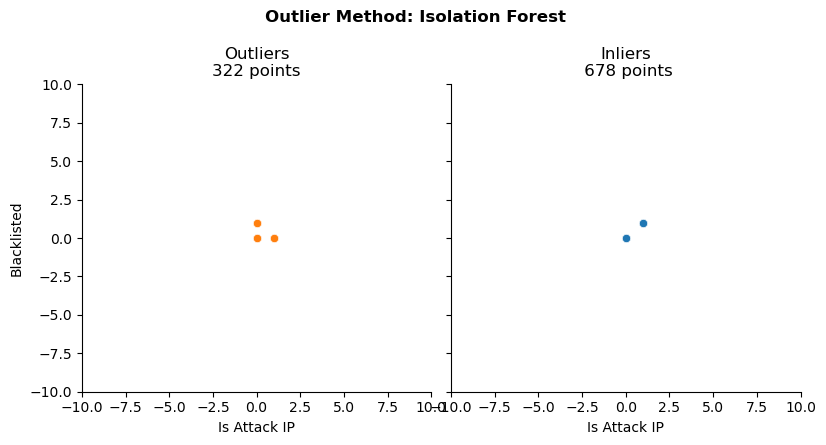

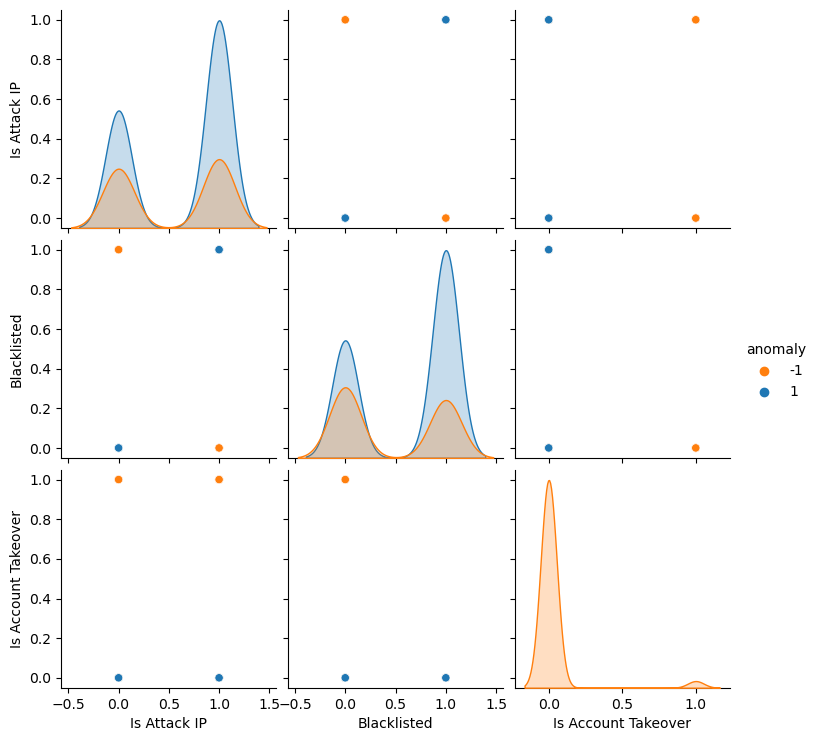

In [35]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [36]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Login Successful  Browser Type  anomaly_scores  anomaly  \
0               False             0        0.152462        1   
1                True             0       -0.163694       -1   
2               False             0        0.152462        1   
3               False             2        0.046200        1   
4               False             0        0.152462        1   
..                ...           ...             ...      ...   
995              True             0        0.111155        1   
996             False             2        0.046200        1   
997              True             0        0.111155        1   
998             False             2        0.046200        1   
999             False             0        0.152462        1   

     Is Account Takeover  
0                  False  
1                   True  
2                  False  
3                  False  
4                  False  
..                   ...  
995                False  
996                False  
997                False  
998                False  
999                False  

[1000 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 79
Number of non anomalous values  921
Total Number of Values: 1000


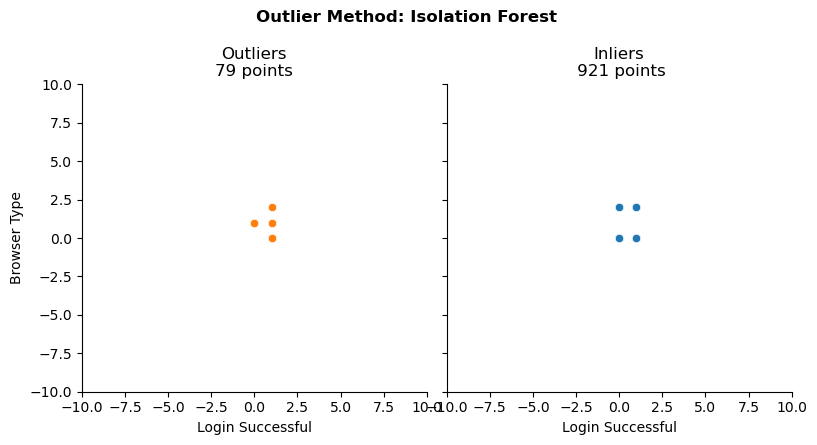

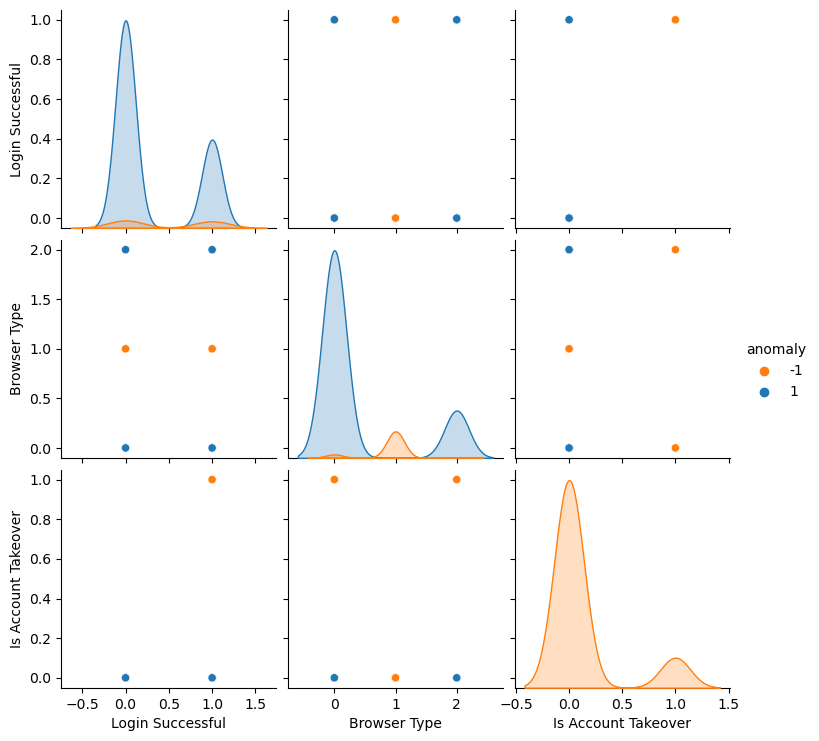

In [37]:
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 250
Number of non anomalous values  750
Total Number of Values: 1000


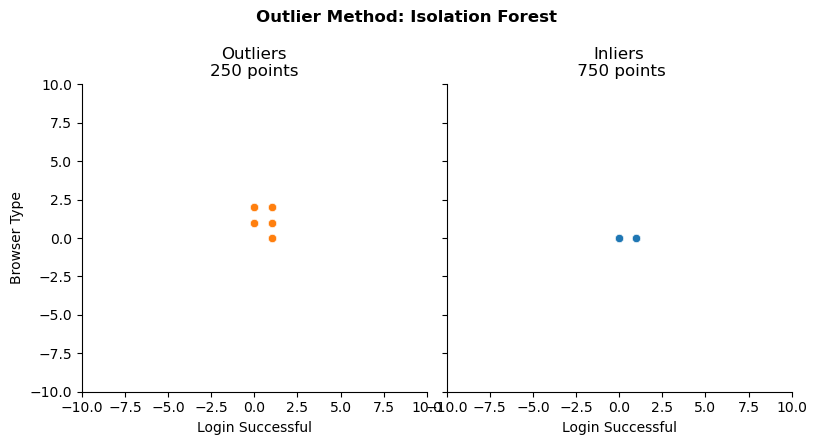

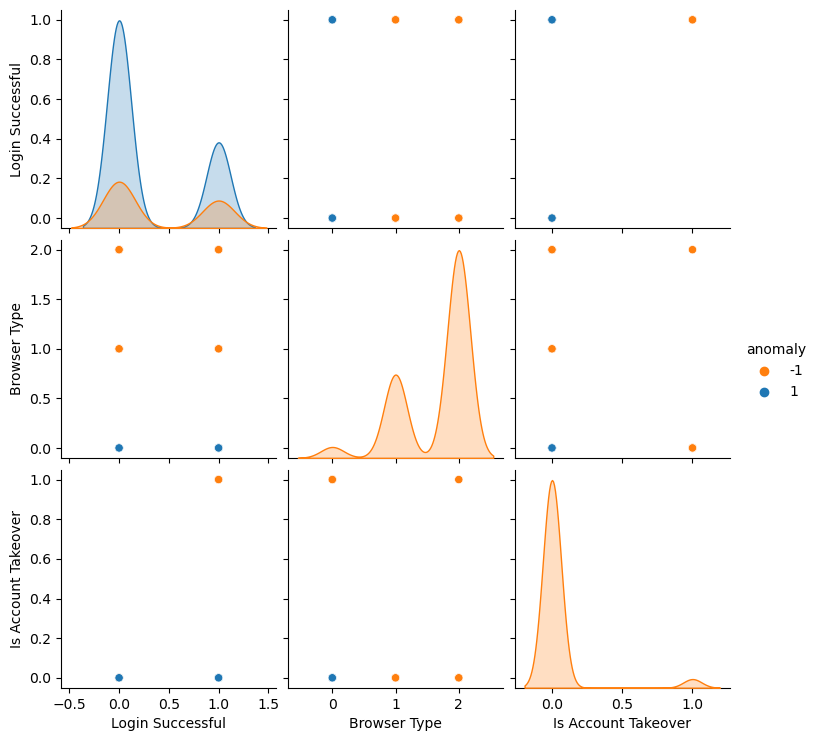

In [38]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 469
Number of non anomalous values  531
Total Number of Values: 1000


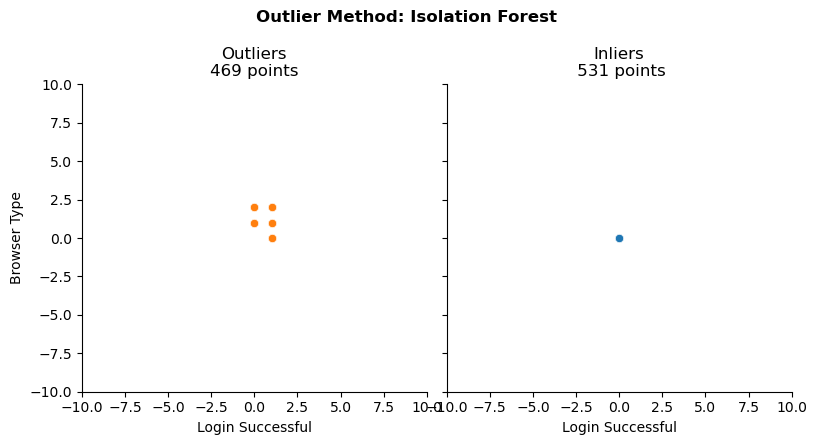

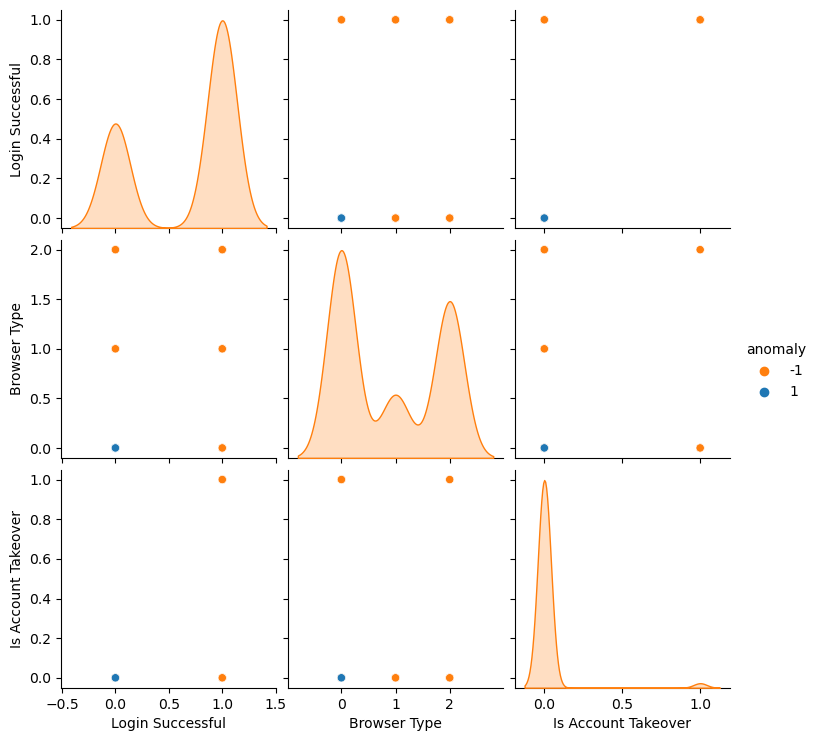

In [39]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  990
Total Number of Values: 1000


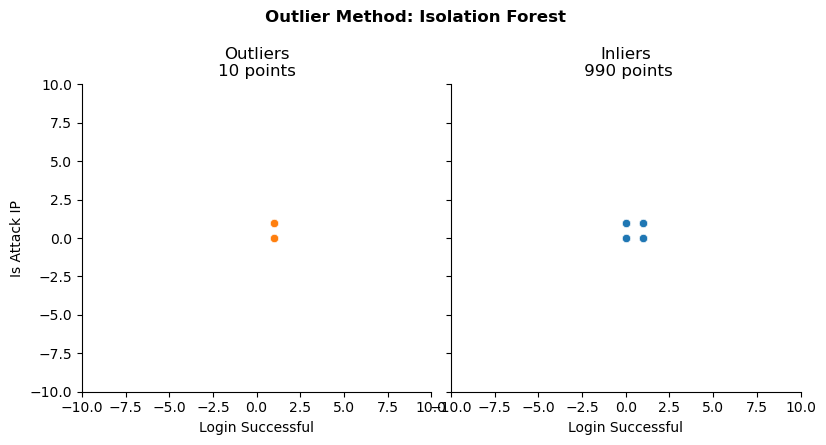

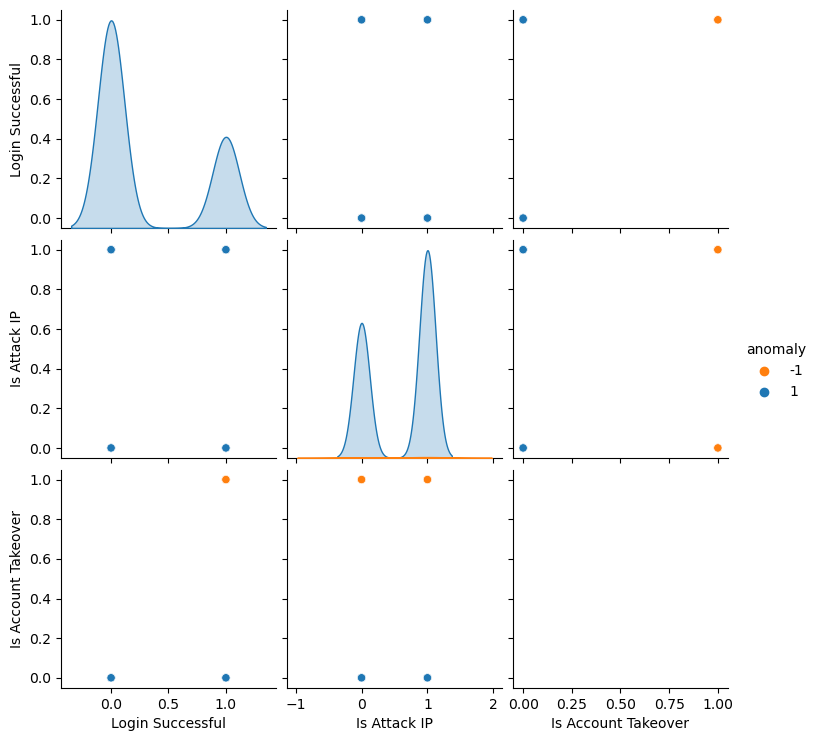

In [40]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 145
Number of non anomalous values  855
Total Number of Values: 1000


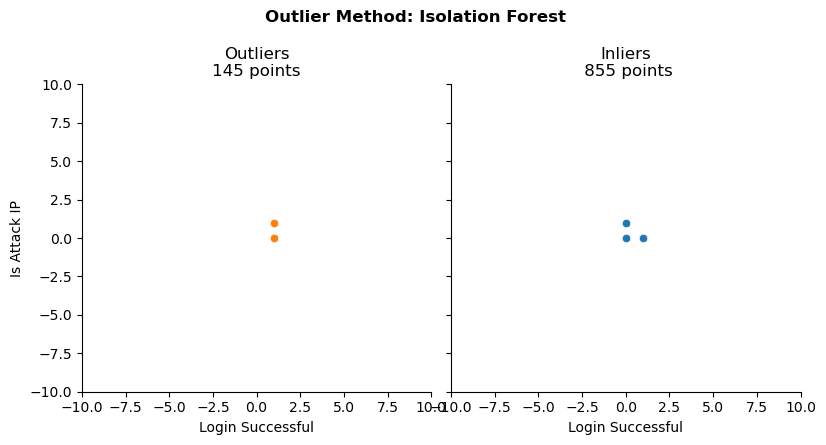

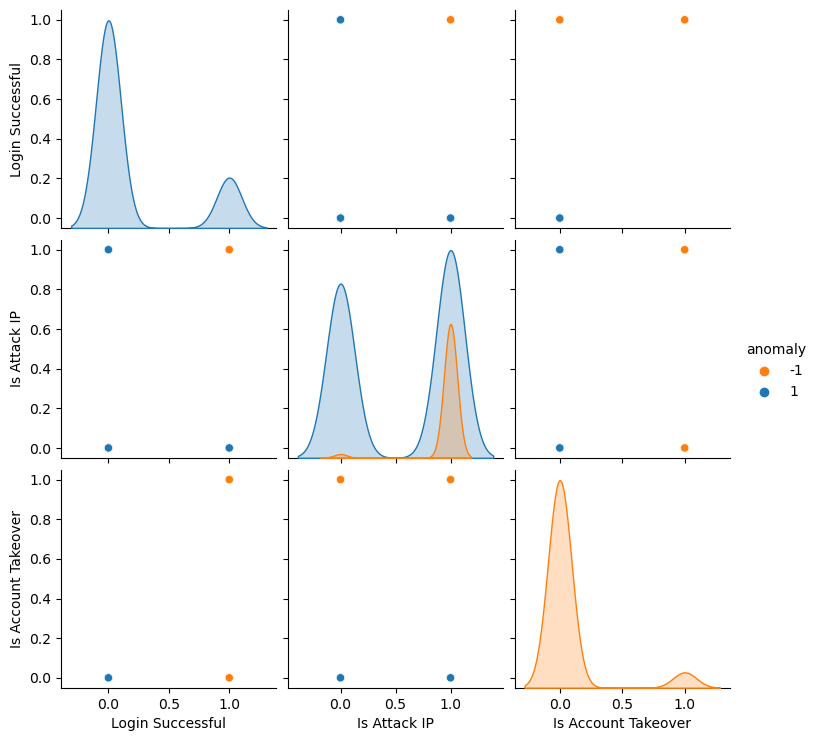

In [41]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 312
Number of non anomalous values  688
Total Number of Values: 1000


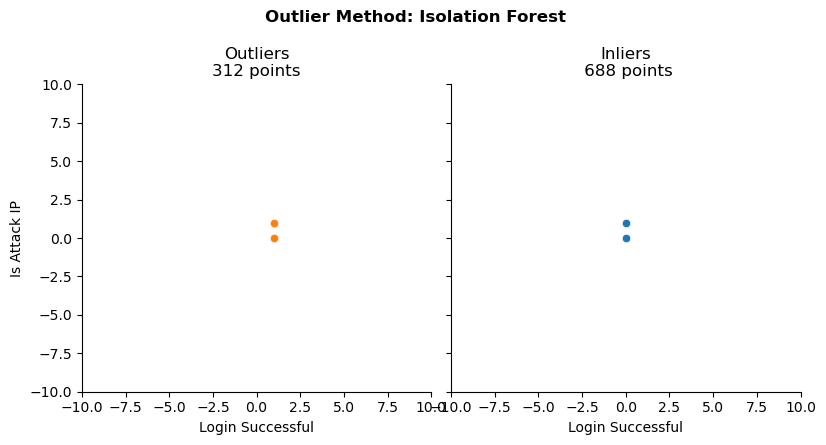

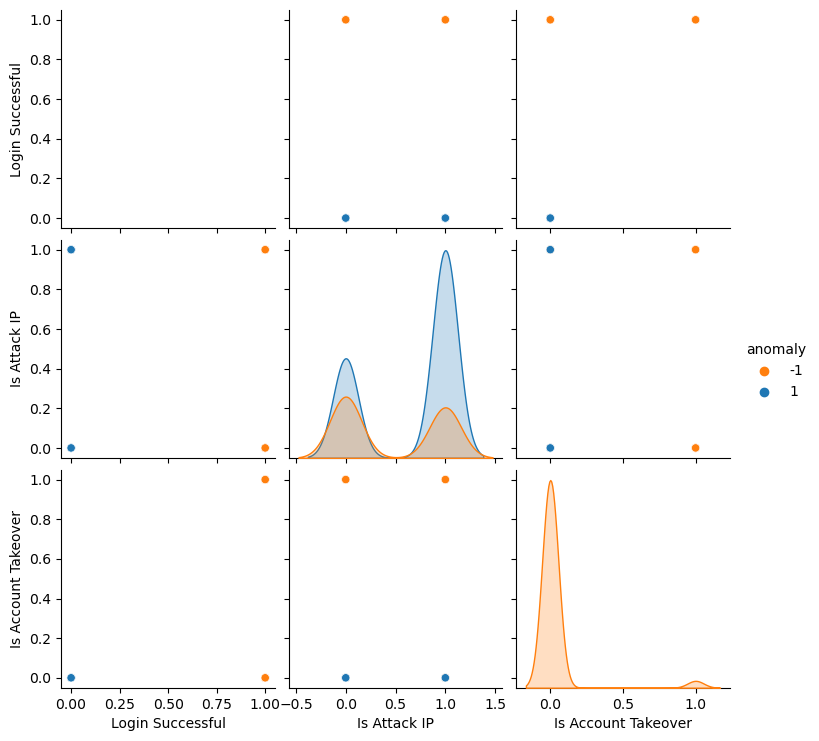

In [42]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

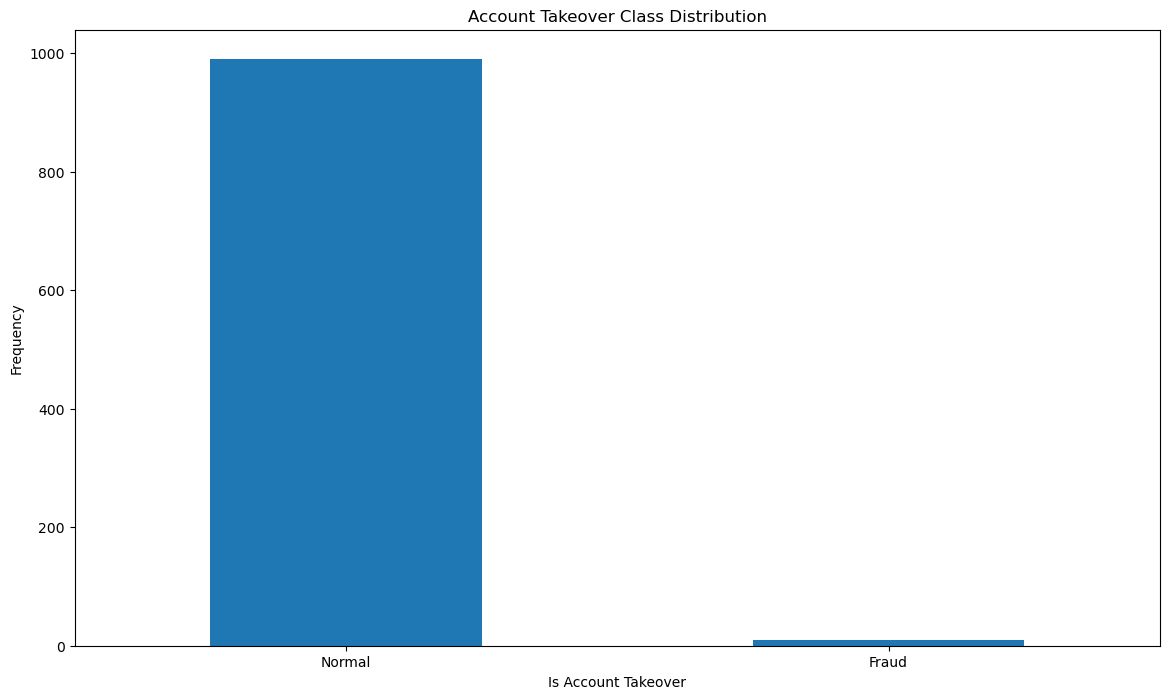

In [43]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [44]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(10, 11) (990, 11)


In [45]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(1000, 10)
(1000,)
Isolation Forest: 21
Accuracy Score :
0.979
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       990
        True       0.00      0.00      0.00        10

    accuracy                           0.98      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.98      0.98      0.98      1000

Local Outlier Factor: 19
Accuracy Score :
0.981
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       990
        True       0.09      0.10      0.10        10

    accuracy                           0.98      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.98      0.98      0.98      1000

Support Vector Machine: 743
Accuracy Score :
0.257
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.25      0.40       990
   

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [46]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1727 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(1721)
memory usage: 1.7 MB


ASN  Is Account Takeover  Is Attack IP  Login Successful  \
0  208653.0                False          True             False   
1    3280.0                 True          True              True   
2  393398.0                False          True             False   
3  393398.0                False         False             False   
4  197535.0                False          True             False   

        User ID  Blacklisted  cntr_AM  cntr_AR  cntr_AU  cntr_BA  ...  \
0 -4.324476e+18        False        0        0        0        0  ...   
1 -5.783801e+18        False        0        0        0        0  ...   
2 -4.324476e+18         True        0        0        0        0  ...   
3 -4.324476e+18         True        0        0        0        0  ...   
4 -4.324476e+18         True        0        0        0        0  ...   

   lgnt_2021-02-28 23:56:23.148  lgnt_2021-02-28 23:56:44.382  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:57:00.409  lgnt_2021-02-28 23:57:20.002  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:58:04.017  lgnt_2021-02-28 23:58:44.011  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:59:22.608  brw_C  brw_F  brw_O  
0                             0      1      0      0  
1                             0      1      0      0  
2                             0      1      0      0  
3                             0      0      0      1  
4                             0      1      0      0  

[5 rows x 1727 columns]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 100.00%
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       429
        True       1.00      1.00      1.00         1

    accuracy                           1.00       430
   macro avg

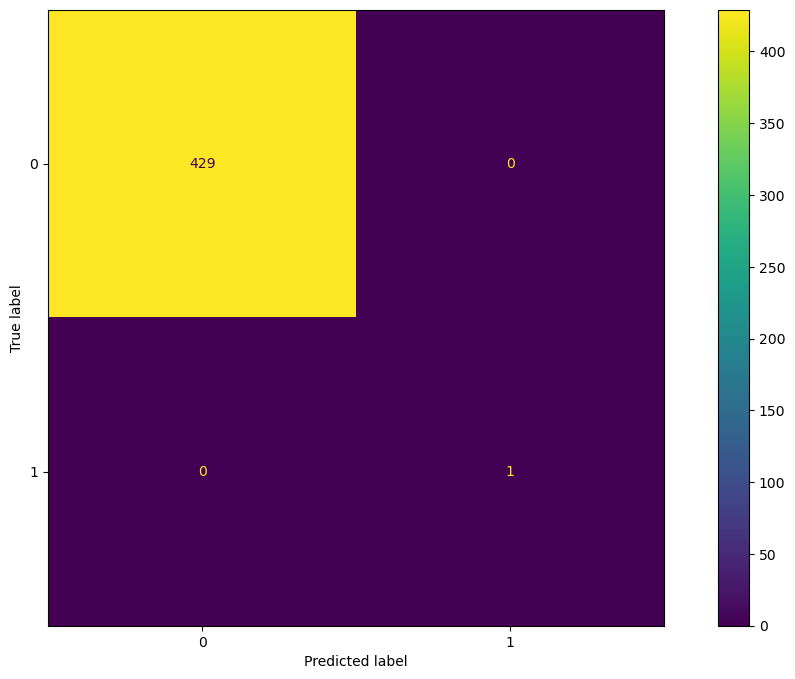

In [50]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# split data into train and test sets
seed = 7
test_size = 0.43
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 794 records for the majority class and 6 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.08      0.15       196
        True       0.02      1.00      0.04         4

    accuracy                           0.10       200
   macro avg       0.51      0.54      0.10       200
weighted avg       0.98      0.10      0.15       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       196
        True       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200

[[ 16 180]
 [  0   4]]


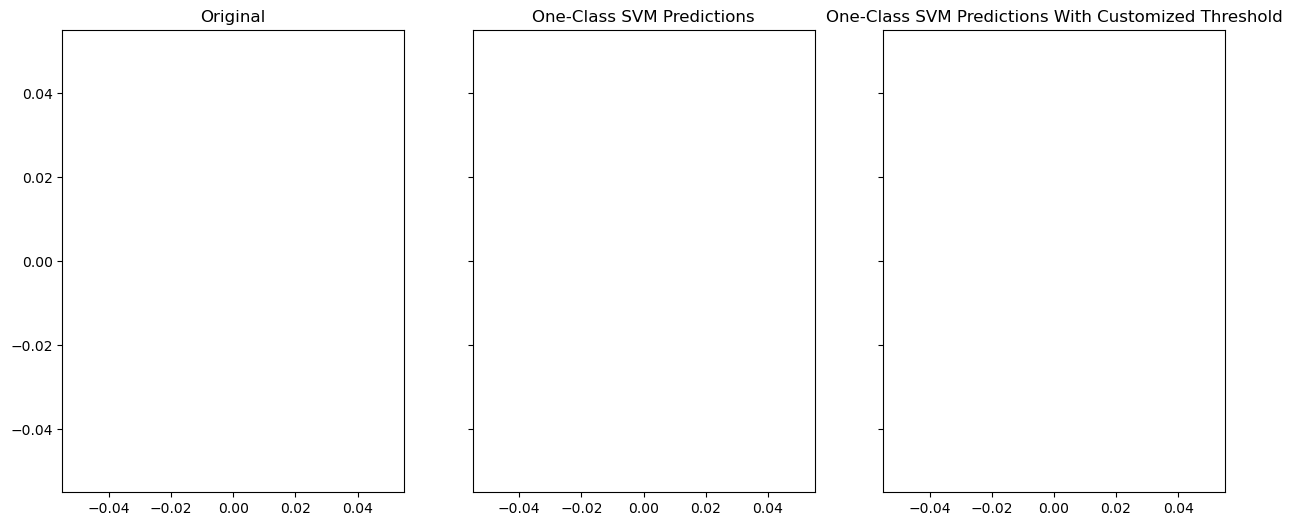

In [51]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 695 records for the majority class and 5 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.23      0.37       295
        True       0.02      1.00      0.04         5

    accuracy                           0.24       300
   macro avg       0.51      0.62      0.21       300
weighted avg       0.98      0.24      0.37       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       295
        True       0.00      0.00      0.00         5

    accuracy                           0.98       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.98      0.98       300

[[ 68 227]
 [  0   5]]


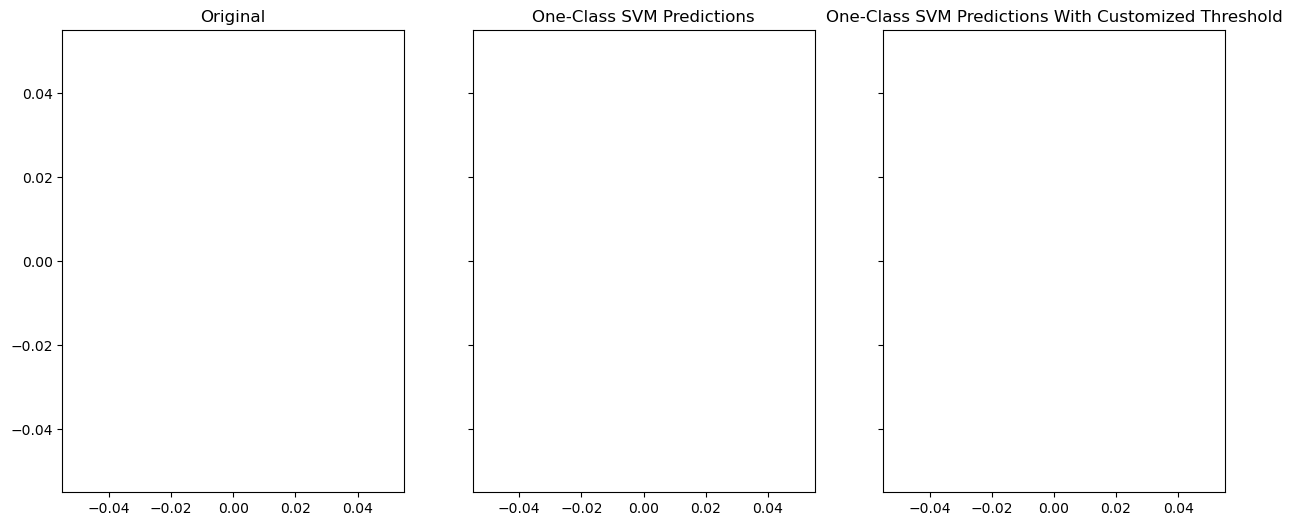

In [52]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 498 records for the majority class and 2 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.05      0.09       492
        True       0.02      1.00      0.03         8

    accuracy                           0.06       500
   macro avg       0.51      0.52      0.06       500
weighted avg       0.98      0.06      0.09       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       492
        True       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500

[[ 23 469]
 [  0   8]]


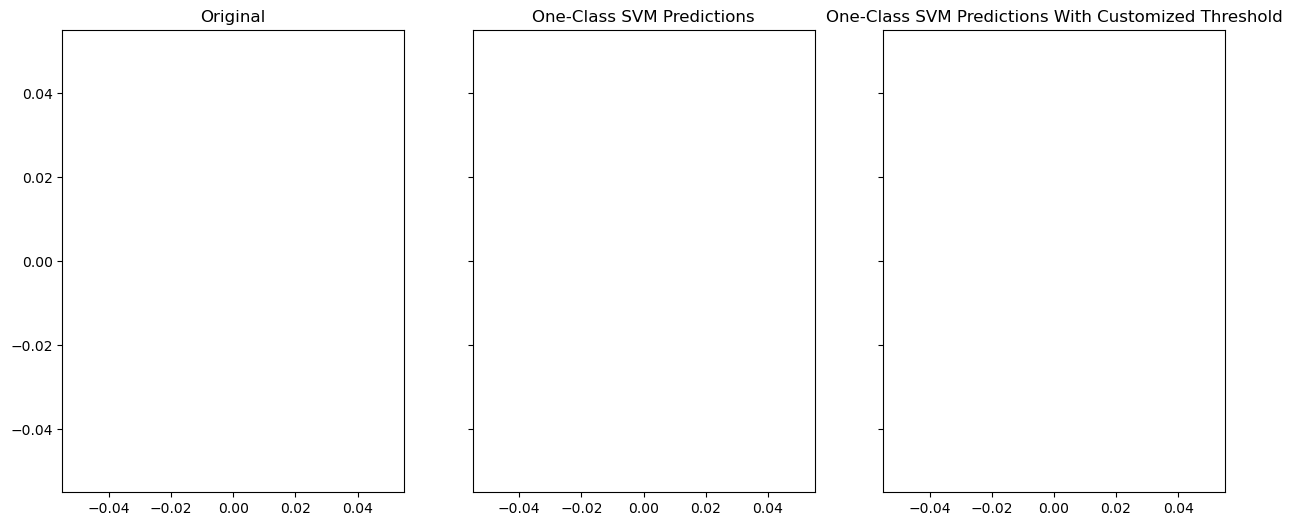

In [53]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [54]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0            True        False        0.023674        1                False
1            True        False       -0.217652       -1                 True
2            True         True        0.074817        1                False
3           False         True        0.000000        1                False
4            True         True        0.074817        1                False
..            ...          ...             ...      ...                  ...
995          True         True        0.074817        1                False
996         False         True        0.000000        1                False
997          True        False        0.023674        1                False
998          True         True        0.074817        1                False
999         False        False        0.048050        1                False

[1000 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  990
Total Number of Values: 1000


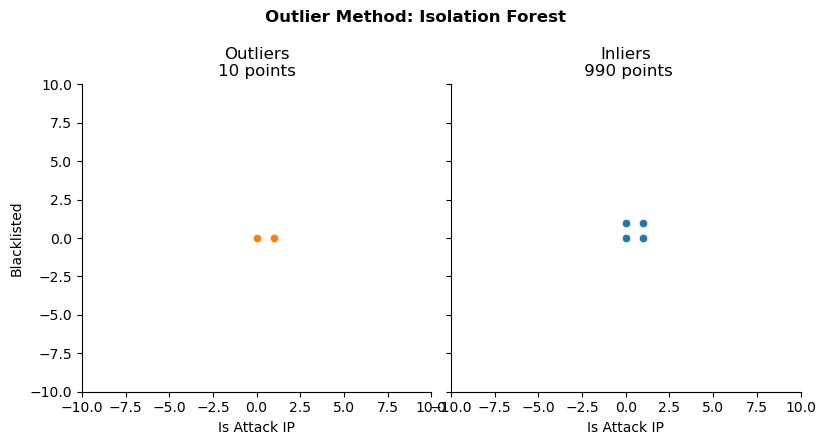

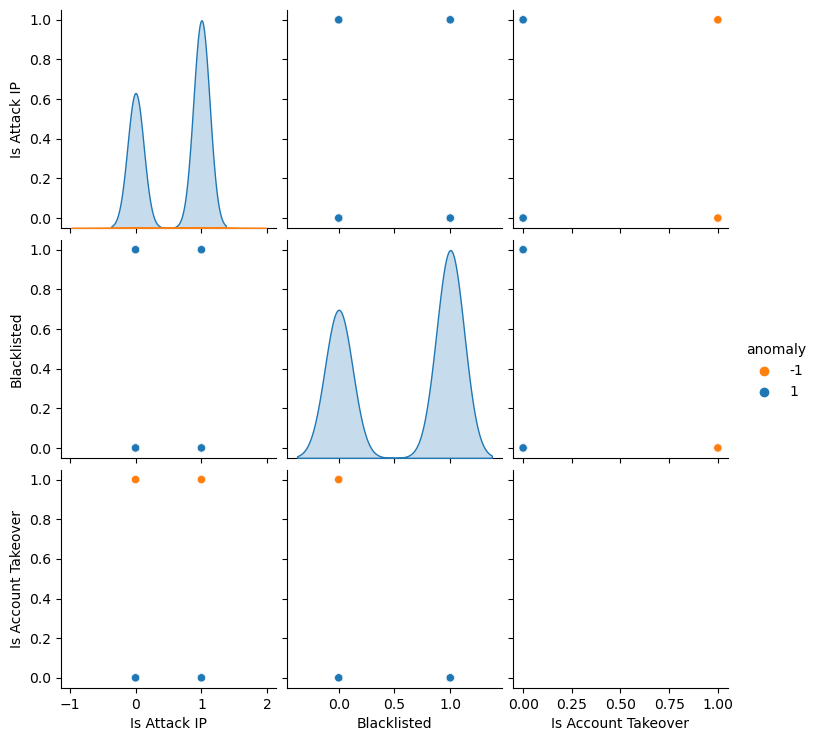

In [55]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 155
Number of non anomalous values  845
Total Number of Values: 1000


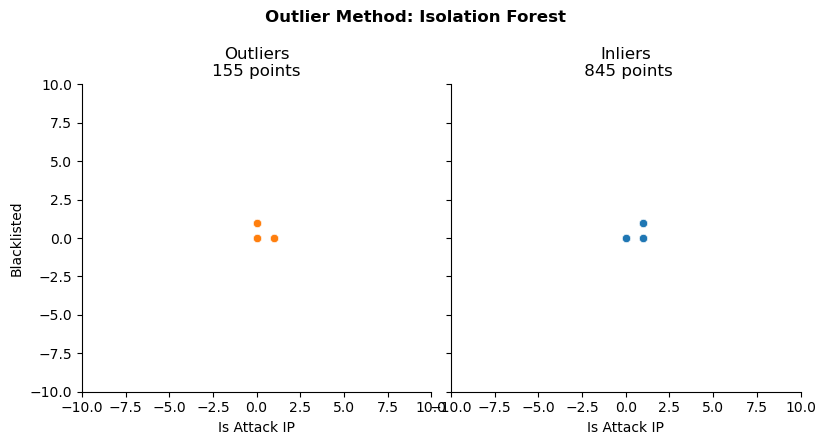

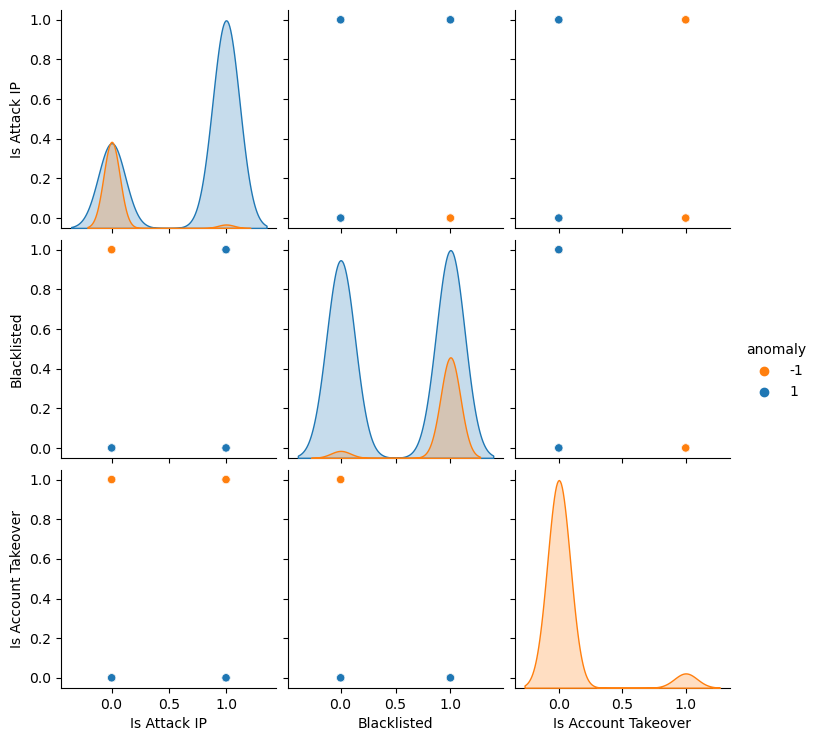

In [56]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 322
Number of non anomalous values  678
Total Number of Values: 1000


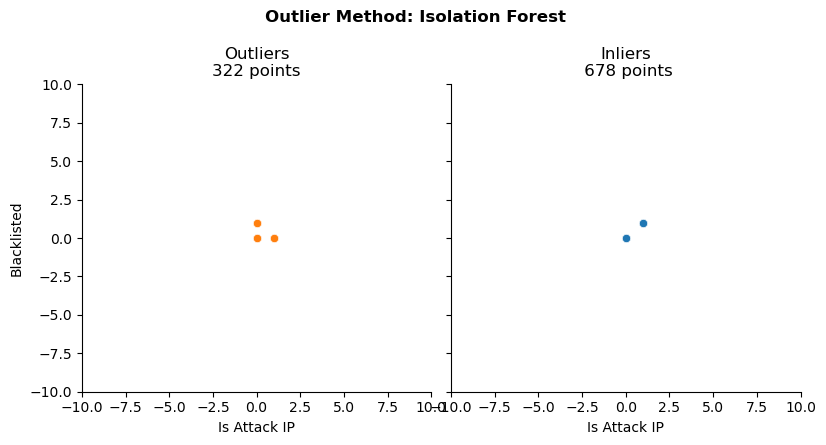

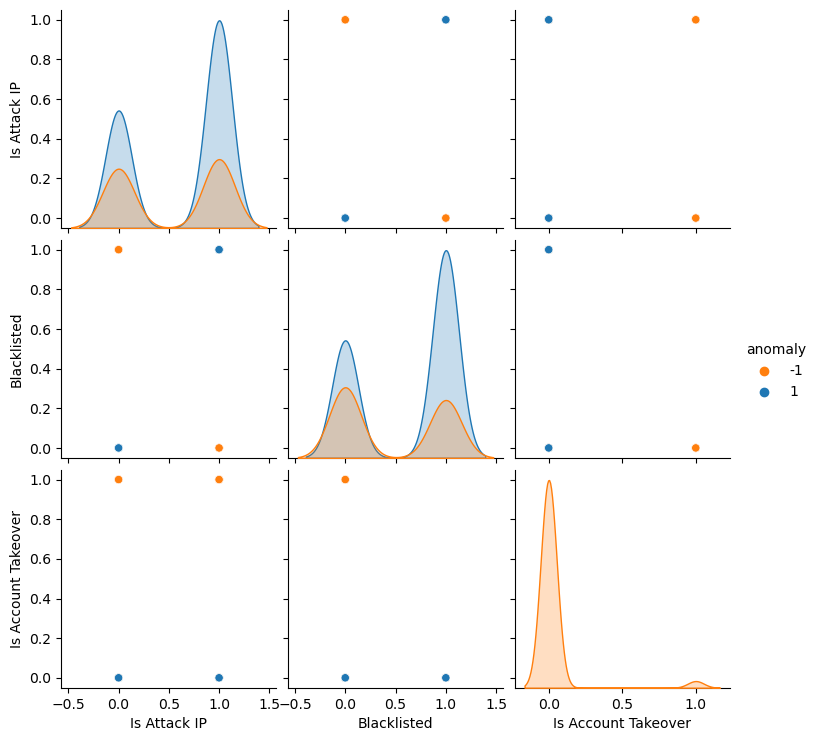

In [57]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [58]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Login Successful  brw_O  anomaly_scores  anomaly  Is Account Takeover
0               False      0        0.118193        1                False
1                True      0       -0.199040       -1                 True
2               False      0        0.118193        1                False
3               False      1        0.000000        1                False
4               False      0        0.118193        1                False
..                ...    ...             ...      ...                  ...
995              True      0        0.079025        1                False
996             False      1        0.000000        1                False
997              True      0        0.079025        1                False
998             False      1        0.000000        1                False
999             False      0        0.118193        1                False

[1000 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 66
Number of non anomalous values  934
Total Number of Values: 1000


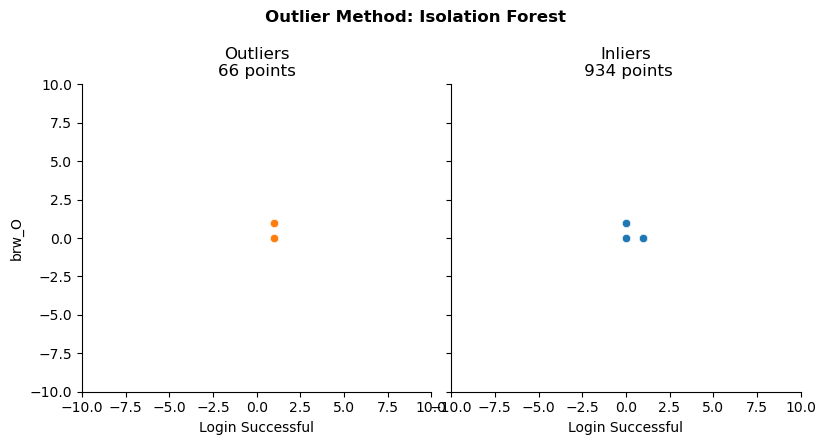

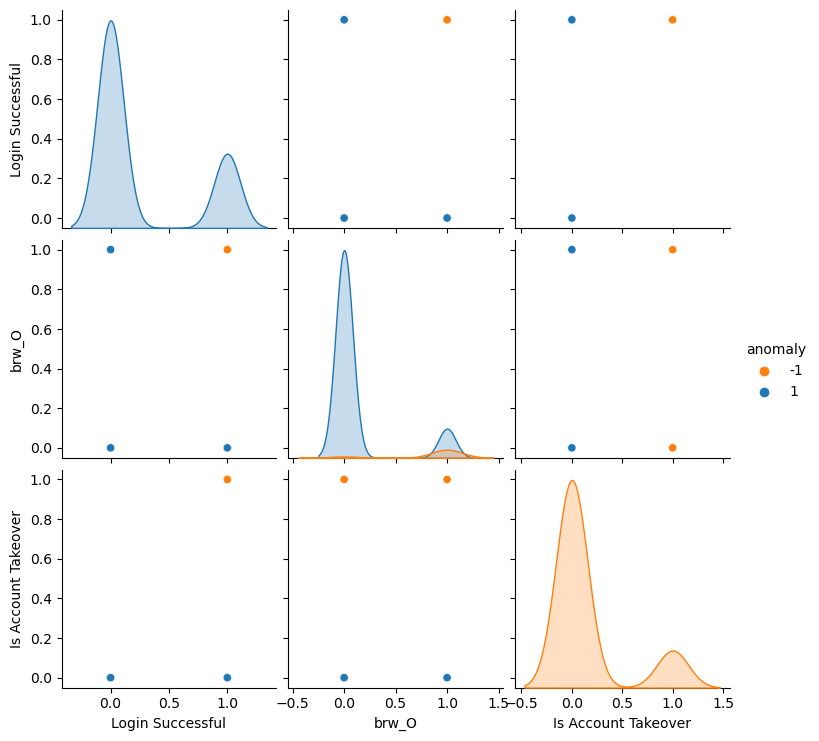

In [59]:
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 181
Number of non anomalous values  819
Total Number of Values: 1000


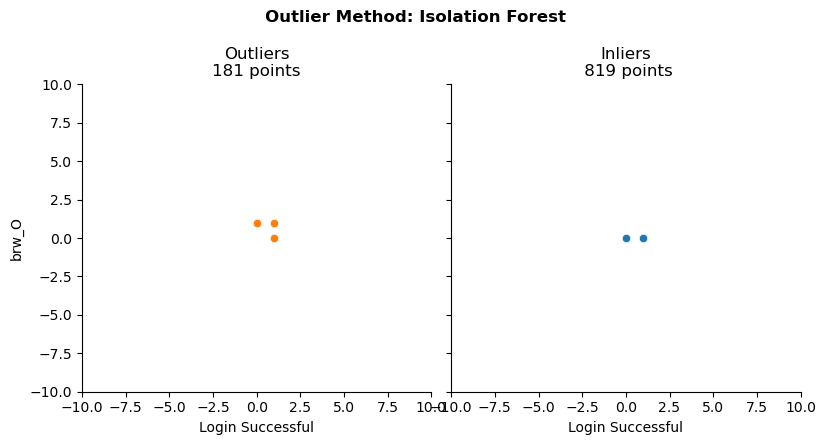

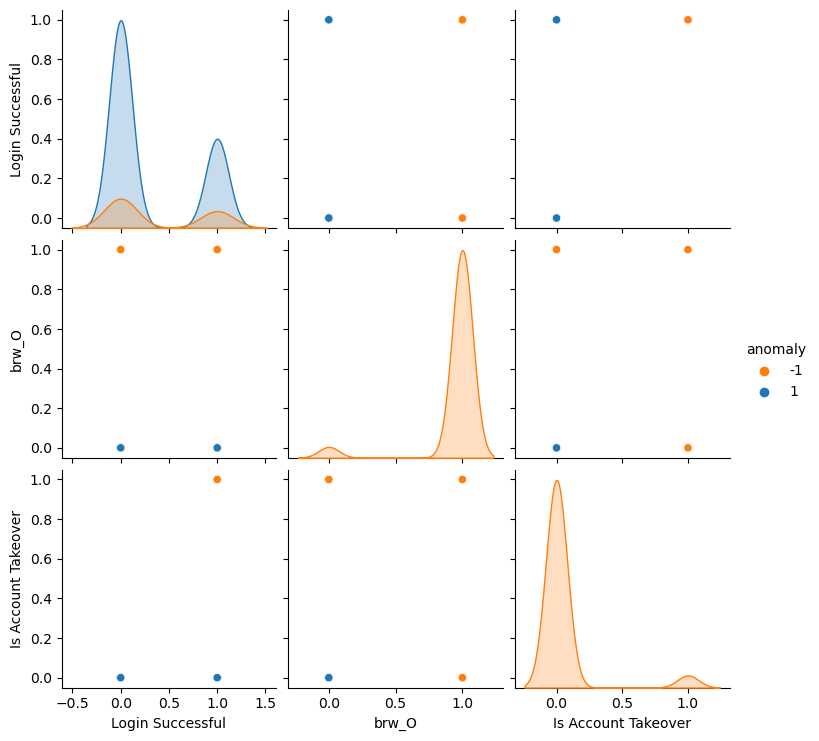

In [60]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 427
Number of non anomalous values  573
Total Number of Values: 1000


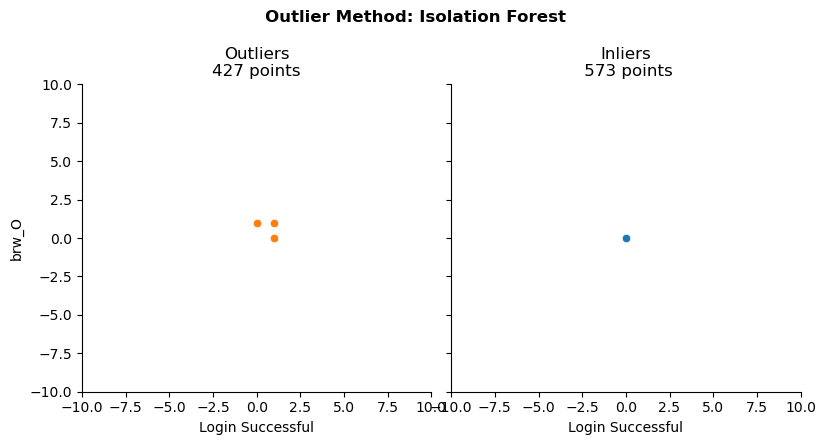

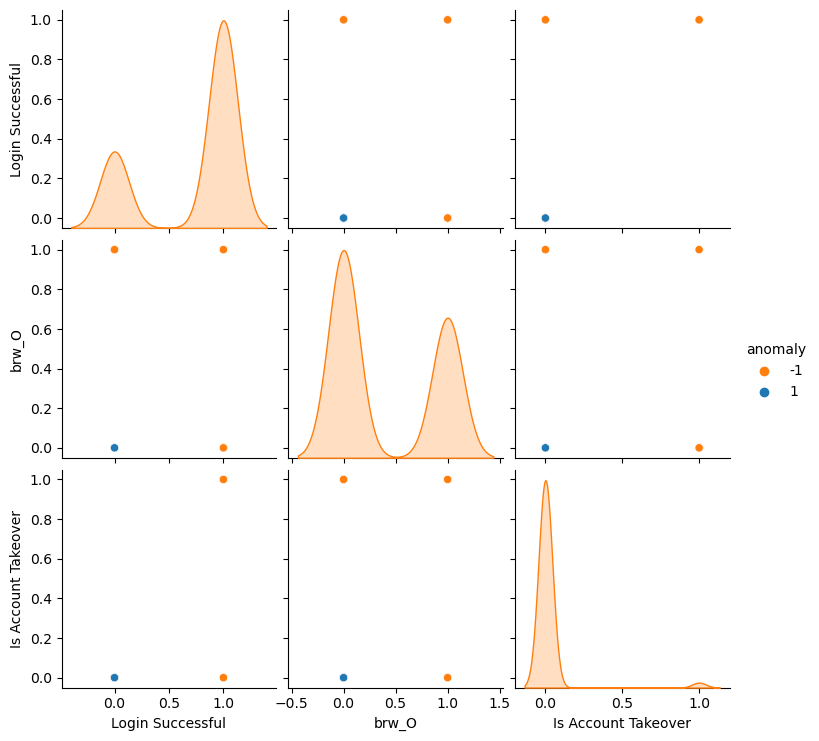

In [61]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  990
Total Number of Values: 1000


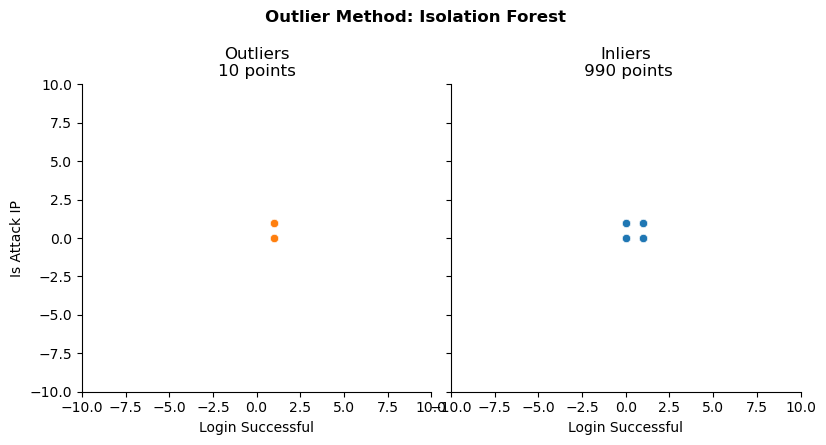

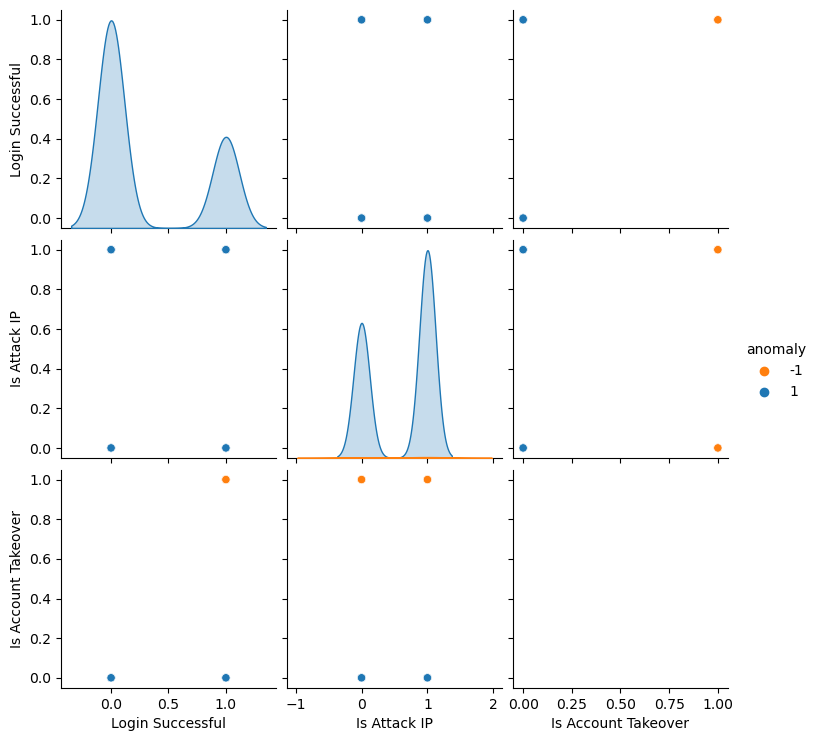

In [62]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 145
Number of non anomalous values  855
Total Number of Values: 1000


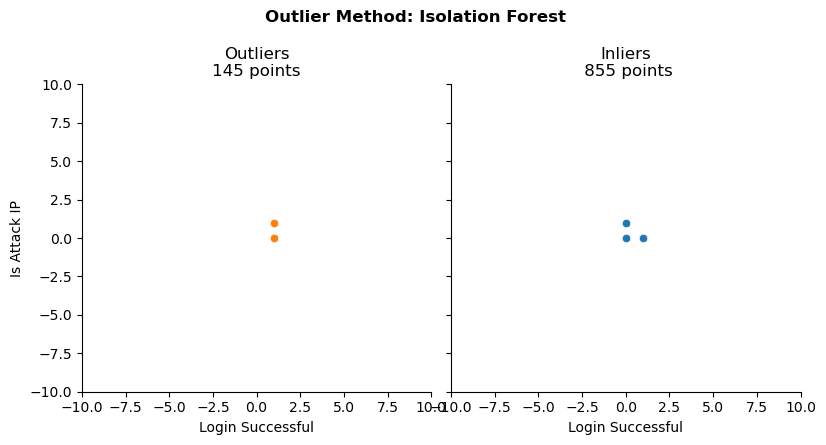

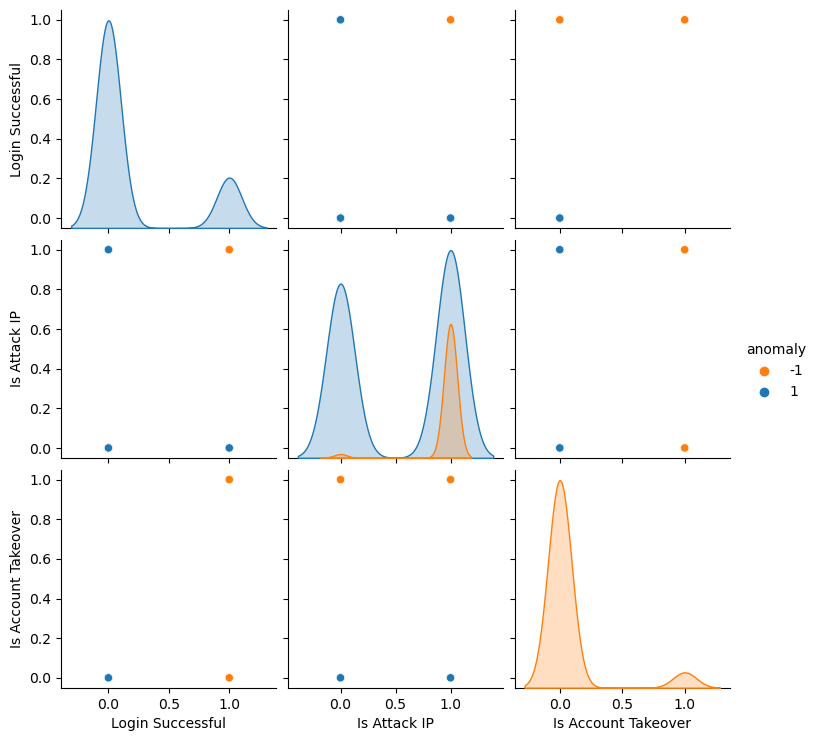

In [63]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 312
Number of non anomalous values  688
Total Number of Values: 1000


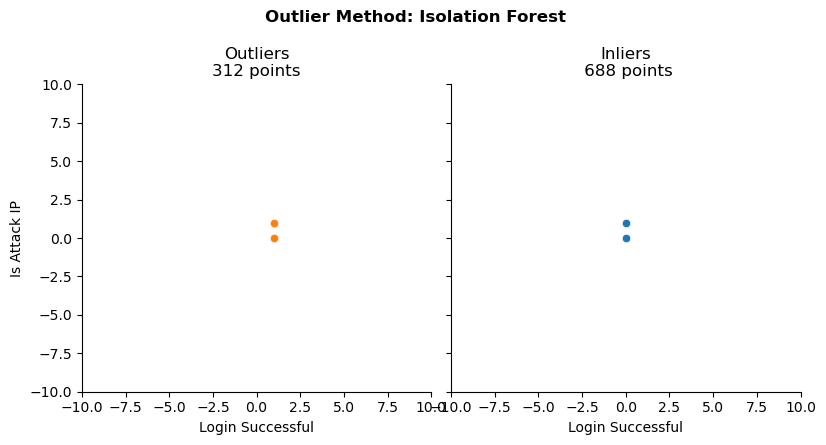

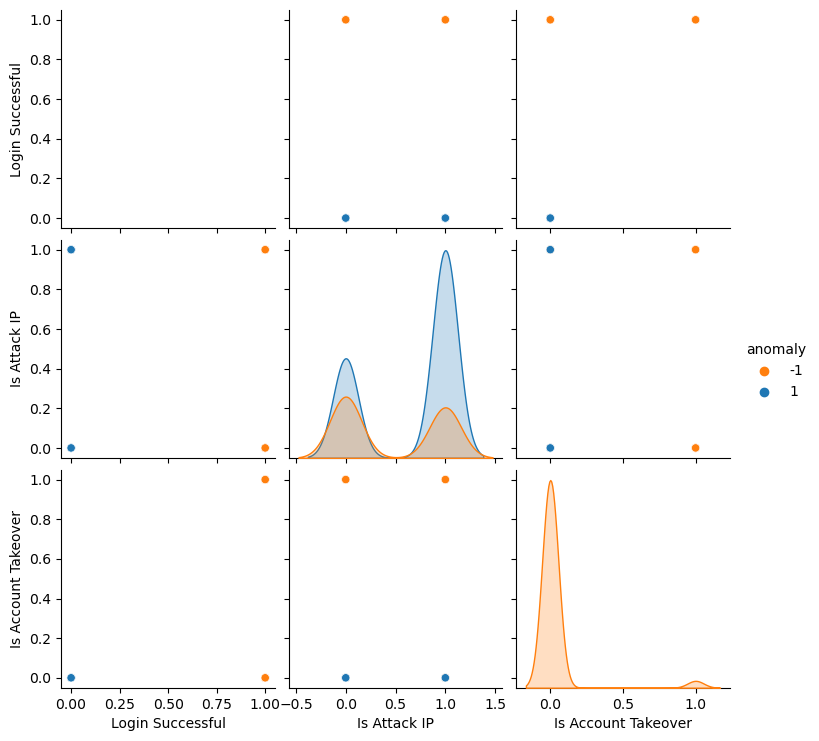

In [64]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

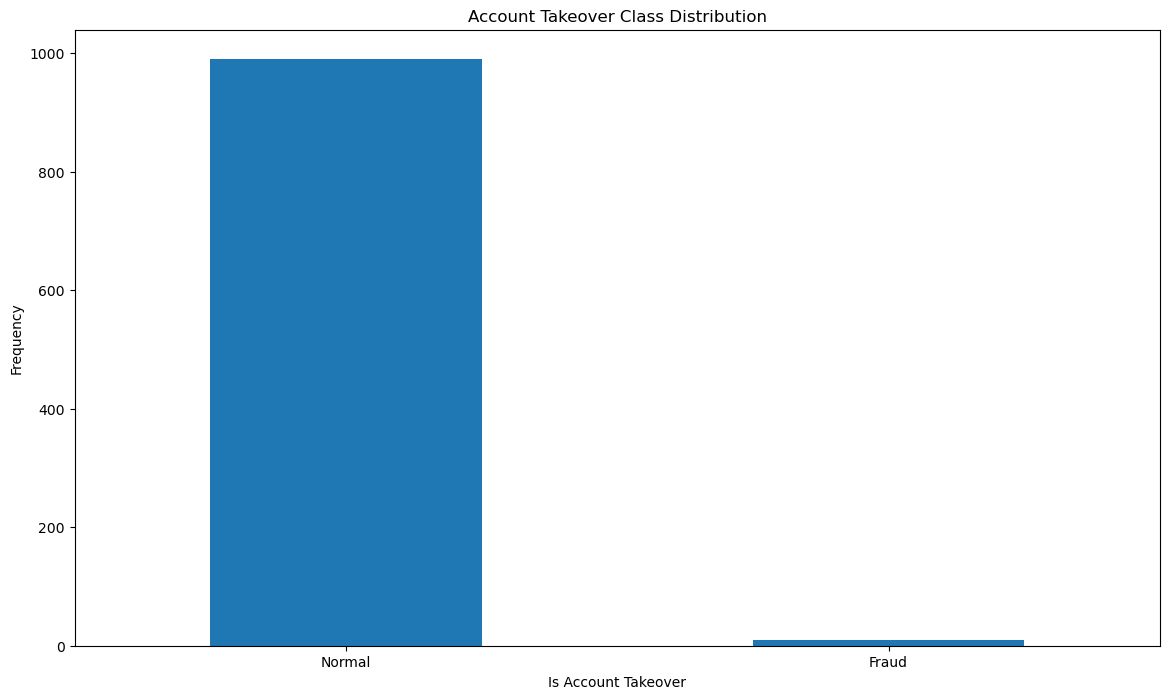

In [65]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [66]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(10, 1727) (990, 1727)


In [67]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(1000, 1726)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 21
Accuracy Score :
0.979
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       990
        True       0.00      0.00      0.00        10

    accuracy                           0.98      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.98      0.98      0.98      1000

Local Outlier Factor: 19
Accuracy Score :
0.981
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       990
        True       0.09      0.10      0.10        10

    accuracy                           0.98      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.98      0.98      0.98      1000

Support Vector Machine: 741
Accuracy Score :
0.259
Classification Report :
              precision    recall  f1-score   support

       False       0.99      0.25      0.40       990
        True       0.0

## 30 takeover out of 1000 rows

In [68]:
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(600), safe.head(370), s.head(30)], ignore_index=True, sort=False)

# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)
df.drop("OS Name and Version", inplace=True, axis=1)
df.drop("Browser Name and Version", inplace=True, axis=1)

df1 = df.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  1000 non-null   float64 
 1   Country              1000 non-null   category
 2   Device Type          1000 non-null   category
 3   IP Address           1000 non-null   category
 4   Is Account Takeover  1000 non-null   bool    
 5   Is Attack IP         1000 non-null   bool    
 6   Login Successful     1000 non-null   bool    
 7   Login Timestamp      1000 non-null   category
 8   User ID              1000 non-null   float64 
 9   Blacklisted          1000 non-null   bool    
 10  Browser Type         1000 non-null   category
dtypes: bool(4), category(5), float64(2)
memory usage: 90.7 KB


# Experimental xgboost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  1000 non-null   float64 
 1   Country              1000 non-null   category
 2   Device Type          1000 non-null   category
 3   IP Address           1000 non-null   category
 4   Is Attack IP         1000 non-null   bool    
 5   Login Successful     1000 non-null   bool    
 6   Login Timestamp      1000 non-null   category
 7   User ID              1000 non-null   float64 
 8   Blacklisted          1000 non-null   bool    
 9   Browser Type         1000 non-null   category
 10  Is Account Takeover  1000 non-null   bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 90.7 KB
Feature importances:
[0.02946164 0.39781916 0.02500814 0.06304331 0.         0.19330929
 0.11321067 0.05228835 0.01595914 0.10990029]


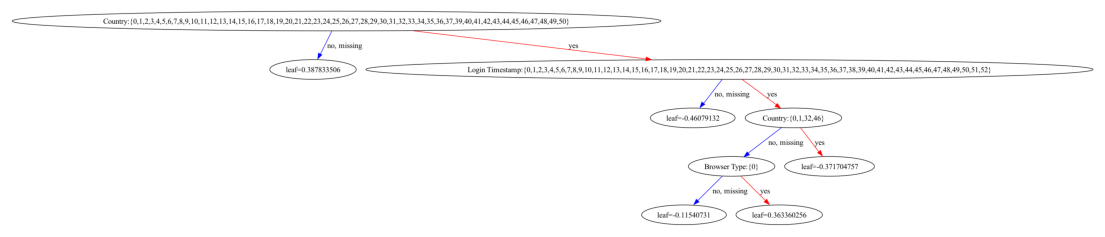

In [69]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

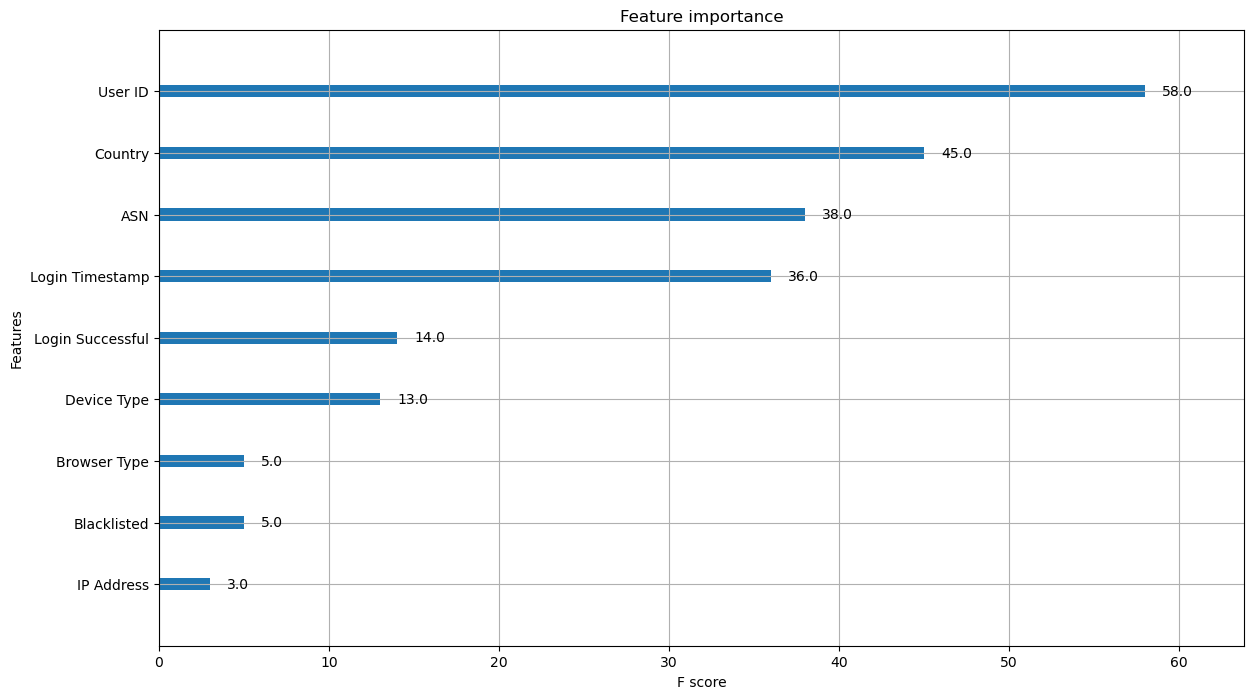

In [70]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [71]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  1000 non-null   float64
 1   Country              1000 non-null   int8   
 2   Device Type          1000 non-null   int8   
 3   IP Address           1000 non-null   int16  
 4   Is Account Takeover  1000 non-null   bool   
 5   Is Attack IP         1000 non-null   bool   
 6   Login Successful     1000 non-null   bool   
 7   Login Timestamp      1000 non-null   int16  
 8   User ID              1000 non-null   float64
 9   Blacklisted          1000 non-null   bool   
 10  Browser Type         1000 non-null   int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 26.5 KB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 97.88%
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       316
        True       0.89      0.57      0.70        14

    accuracy                           0.98       330
   macro avg 

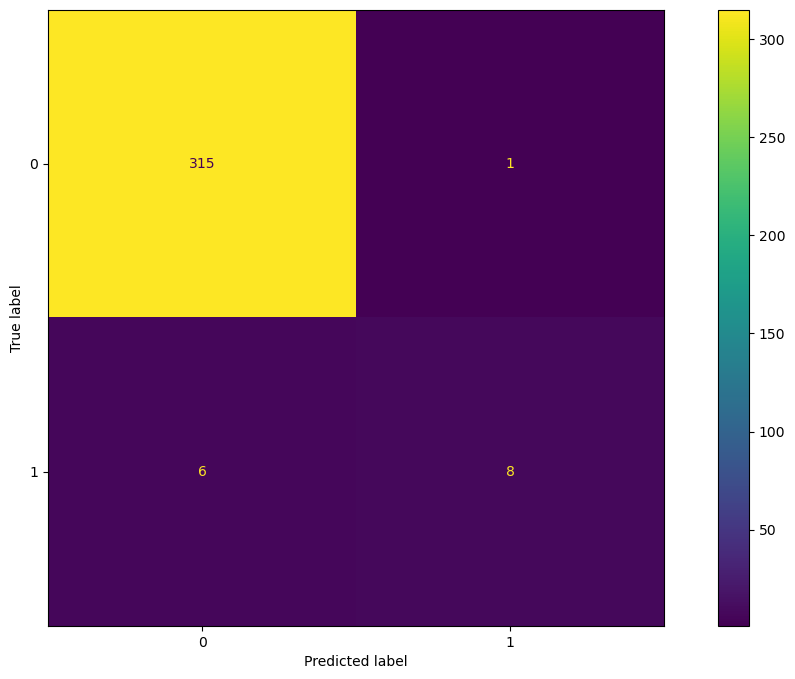

In [74]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 776 records for the majority class and 24 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       194
        True       0.03      1.00      0.06         6

    accuracy                           0.03       200
   macro avg       0.01      0.50      0.03       200
weighted avg       0.00      0.03      0.00       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       194
        True       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

[[  0 194]
 [  0   6]]


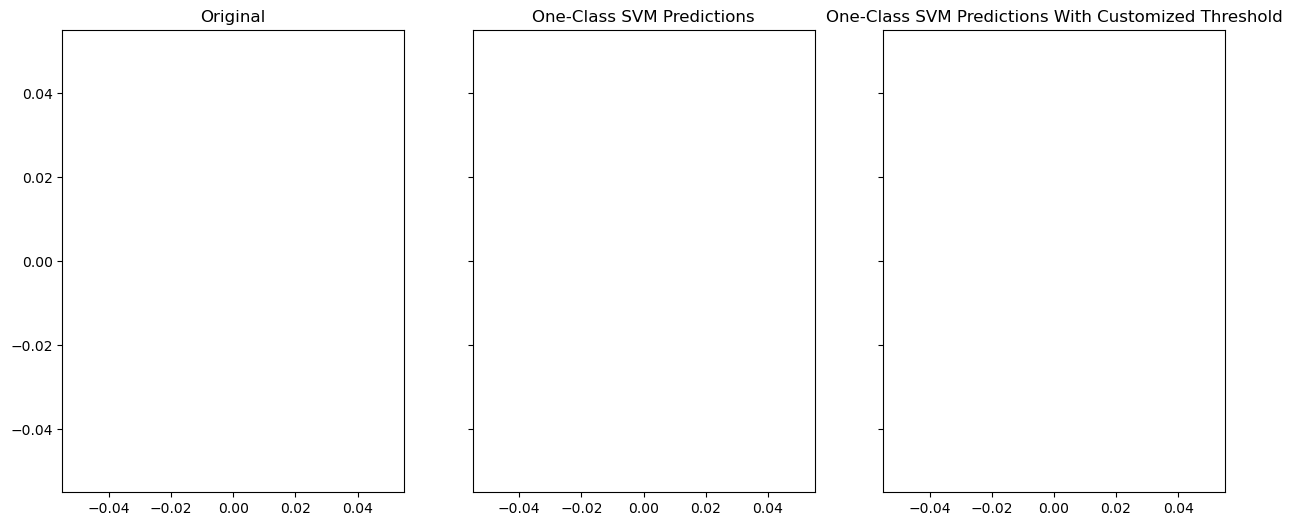

In [75]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 679 records for the majority class and 21 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       291
        True       0.03      1.00      0.06         9

    accuracy                           0.03       300
   macro avg       0.01      0.50      0.03       300
weighted avg       0.00      0.03      0.00       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       291
        True       0.00      0.00      0.00         9

    accuracy                           0.97       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.94      0.97      0.96       300

[[  0 291]
 [  0   9]]


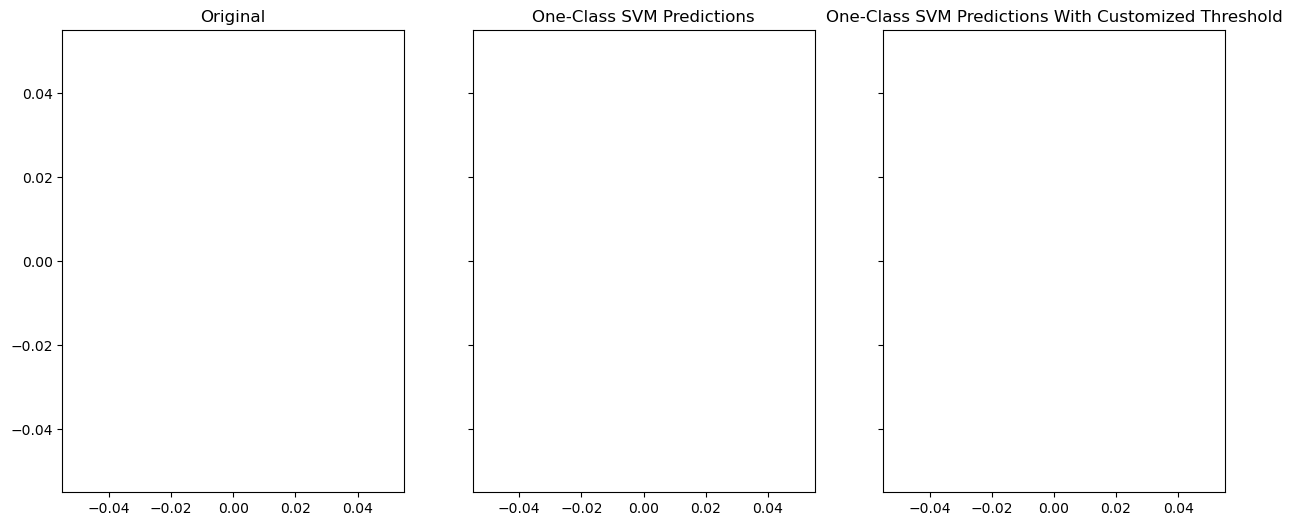

In [76]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 484 records for the majority class and 16 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       486
        True       0.03      1.00      0.05        14

    accuracy                           0.03       500
   macro avg       0.01      0.50      0.03       500
weighted avg       0.00      0.03      0.00       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       486
        True       0.00      0.00      0.00        14

    accuracy                           0.97       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.94      0.97      0.96       500

[[  0 486]
 [  0  14]]


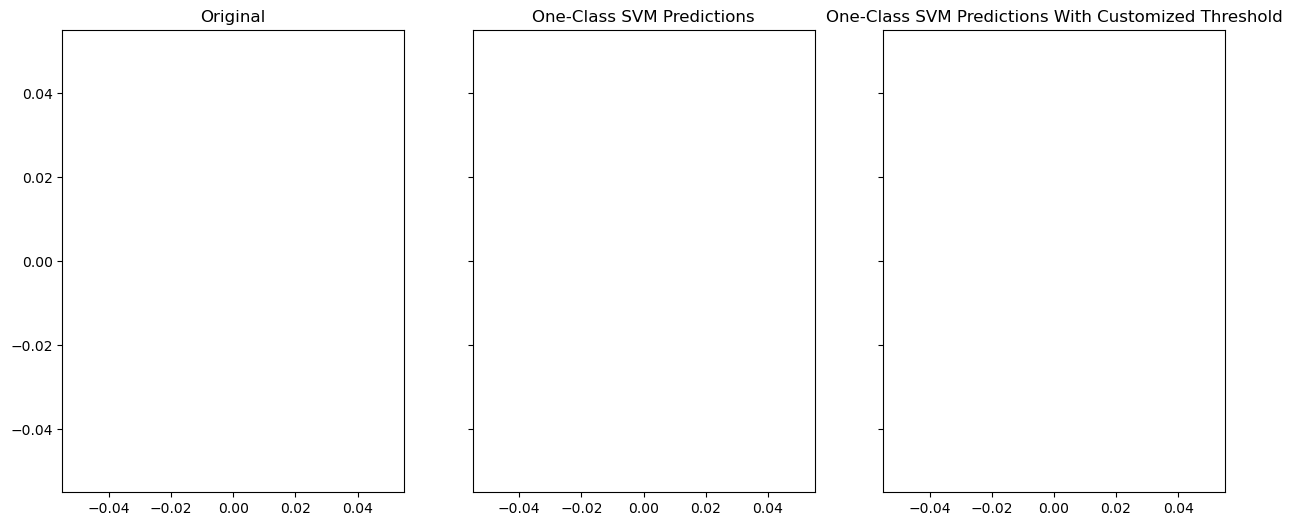

In [77]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  970
Total Number of Values: 1000


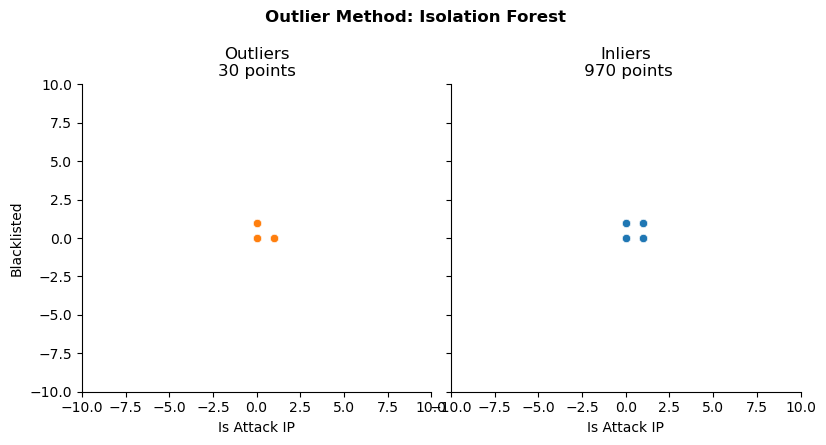

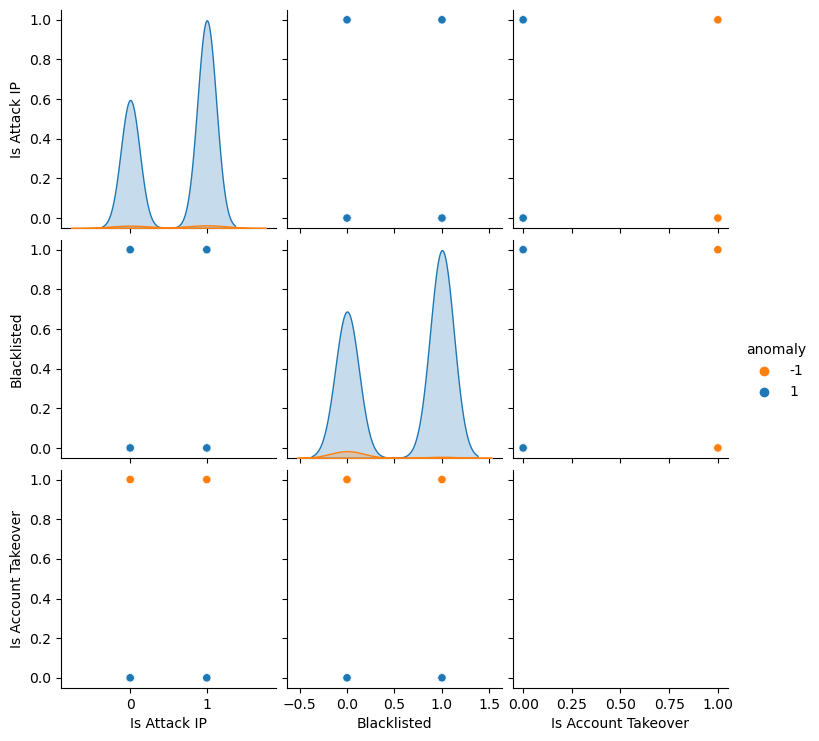

In [78]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 166
Number of non anomalous values  834
Total Number of Values: 1000


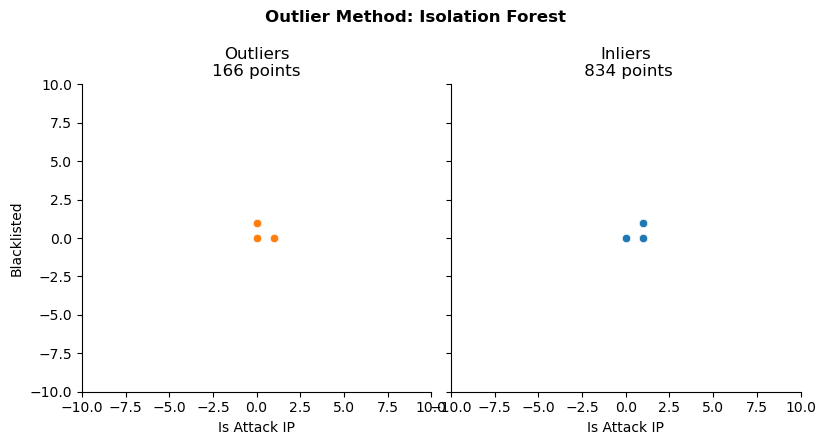

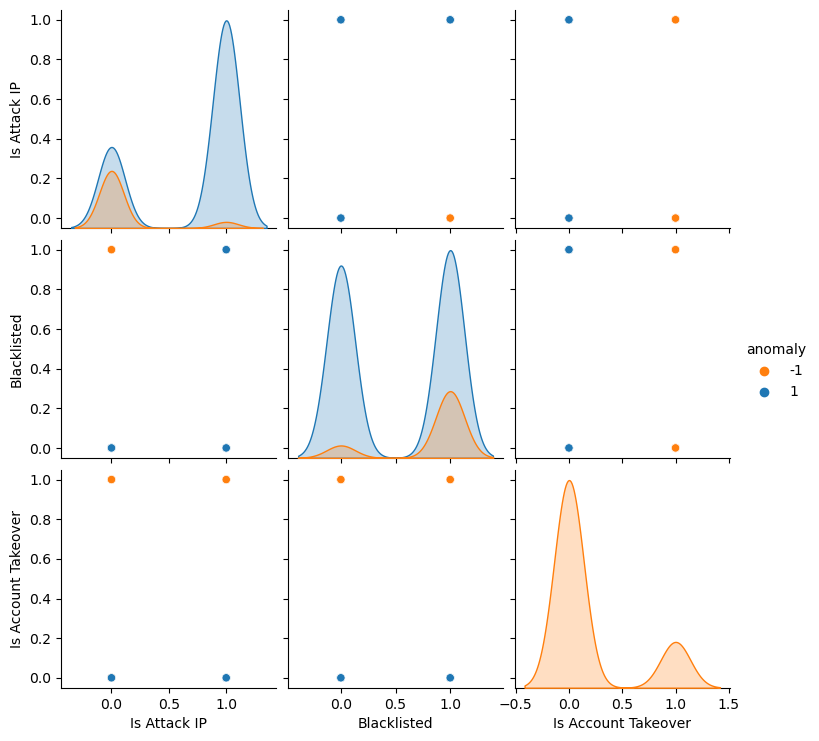

In [79]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 333
Number of non anomalous values  667
Total Number of Values: 1000


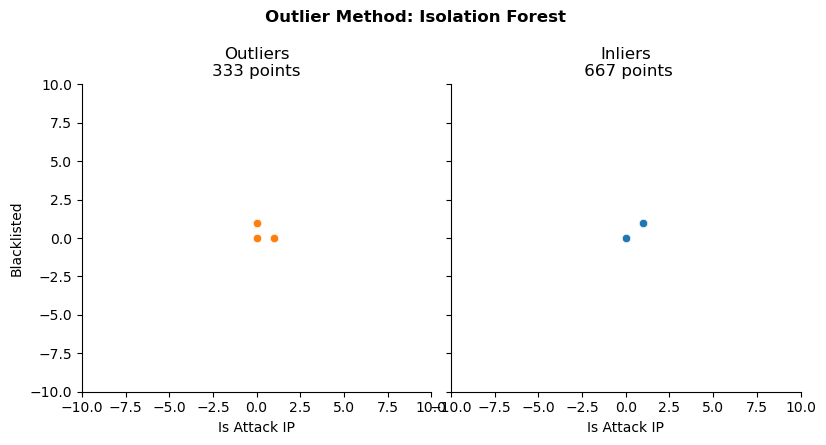

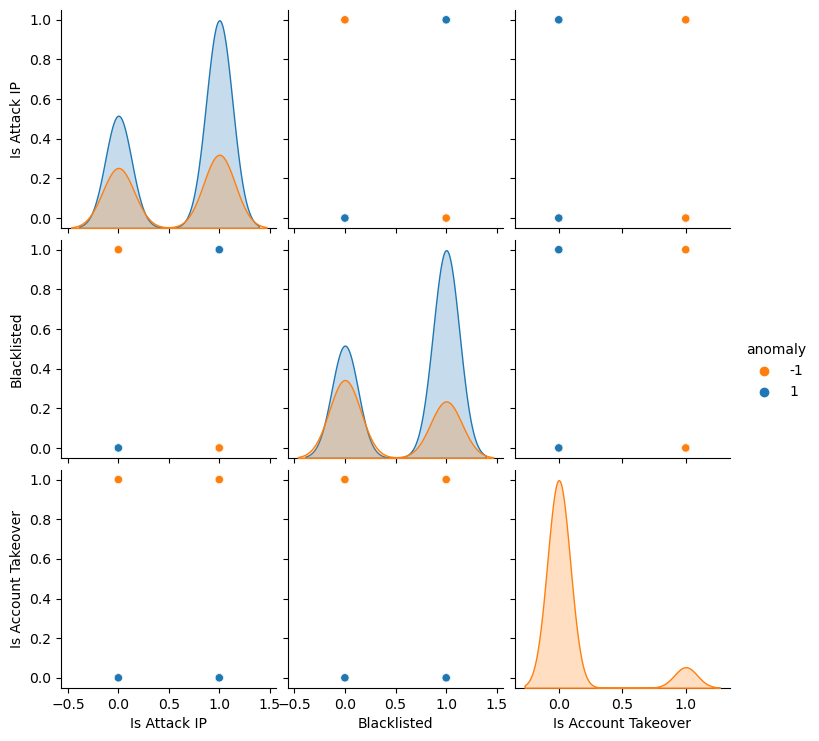

In [80]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 97
Number of non anomalous values  903
Total Number of Values: 1000


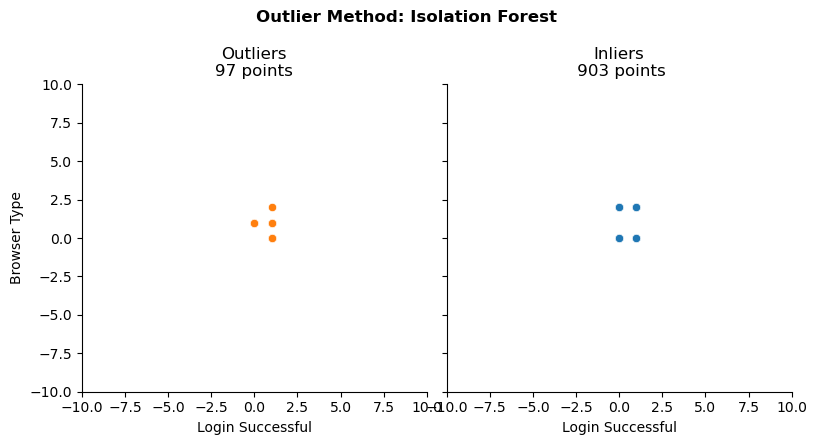

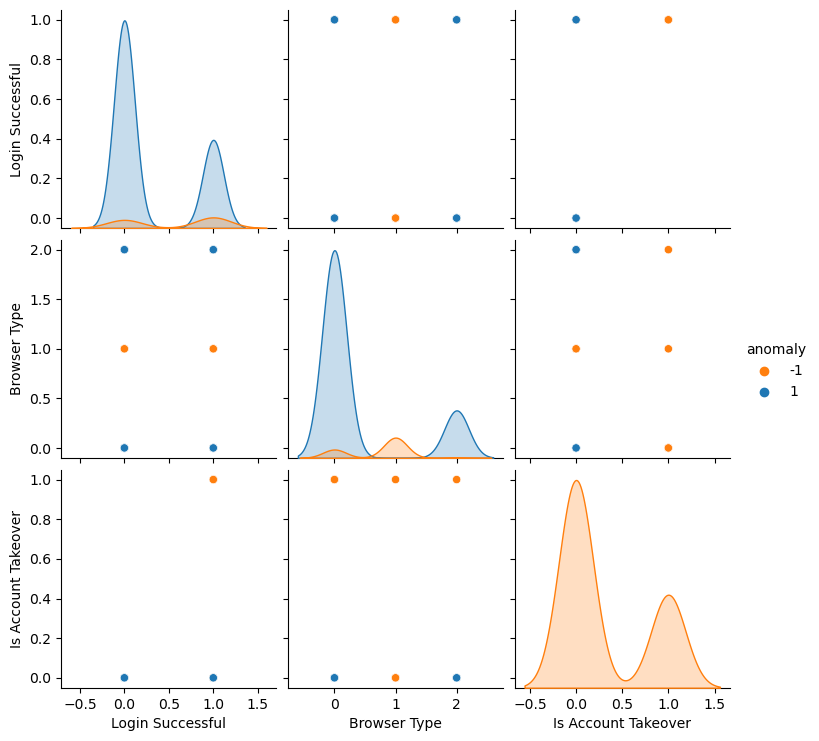

In [81]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 265
Number of non anomalous values  735
Total Number of Values: 1000


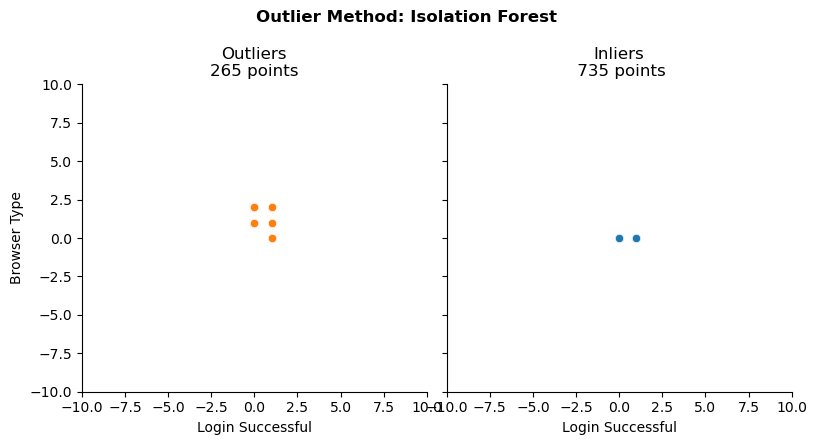

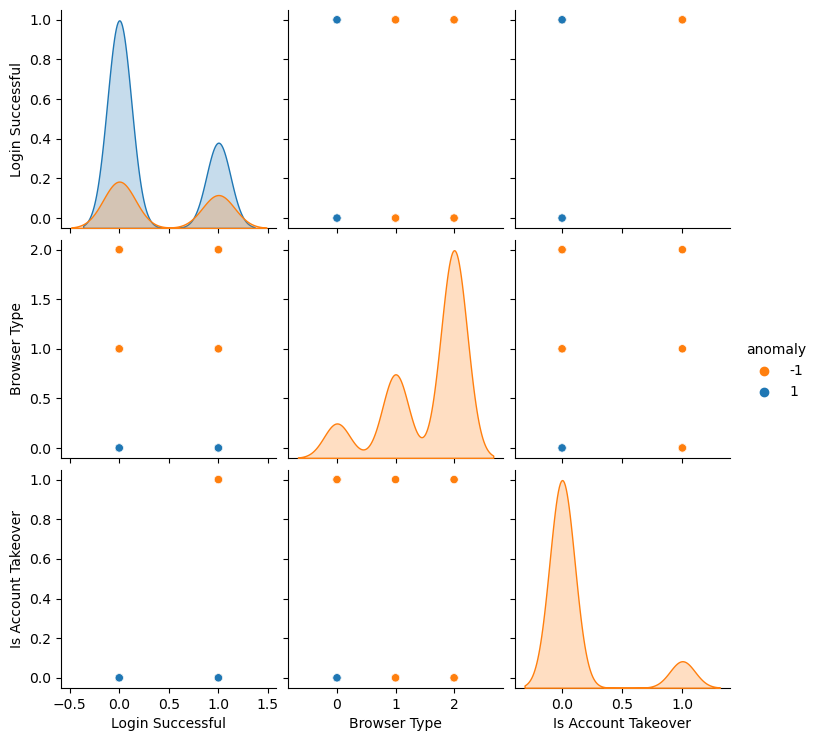

In [82]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 479
Number of non anomalous values  521
Total Number of Values: 1000


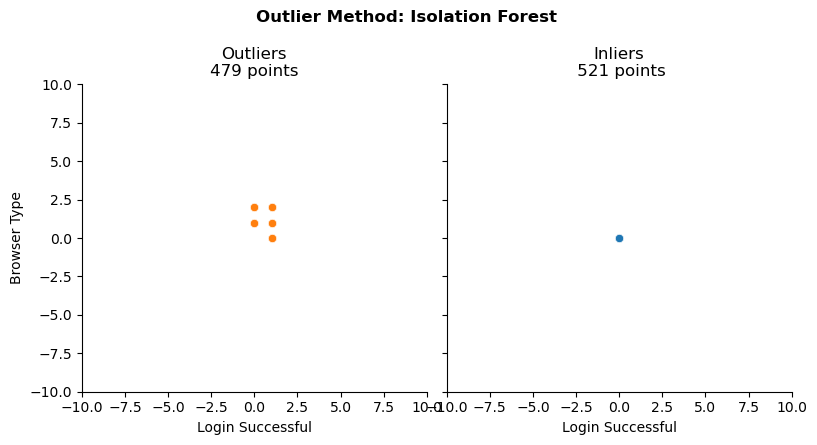

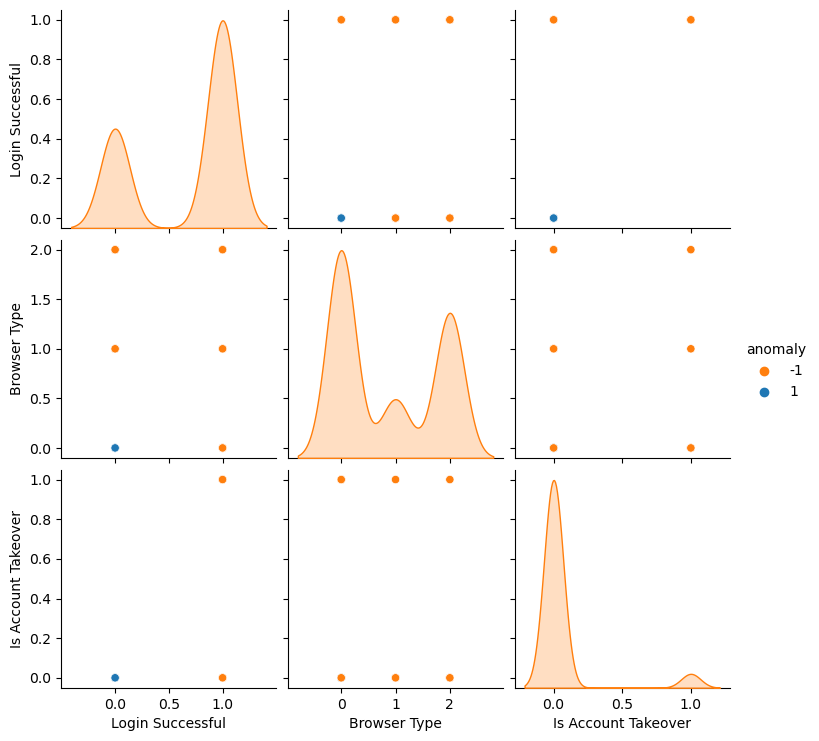

In [83]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  970
Total Number of Values: 1000


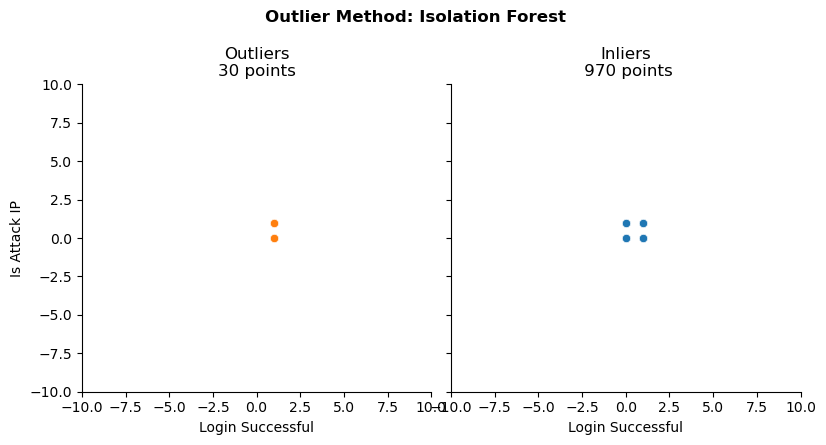

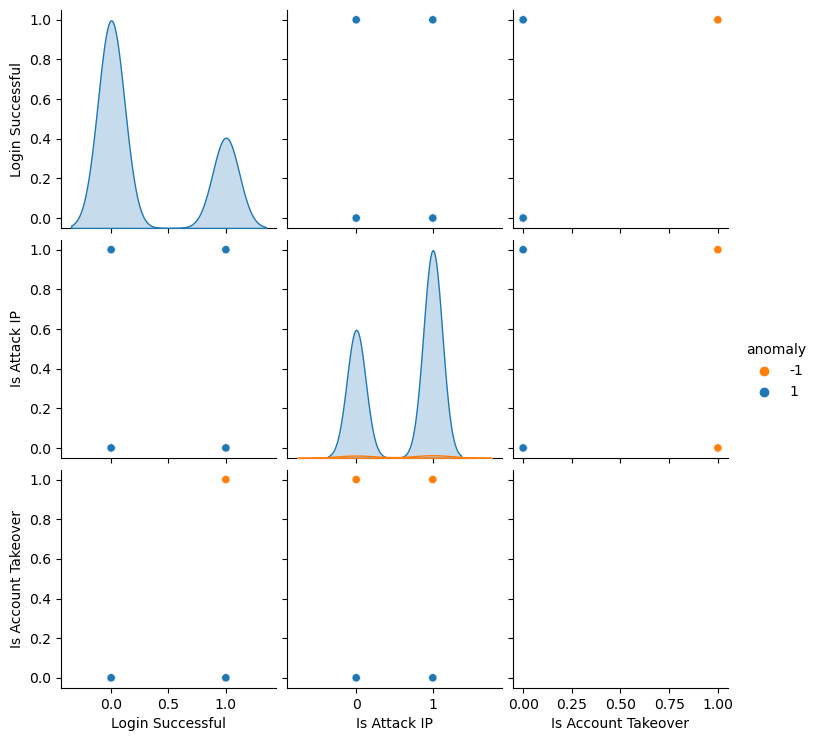

In [84]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 165
Number of non anomalous values  835
Total Number of Values: 1000


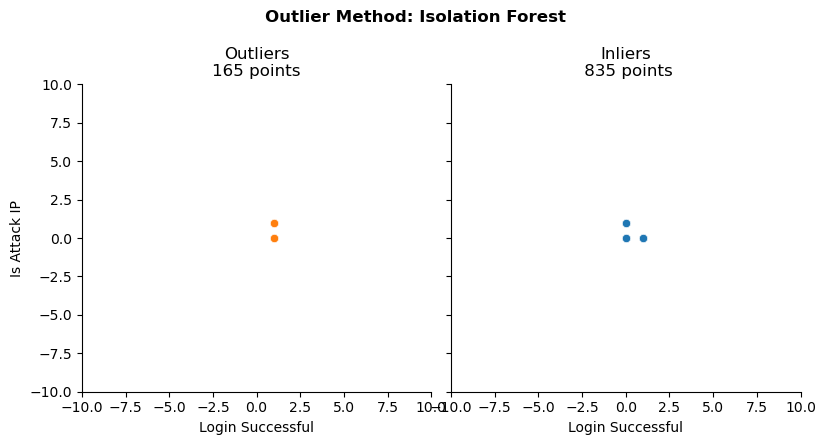

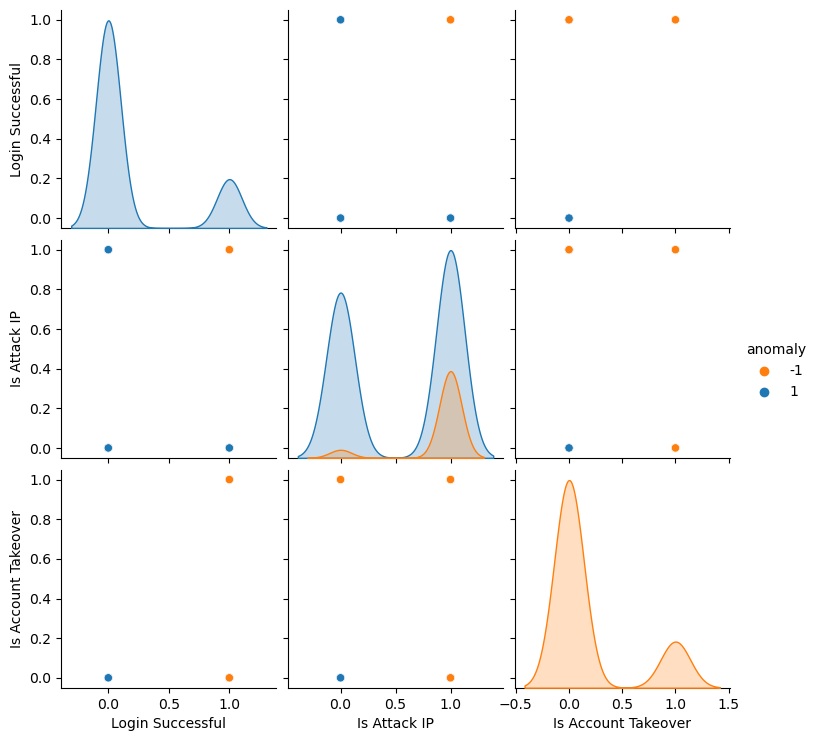

In [85]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 324
Number of non anomalous values  676
Total Number of Values: 1000


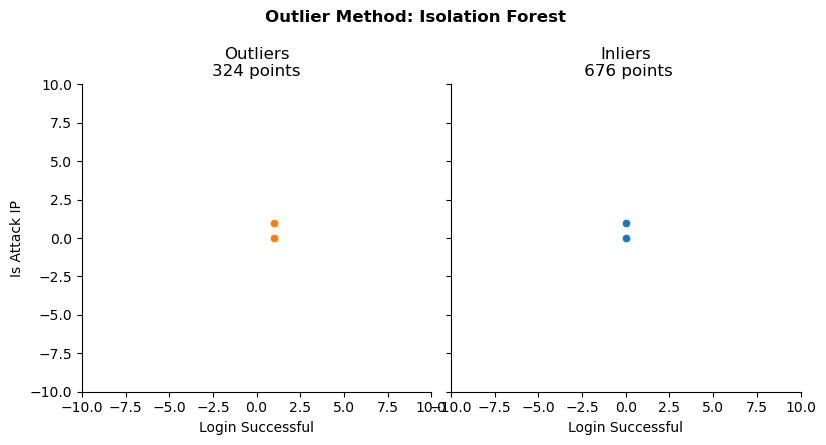

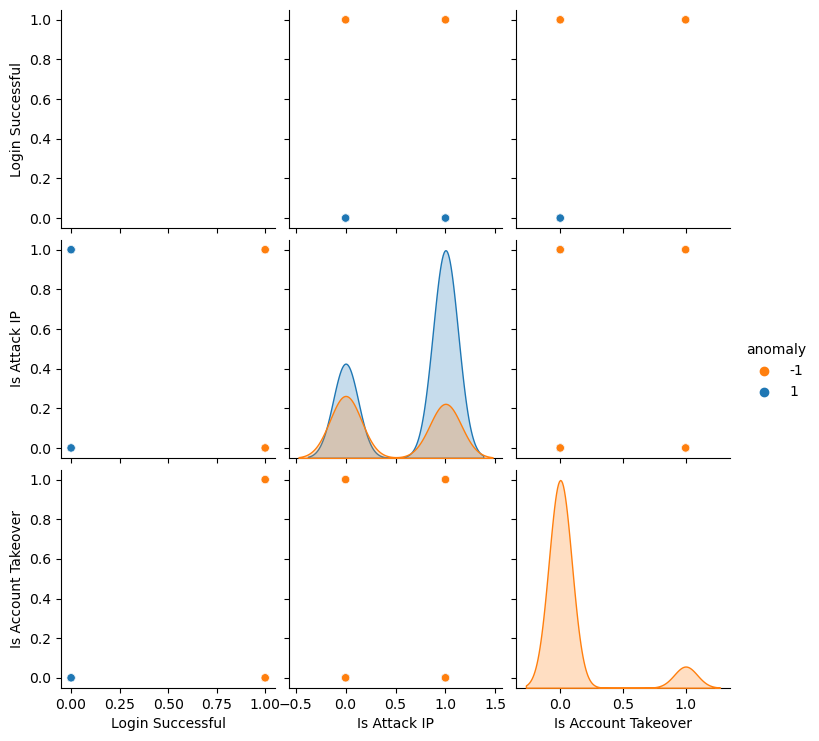

In [86]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 11) (970, 11)
(1000, 10)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 59
Accuracy Score :
0.941
Classification Report :
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       970
        True       0.03      0.03      0.03        30

    accuracy                           0.94      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.94      0.94      0.94      1000

Local Outlier Factor: 59
Accuracy Score :
0.941
Classification Report :
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       970
        True       0.03      0.03      0.03        30

    accuracy                           0.94      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.94      0.94      0.94      1000

Support Vector Machine: 824
Accuracy Score :
0.176
Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.16      0.28       970
        True       0.0

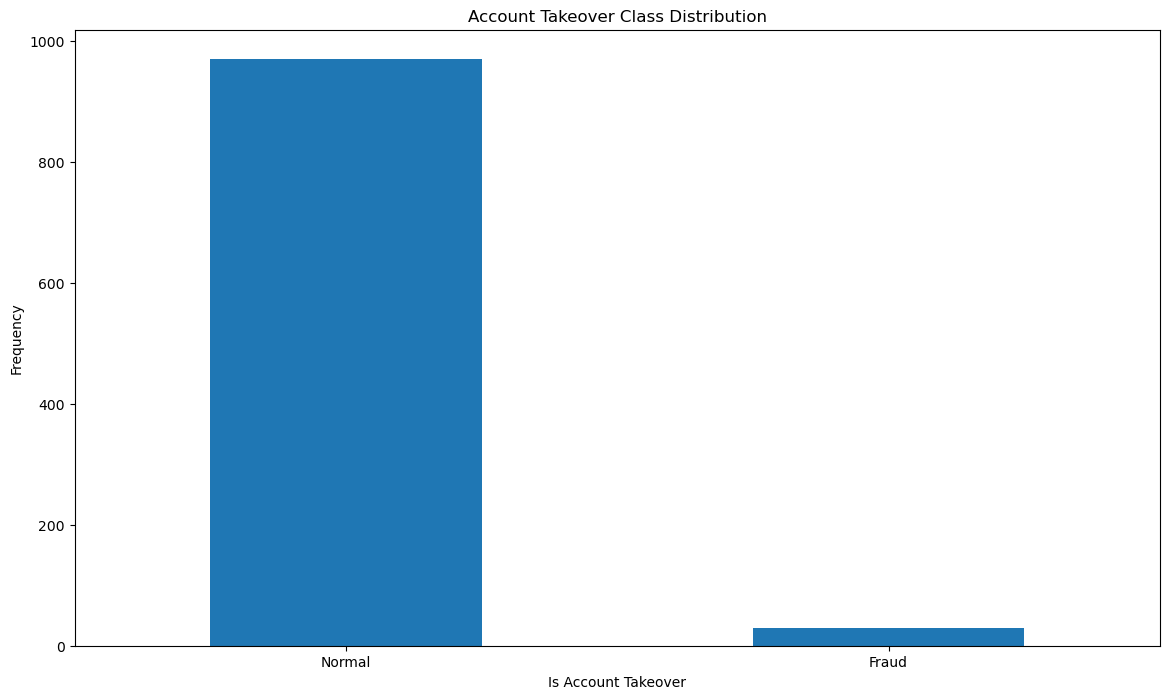

In [87]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [88]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1727 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(1721)
memory usage: 1.7 MB


ASN  Is Account Takeover  Is Attack IP  Login Successful  \
0  393398.0                False          True             False   
1  393398.0                False          True              True   
2  398986.0                False          True             False   
3   63765.0                False          True             False   
4  393398.0                False         False             False   

        User ID  Blacklisted  cntr_AM  cntr_AR  cntr_AU  cntr_BA  ...  \
0 -4.324476e+18         True        0        0        0        0  ...   
1 -7.141943e+18         True        0        0        0        0  ...   
2 -4.324476e+18         True        0        0        0        0  ...   
3 -4.324476e+18         True        0        0        0        0  ...   
4 -4.324476e+18         True        0        0        0        0  ...   

   lgnt_2021-02-28 23:56:23.148  lgnt_2021-02-28 23:56:44.382  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:57:00.409  lgnt_2021-02-28 23:57:20.002  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:58:04.017  lgnt_2021-02-28 23:58:44.011  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:59:22.608  brw_C  brw_F  brw_O  
0                             0      1      0      0  
1                             0      1      0      0  
2                             0      1      0      0  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 1727 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1727 entries, ASN to Is Account Takeover
dtypes: bool(4), float64(2), uint8(1721)
memory usage: 1.7 MB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 98.18%
              precision    recall  f1-score   

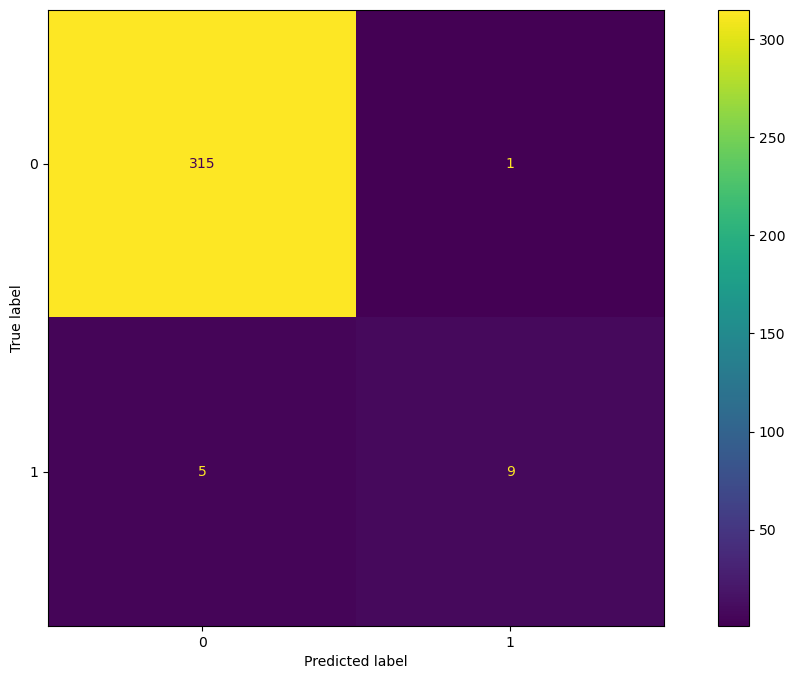

In [89]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 776 records for the majority class and 24 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.31      0.48       194
        True       0.04      1.00      0.08         6

    accuracy                           0.34       200
   macro avg       0.52      0.66      0.28       200
weighted avg       0.97      0.34      0.47       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       194
        True       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

[[ 61 133]
 [  0   6]]


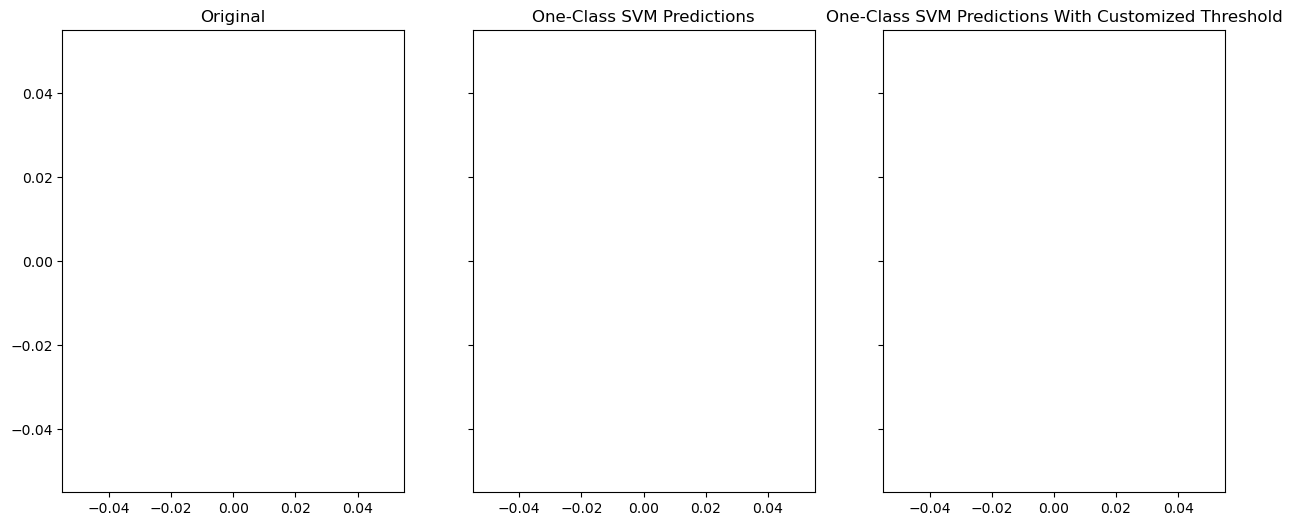

In [90]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 679 records for the majority class and 21 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.01      0.03       291
        True       0.03      1.00      0.06         9

    accuracy                           0.04       300
   macro avg       0.52      0.51      0.04       300
weighted avg       0.97      0.04      0.03       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       291
        True       0.00      0.00      0.00         9

    accuracy                           0.97       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.94      0.97      0.96       300

[[  4 287]
 [  0   9]]


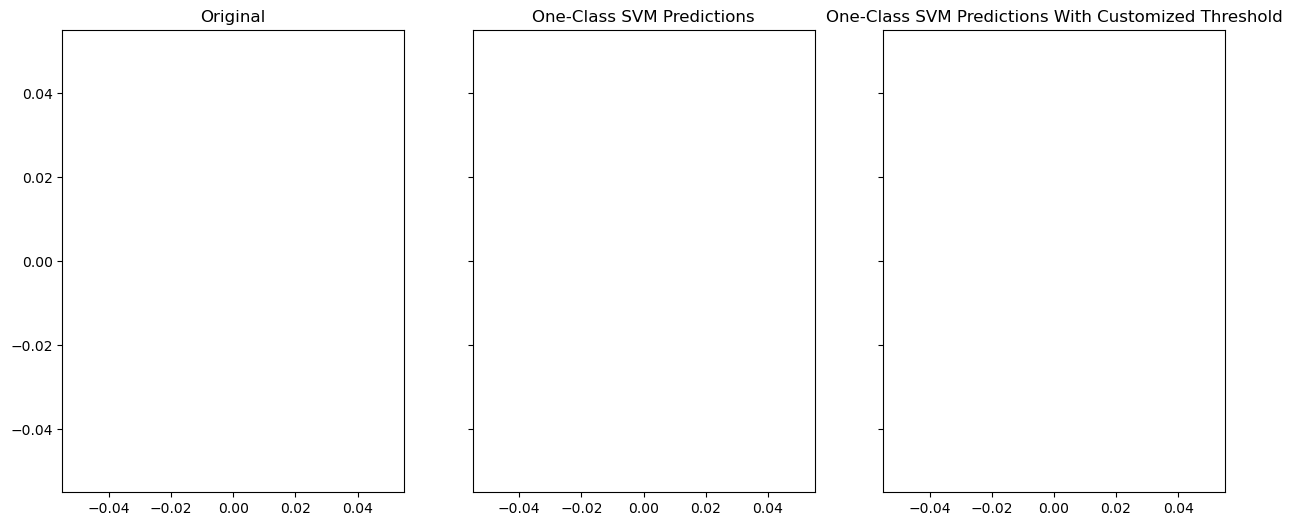

In [91]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 484 records for the majority class and 16 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.04      0.07       486
        True       0.03      1.00      0.06        14

    accuracy                           0.06       500
   macro avg       0.51      0.52      0.06       500
weighted avg       0.97      0.06      0.07       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       486
        True       0.00      0.00      0.00        14

    accuracy                           0.97       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.94      0.97      0.96       500

[[ 18 468]
 [  0  14]]


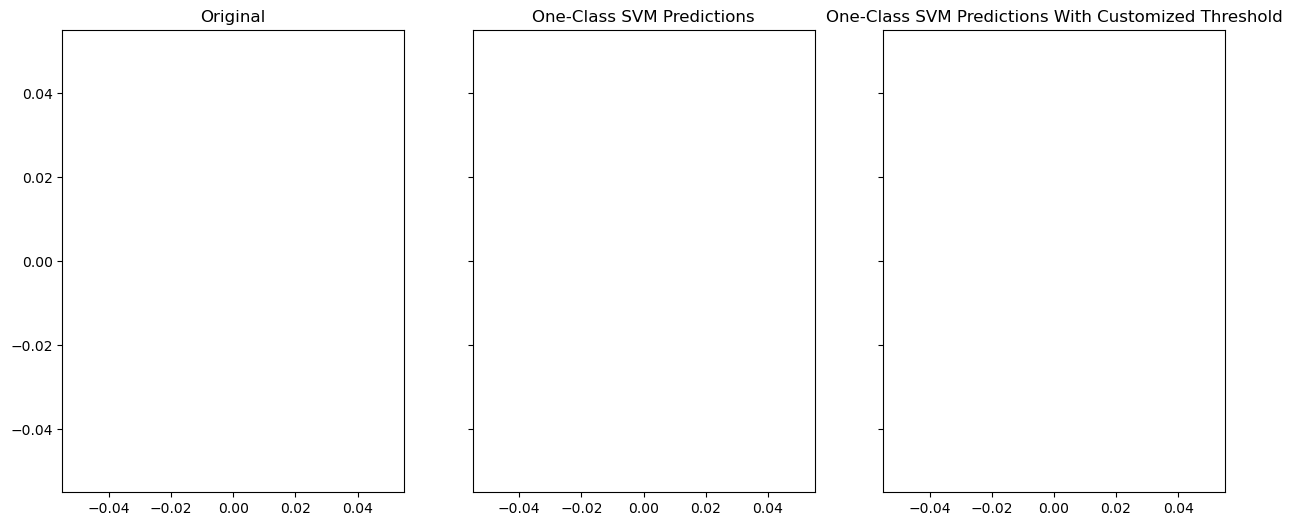

In [92]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1726]
Y = dataset.iloc[:,1726]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [93]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0            True         True        0.069261        1                False
1            True         True        0.069261        1                False
2            True         True        0.069261        1                False
3            True         True        0.069261        1                False
4           False         True        0.000000        1                False
..            ...          ...             ...      ...                  ...
995          True        False        0.016682        1                False
996          True         True        0.069261        1                False
997          True         True        0.069261        1                False
998         False        False        0.040128        1                False
999          True         True        0.069261        1                False

[1000 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  970
Total Number of Values: 1000


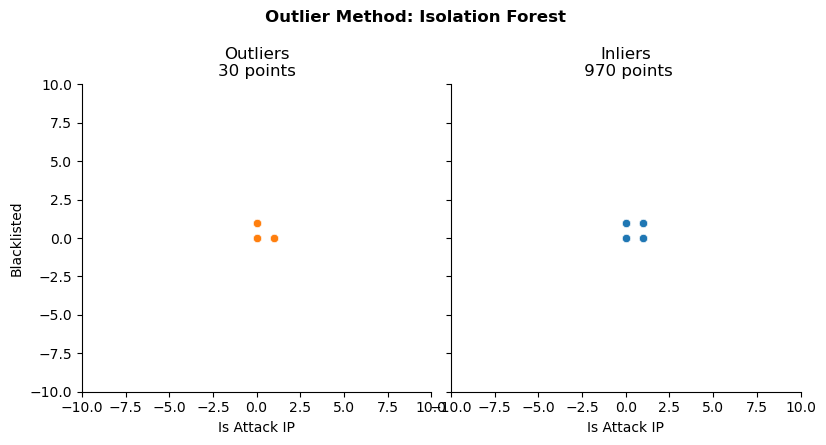

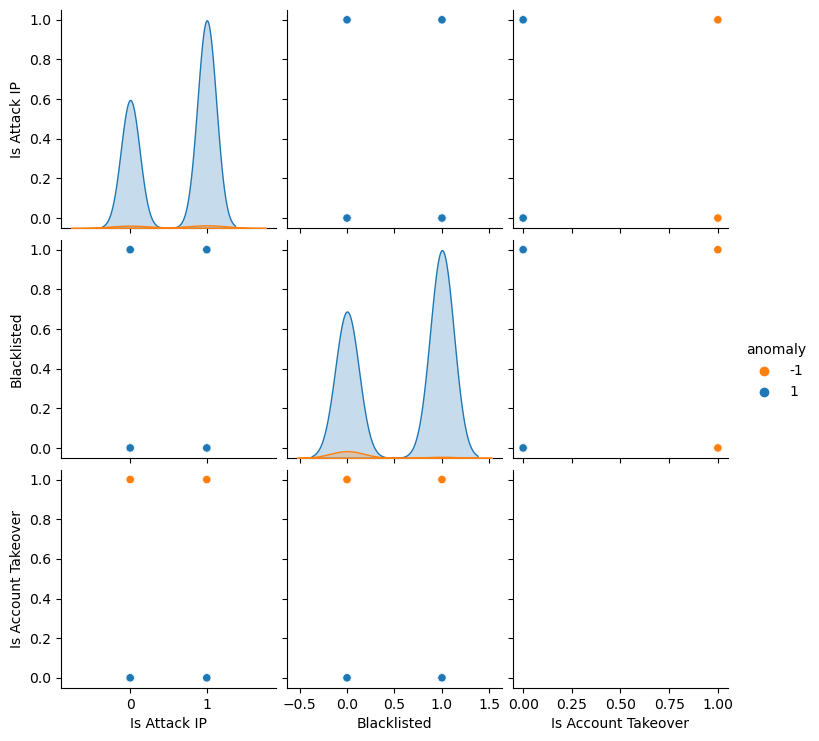

In [94]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 166
Number of non anomalous values  834
Total Number of Values: 1000


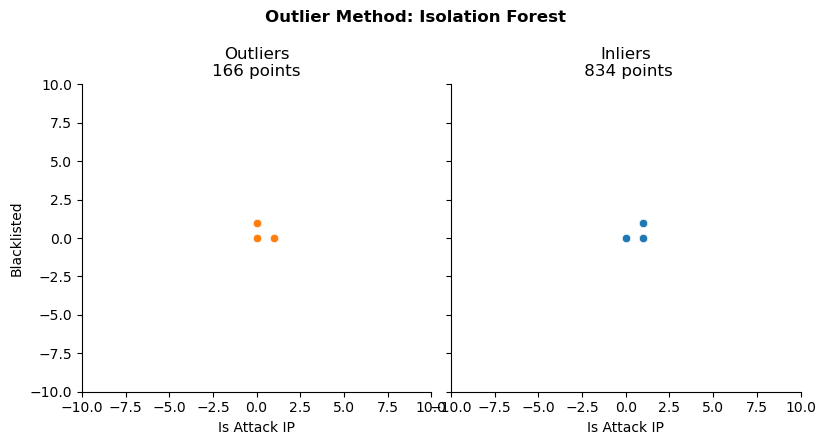

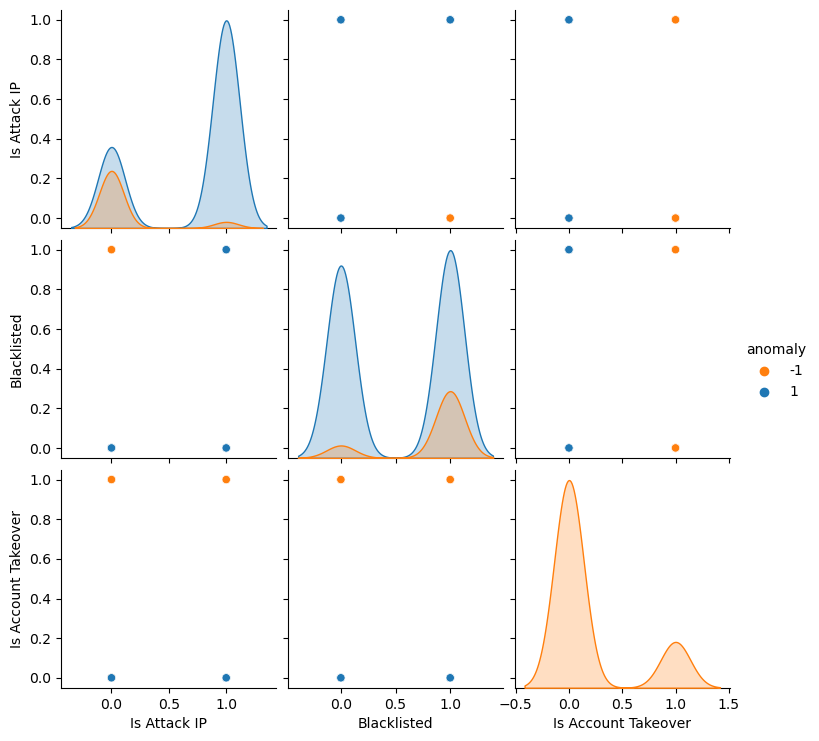

In [95]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 333
Number of non anomalous values  667
Total Number of Values: 1000


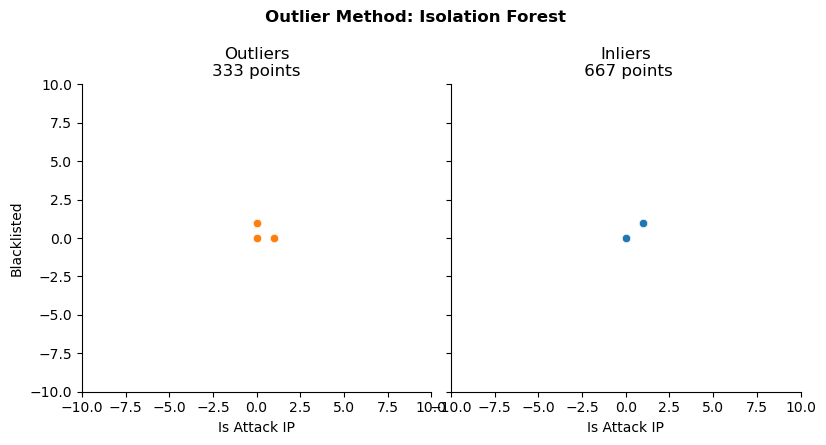

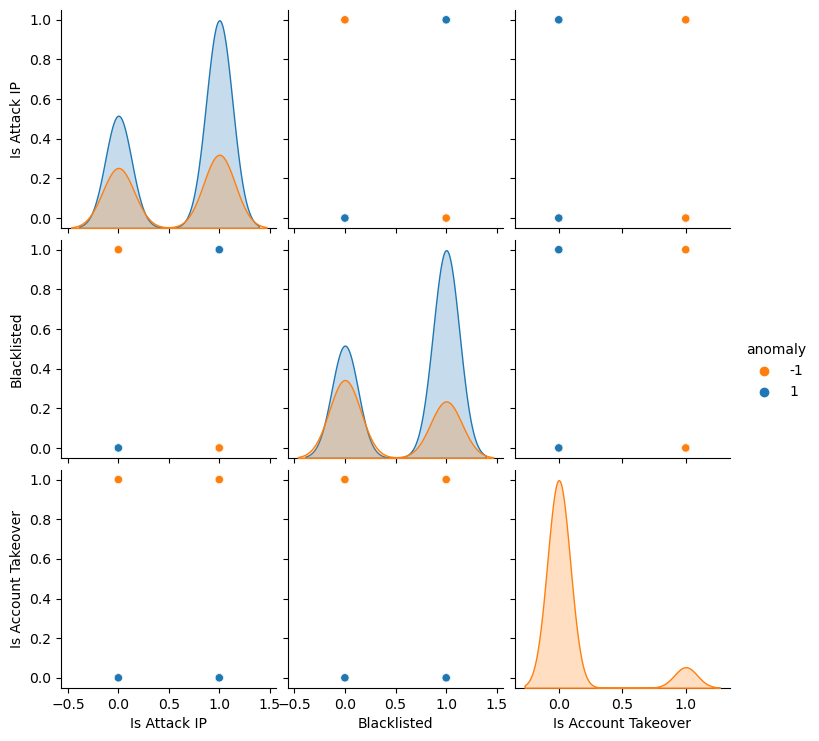

In [96]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 85
Number of non anomalous values  915
Total Number of Values: 1000


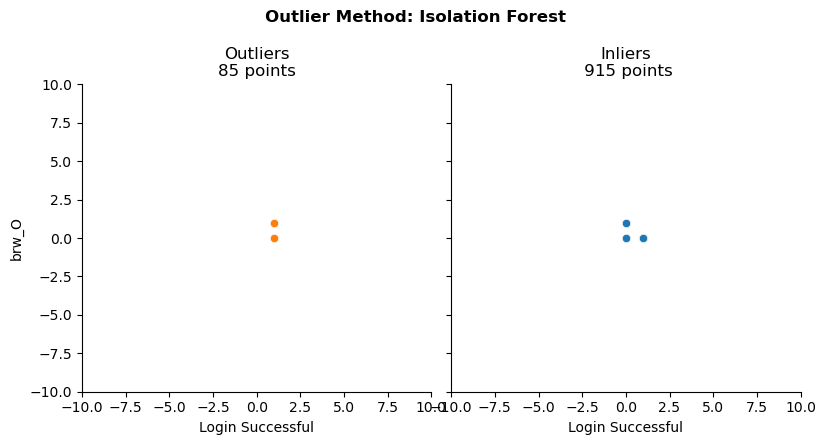

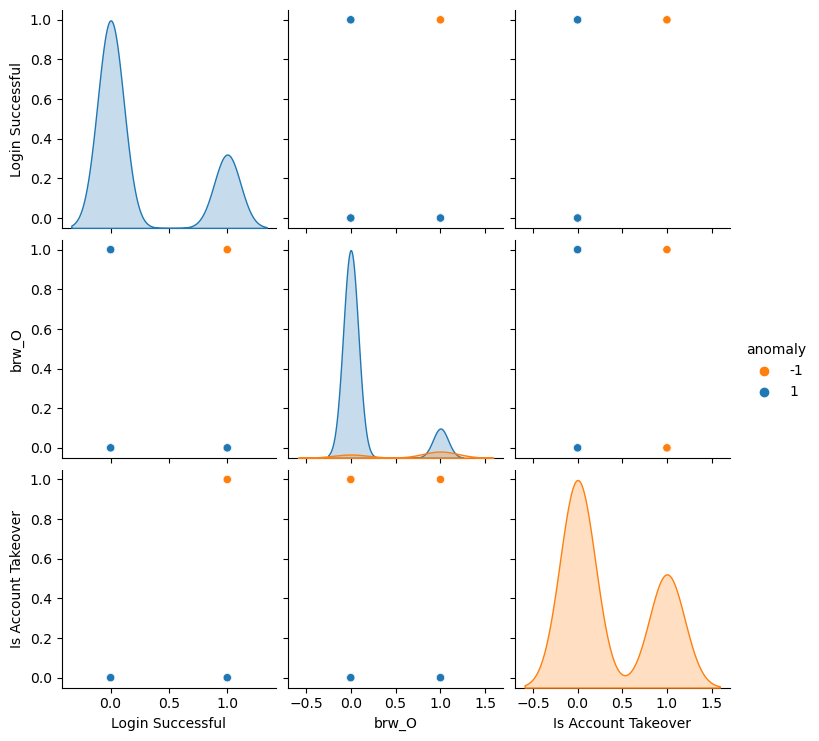

In [97]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 198
Number of non anomalous values  802
Total Number of Values: 1000


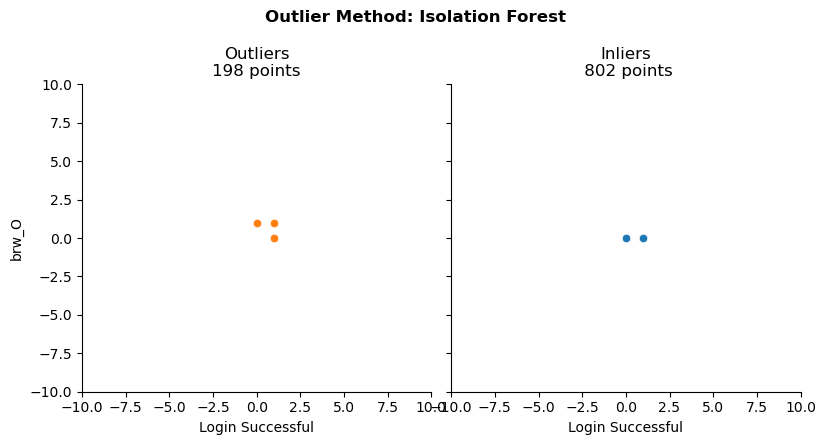

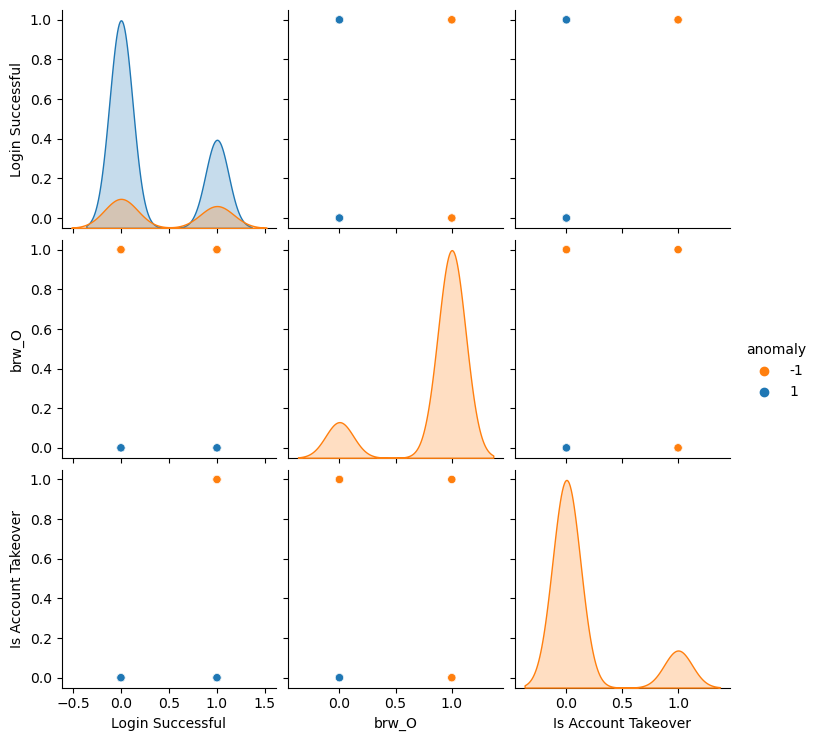

In [98]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 437
Number of non anomalous values  563
Total Number of Values: 1000


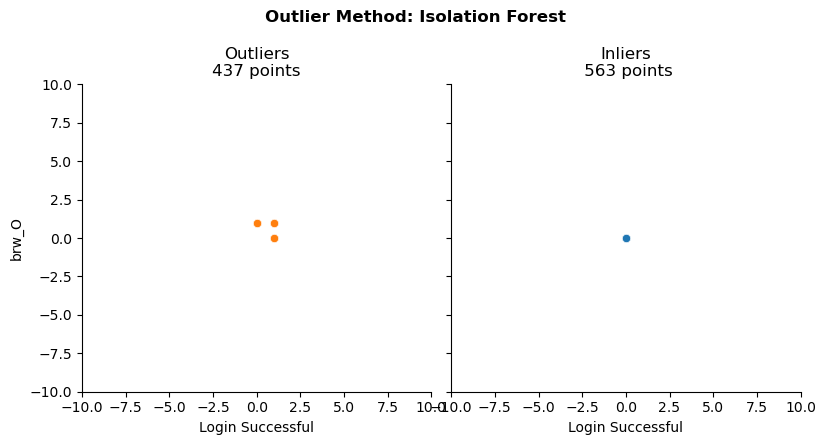

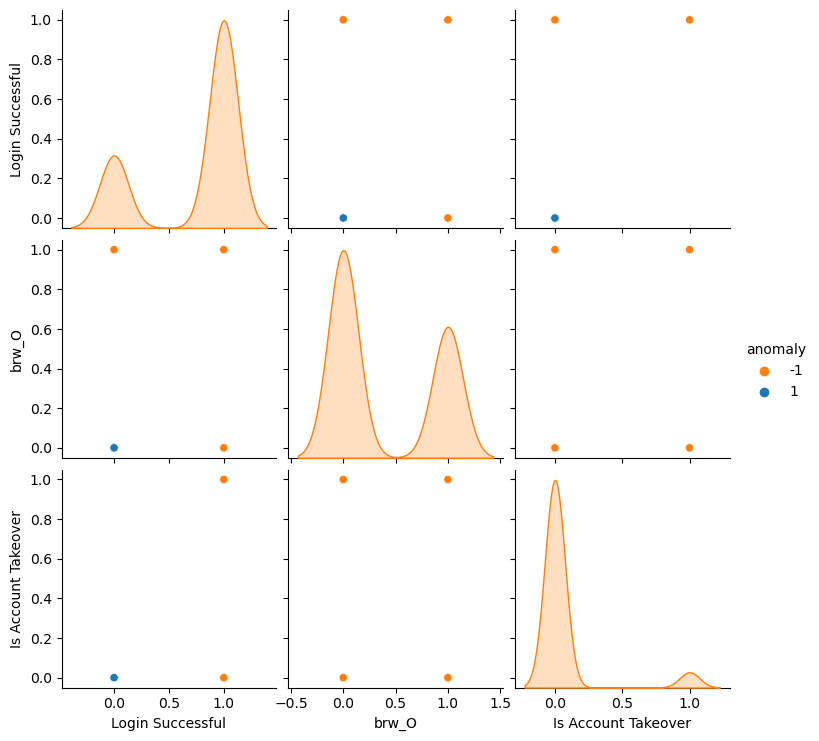

In [99]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  970
Total Number of Values: 1000


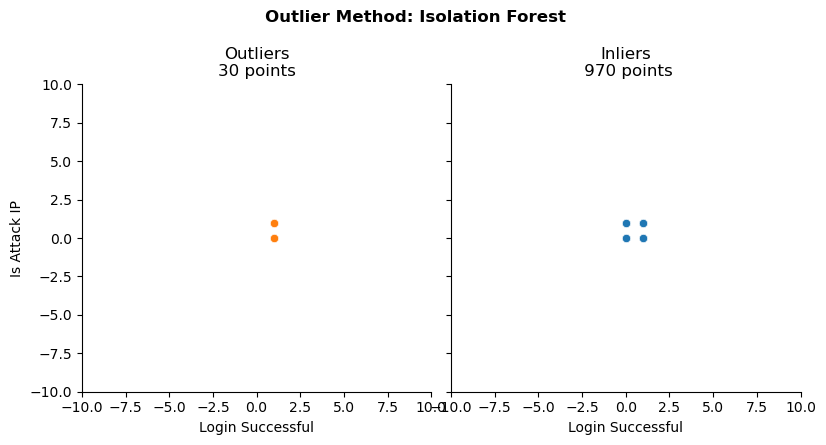

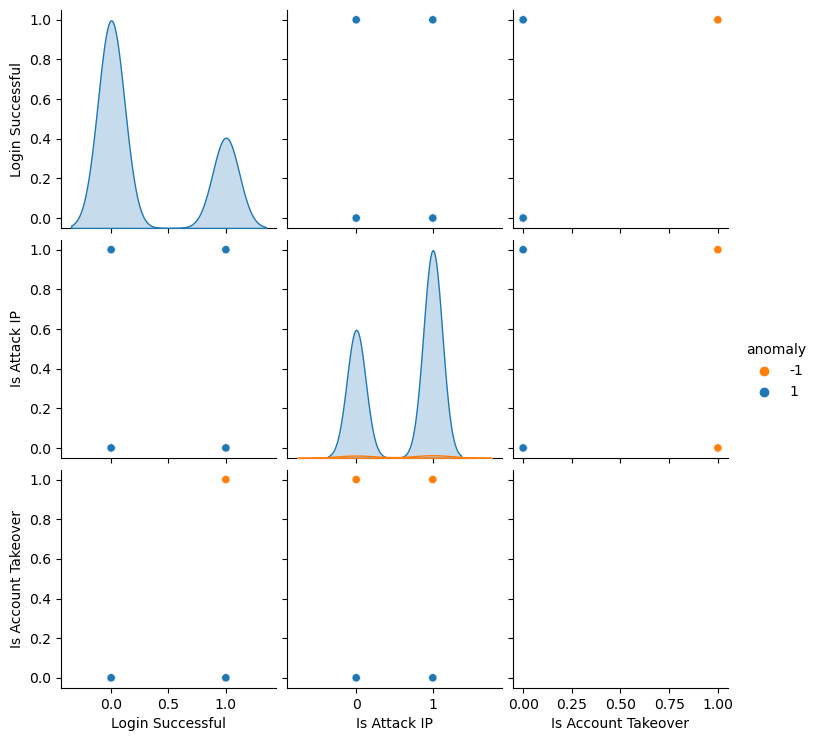

In [100]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 165
Number of non anomalous values  835
Total Number of Values: 1000


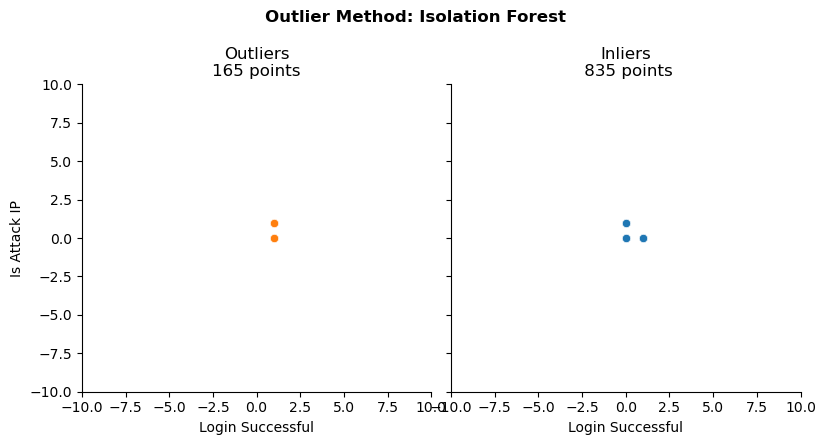

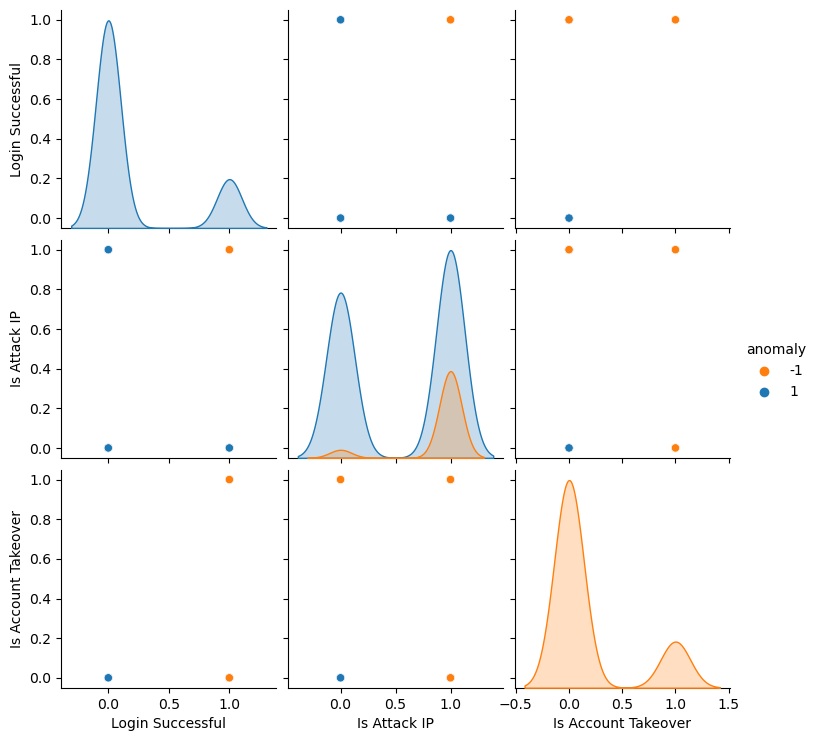

In [101]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 324
Number of non anomalous values  676
Total Number of Values: 1000


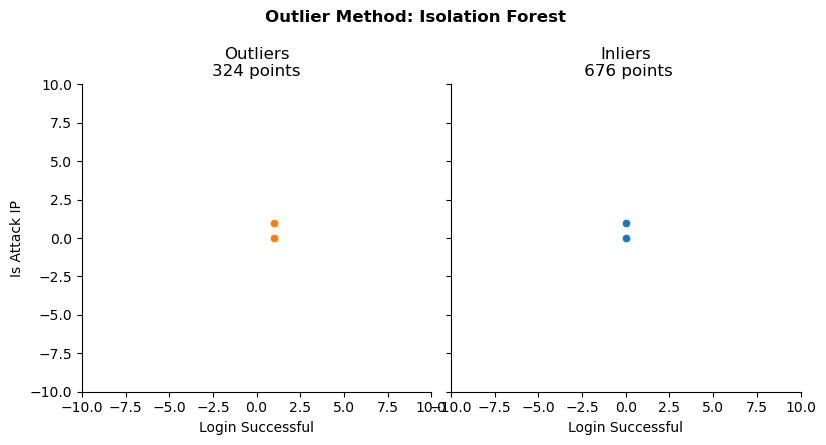

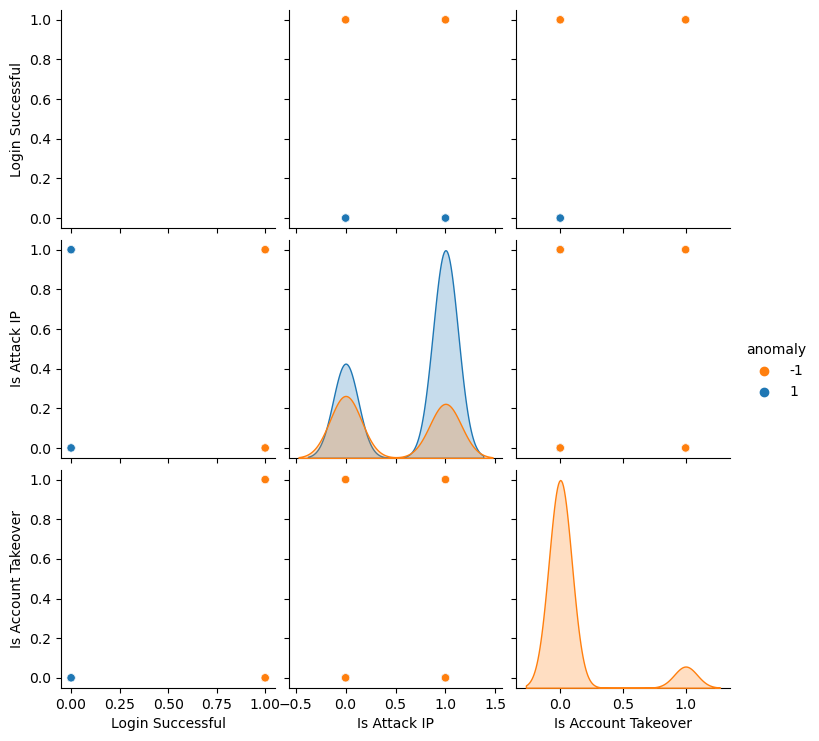

In [102]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 1727) (970, 1727)
(1000, 1726)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 61
Accuracy Score :
0.939
Classification Report :
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       970
        True       0.00      0.00      0.00        30

    accuracy                           0.94      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.94      0.94      0.94      1000

Local Outlier Factor: 55
Accuracy Score :
0.945
Classification Report :
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       970
        True       0.10      0.10      0.10        30

    accuracy                           0.94      1000
   macro avg       0.53      0.54      0.53      1000
weighted avg       0.95      0.94      0.95      1000

Support Vector Machine: 824
Accuracy Score :
0.176
Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.16      0.28       970
        True       0.0

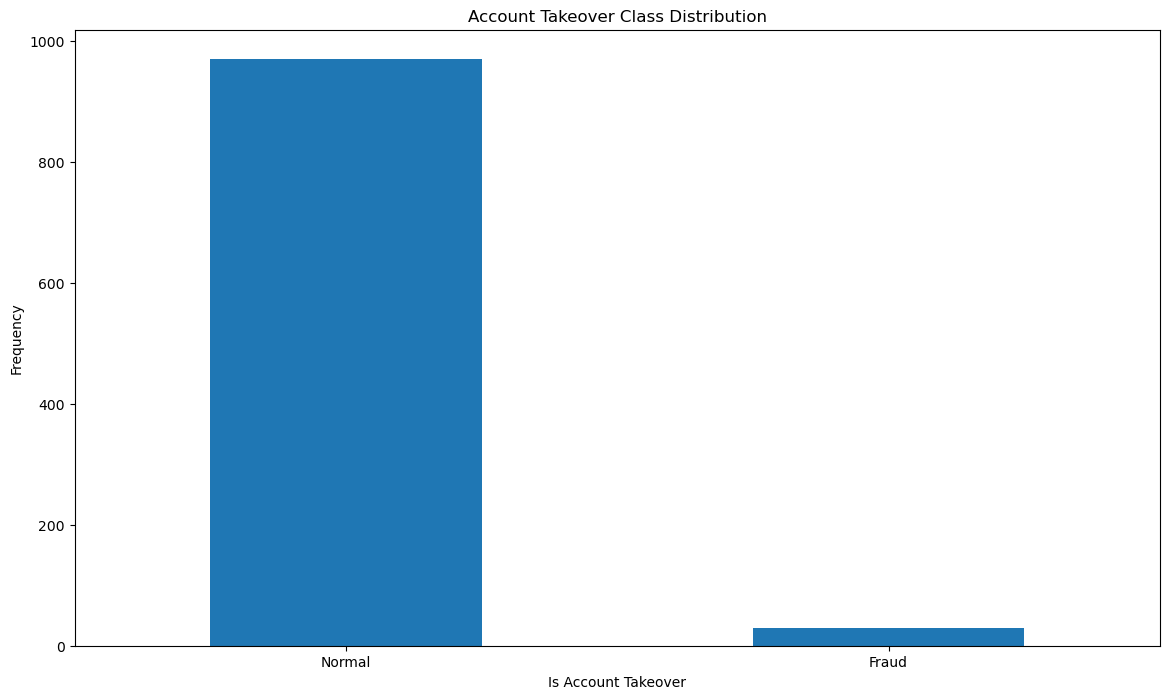

In [103]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

## New dataset with divide in ['Is Attack IP'] == True & ['Is Account Takeover'] == True 
### 77/1000 ATO

In [104]:
import pandas as pd

attackAndTakeover = pd.read_csv('divided-chunks/attackAndTakeover77.csv')
restAttackAndTakeover = pd.read_csv('divided-chunks/restAttackAndTakeover31269187.csv')

In [105]:
import numpy as np

attackAndTakeover['Login Timestamp'] =  pd.to_datetime(attackAndTakeover['Login Timestamp'], infer_datetime_format=True)
restAttackAndTakeover['Login Timestamp'] =  pd.to_datetime(restAttackAndTakeover['Login Timestamp'], infer_datetime_format=True)

restAttackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)
attackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)

attackAndTakeover['IP Address'] = attackAndTakeover['IP Address'].apply(lambda x: str(x))
attackAndTakeover = attackAndTakeover.reset_index(drop=True)
restAttackAndTakeover['IP Address'] = restAttackAndTakeover['IP Address'].apply(lambda x: str(x))
restAttackAndTakeover = restAttackAndTakeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
attackAndTakeover["Blacklisted"] = np.where(attackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_devices)
restAttackAndTakeover["Blacklisted"] = np.where(restAttackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_devices)

attackAndTakeover["Browser Type"] = (np.where(attackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(attackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_browser)
restAttackAndTakeover["Browser Type"] = (np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_browser)

In [106]:
attackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
attackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('bool')

restAttackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
restAttackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('bool')


In [107]:
attackAndTakeover = attackAndTakeover.sample(frac=1).reset_index(drop=True)
restAttackAndTakeover = restAttackAndTakeover.sample(frac=1).reset_index(drop=True)

In [108]:
df = pd.concat([attackAndTakeover, restAttackAndTakeover.head(923)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

df1 = df.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      1000 non-null   category
 1   User ID              1000 non-null   int64   
 2   IP Address           1000 non-null   category
 3   Country              1000 non-null   category
 4   ASN                  1000 non-null   int64   
 5   Device Type          1000 non-null   category
 6   Login Successful     1000 non-null   bool    
 7   Is Attack IP         1000 non-null   bool    
 8   Is Account Takeover  1000 non-null   bool    
 9   Blacklisted          1000 non-null   bool    
 10  Browser Type         1000 non-null   category
dtypes: bool(4), category(5), int64(2)
memory usage: 107.6 KB


# Experimental XGBoost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      1000 non-null   category
 1   User ID              1000 non-null   int64   
 2   IP Address           1000 non-null   category
 3   Country              1000 non-null   category
 4   ASN                  1000 non-null   int64   
 5   Device Type          1000 non-null   category
 6   Login Successful     1000 non-null   bool    
 7   Is Attack IP         1000 non-null   bool    
 8   Blacklisted          1000 non-null   bool    
 9   Browser Type         1000 non-null   category
 10  Is Account Takeover  1000 non-null   bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 107.6 KB
Feature importances:
[0.         0.01772542 0.03462604 0.70550615 0.00749496 0.09745706
 0.07308619 0.0641042  0.         0.        ]


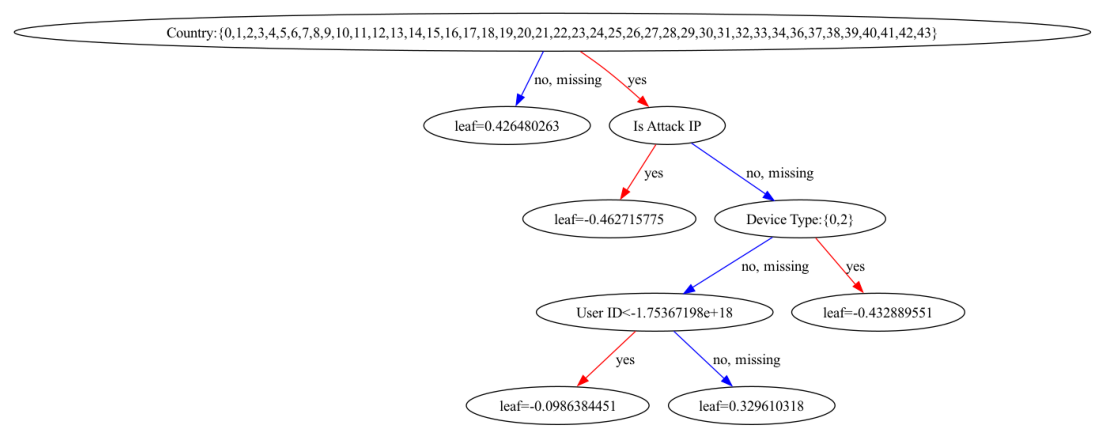

In [109]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

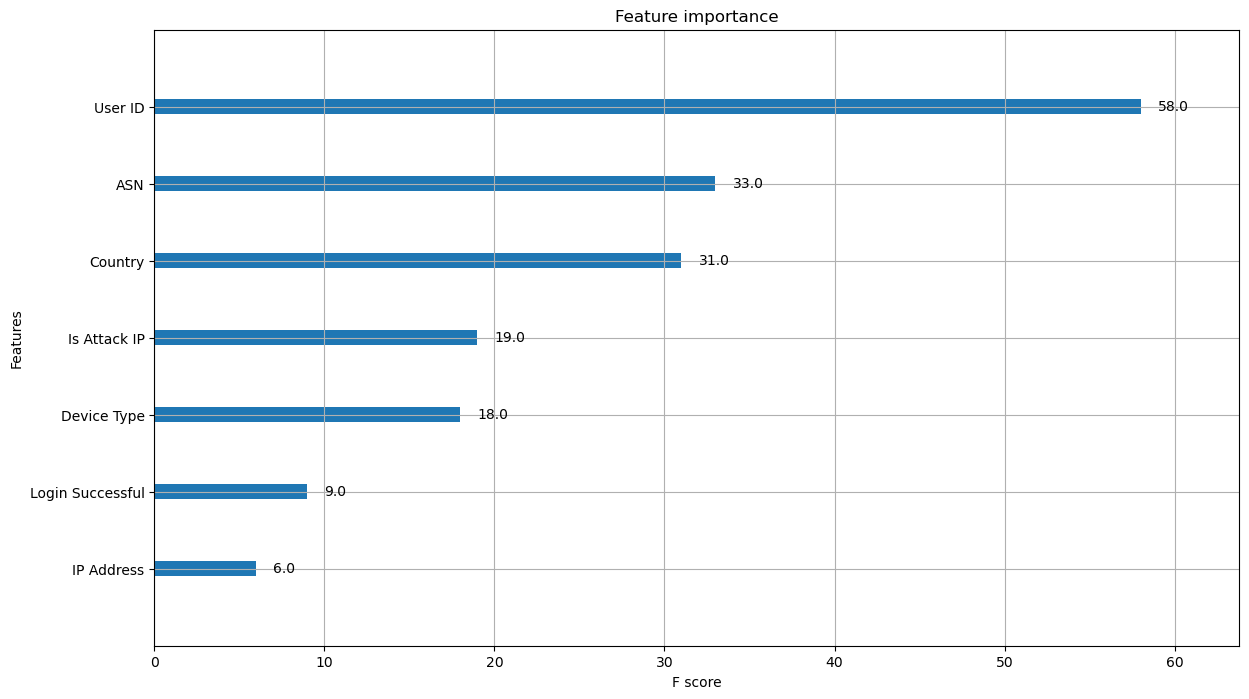

In [110]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [111]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      1000 non-null   int16
 1   User ID              1000 non-null   int64
 2   IP Address           1000 non-null   int16
 3   Country              1000 non-null   int8 
 4   ASN                  1000 non-null   int64
 5   Device Type          1000 non-null   int8 
 6   Login Successful     1000 non-null   bool 
 7   Is Attack IP         1000 non-null   bool 
 8   Is Account Takeover  1000 non-null   bool 
 9   Blacklisted          1000 non-null   bool 
 10  Browser Type         1000 non-null   int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 26.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      1000 non-null   int16
 1   User ID              1000 non-null   int64
 2   IP Address           1000 non-null   int16
 3   Country              1000 non-null   int8 
 4   ASN                  1000 non-null   int64
 5   Device Type          1000 non-null   int8 
 6   Login Successful     1000 non-null   bool 
 7   Is Attack IP         1000 non-null   bool 
 8   Blacklisted          1000 non-null   bool 
 9   Browser Type         1000 non-null   int8 
 10  Is Account Takeover  1000 non-null   bool 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 26.5 KB
Accuracy: 98.79%
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       301
        True       0.93      0.93      0.93        29

    accuracy          

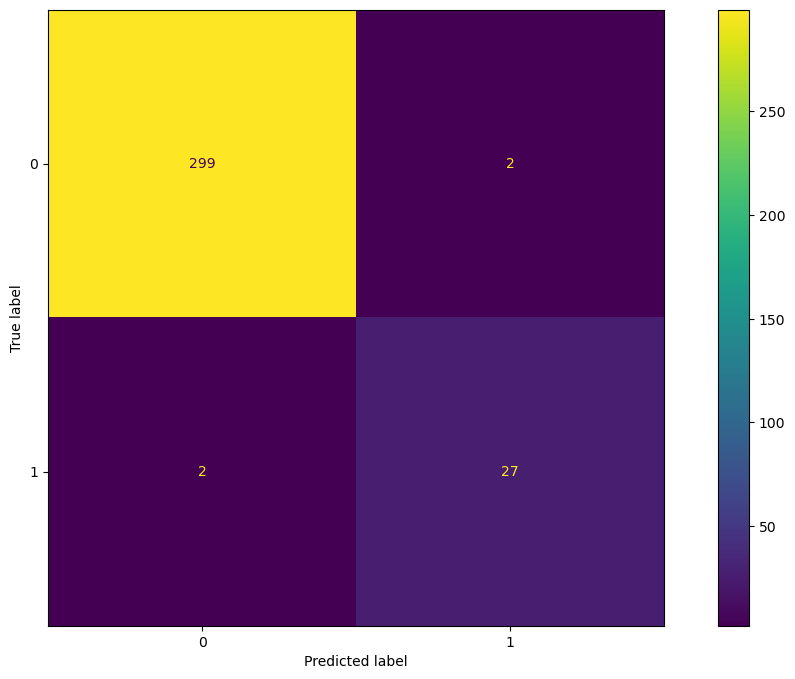

In [113]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 742 records for the majority class and 58 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       181
        True       0.10      1.00      0.17        19

    accuracy                           0.10       200
   macro avg       0.05      0.50      0.09       200
weighted avg       0.01      0.10      0.02       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       181
        True       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

[[  0 181]
 [  0  19]]


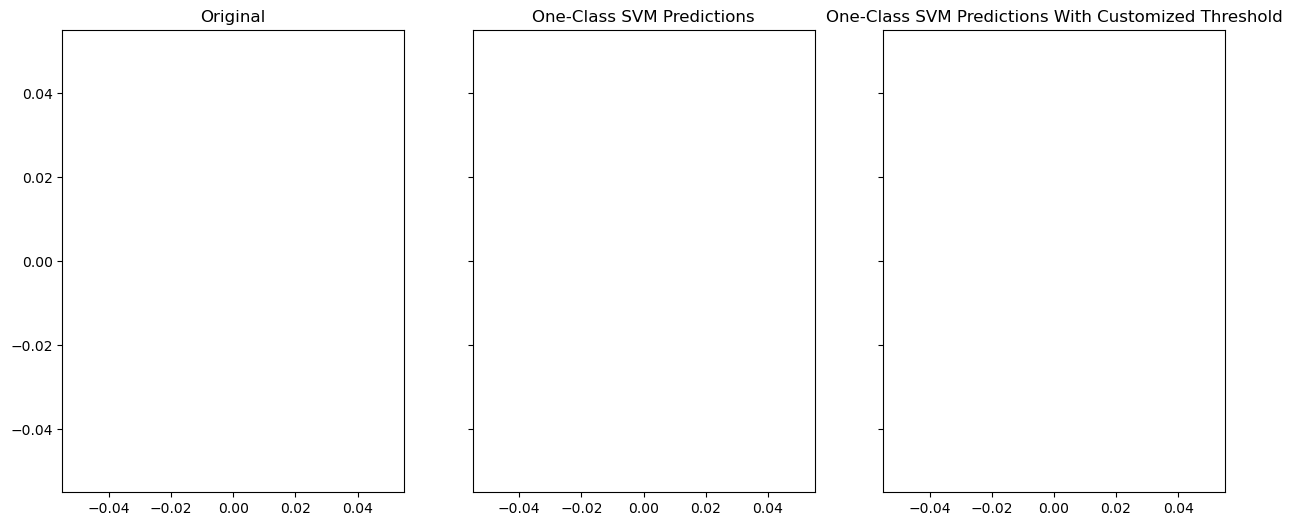

In [114]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 655 records for the majority class and 45 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       268
        True       0.11      1.00      0.19        32

    accuracy                           0.11       300
   macro avg       0.05      0.50      0.10       300
weighted avg       0.01      0.11      0.02       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       268
        True       0.00      0.00      0.00        32

    accuracy                           0.89       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.89      0.84       300

[[  0 268]
 [  0  32]]


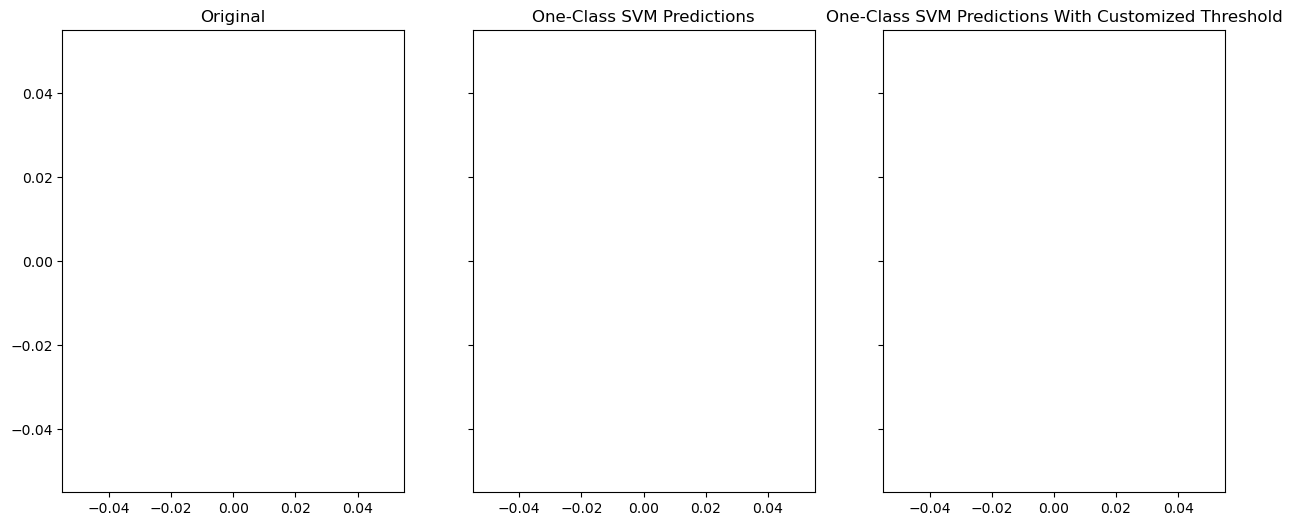

In [115]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 472 records for the majority class and 28 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       451
        True       0.10      1.00      0.18        49

    accuracy                           0.10       500
   macro avg       0.05      0.50      0.09       500
weighted avg       0.01      0.10      0.02       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       451
        True       0.00      0.00      0.00        49

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.86       500

[[  0 451]
 [  0  49]]


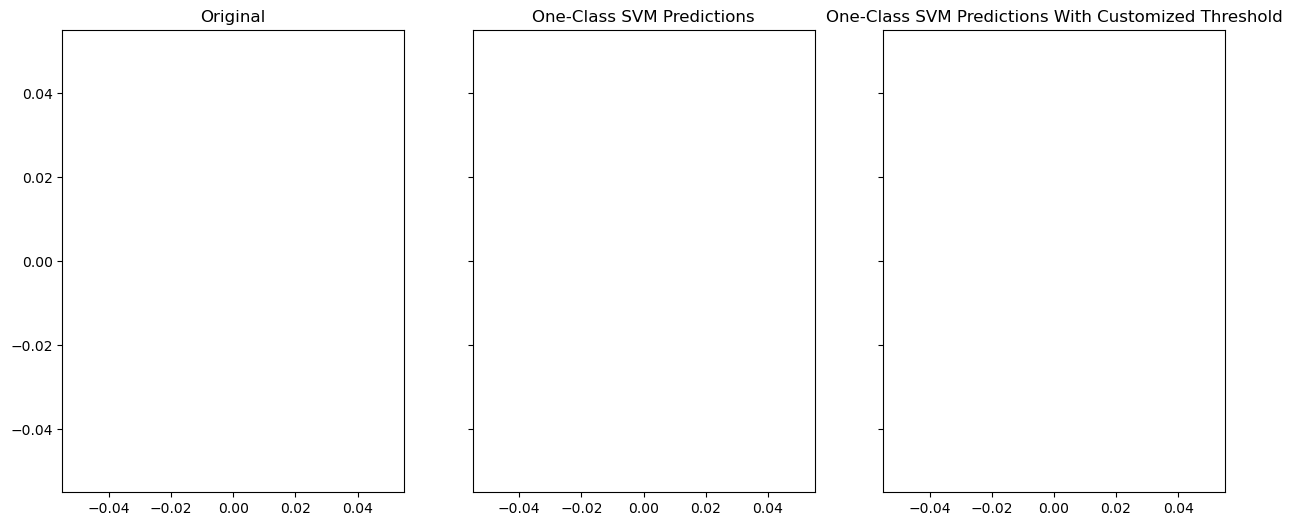

In [116]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 90
Number of non anomalous values  910
Total Number of Values: 1000


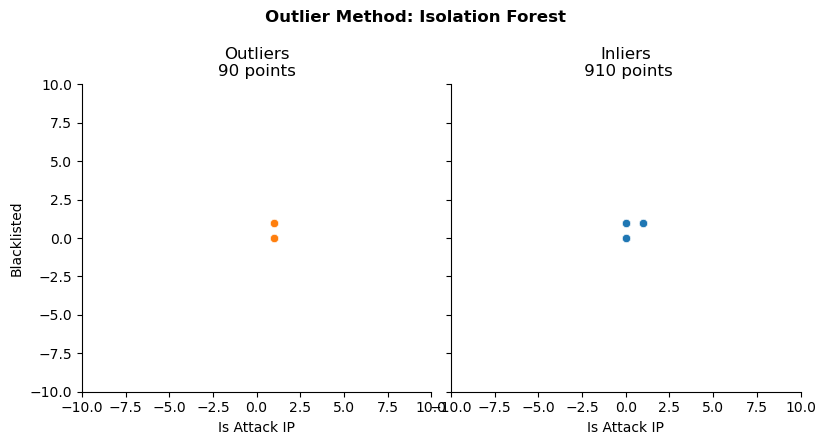

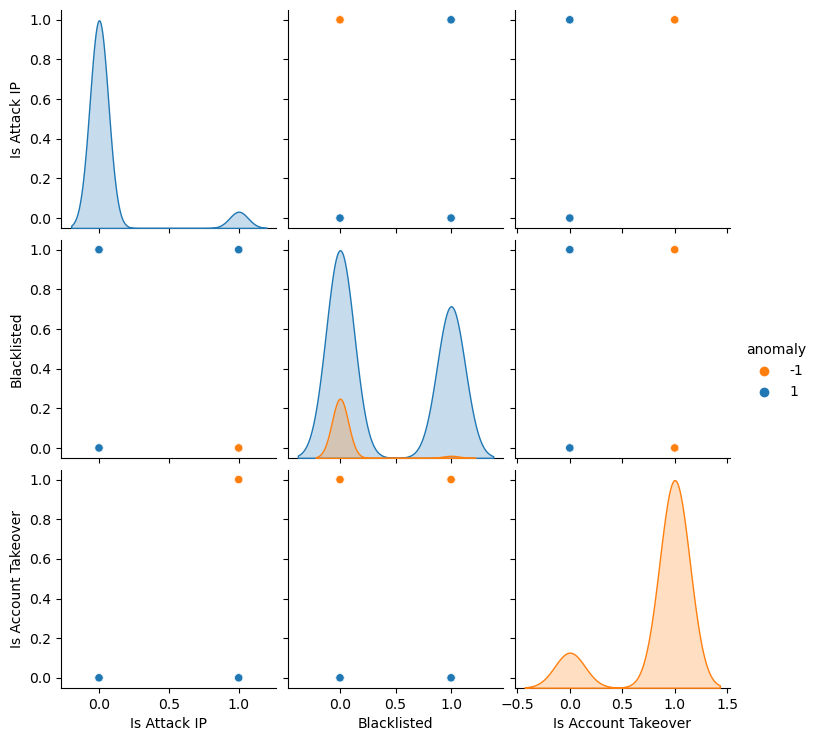

In [117]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


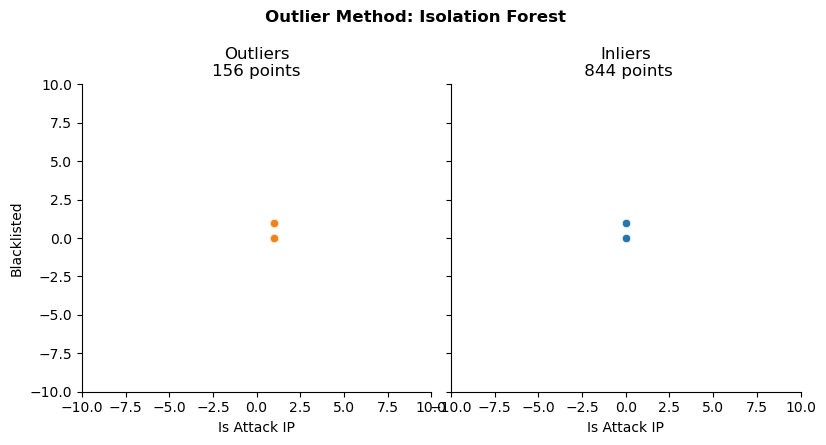

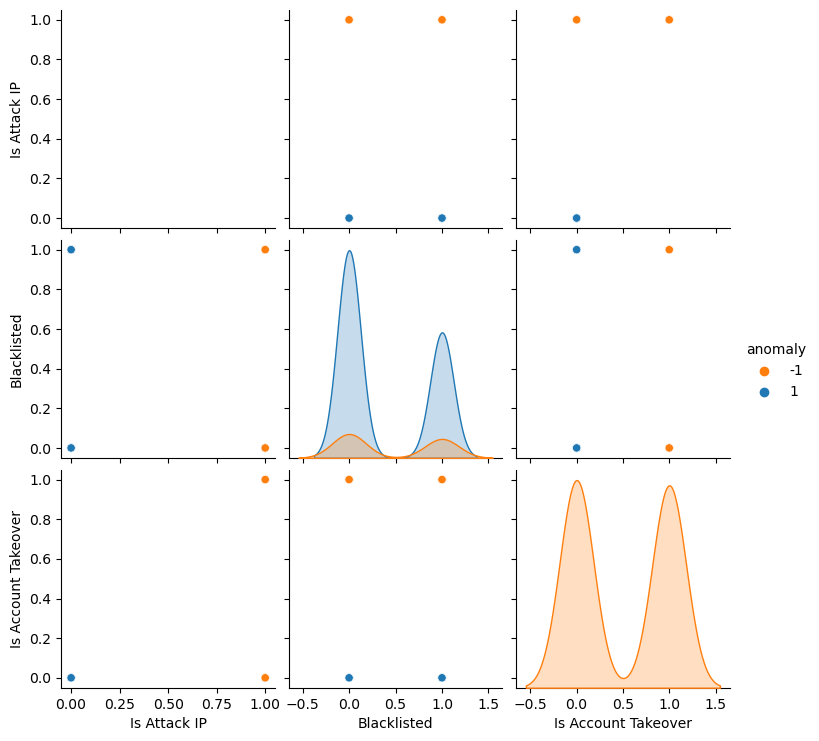

In [118]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 474
Number of non anomalous values  526
Total Number of Values: 1000


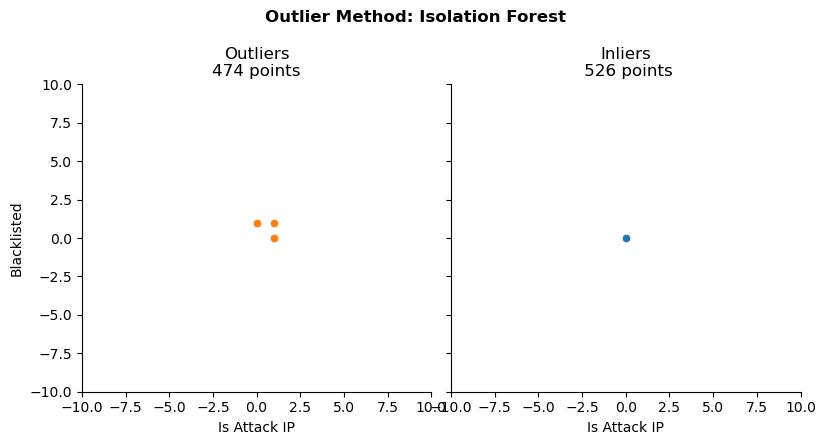

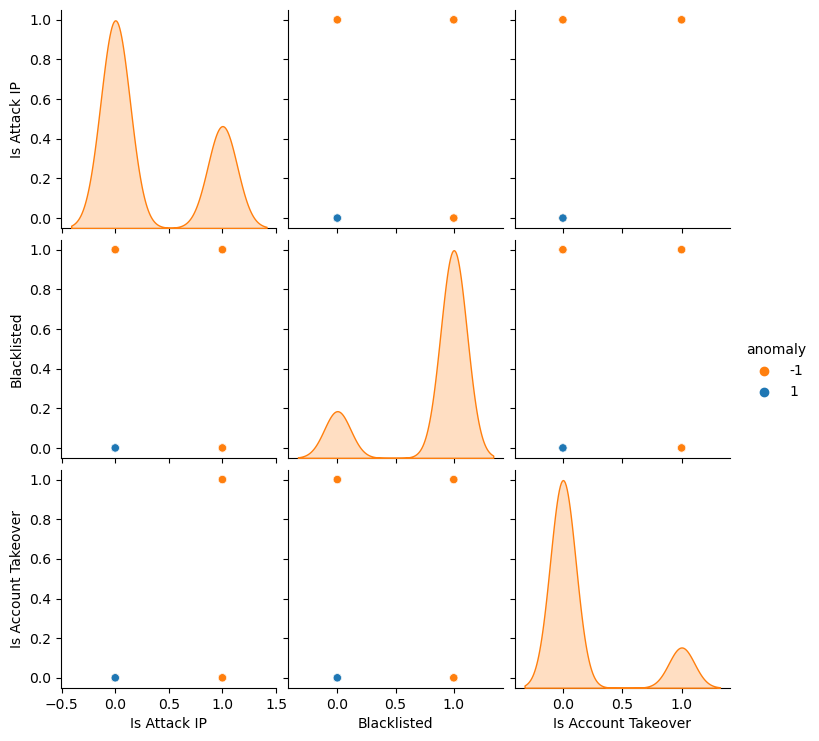

In [119]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28
Number of non anomalous values  972
Total Number of Values: 1000


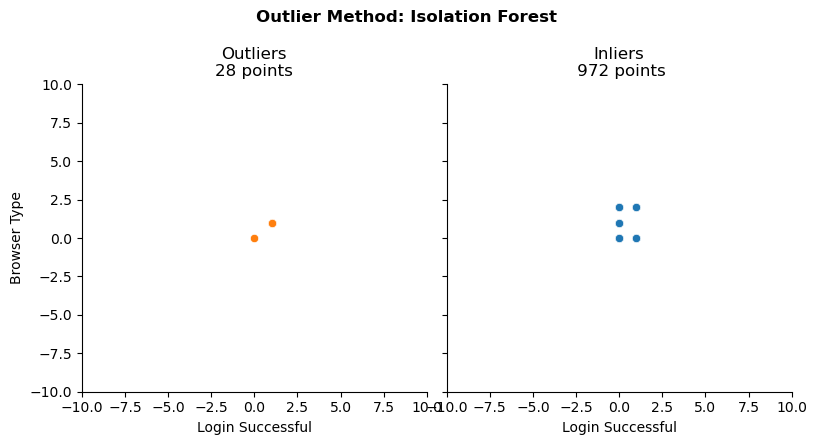

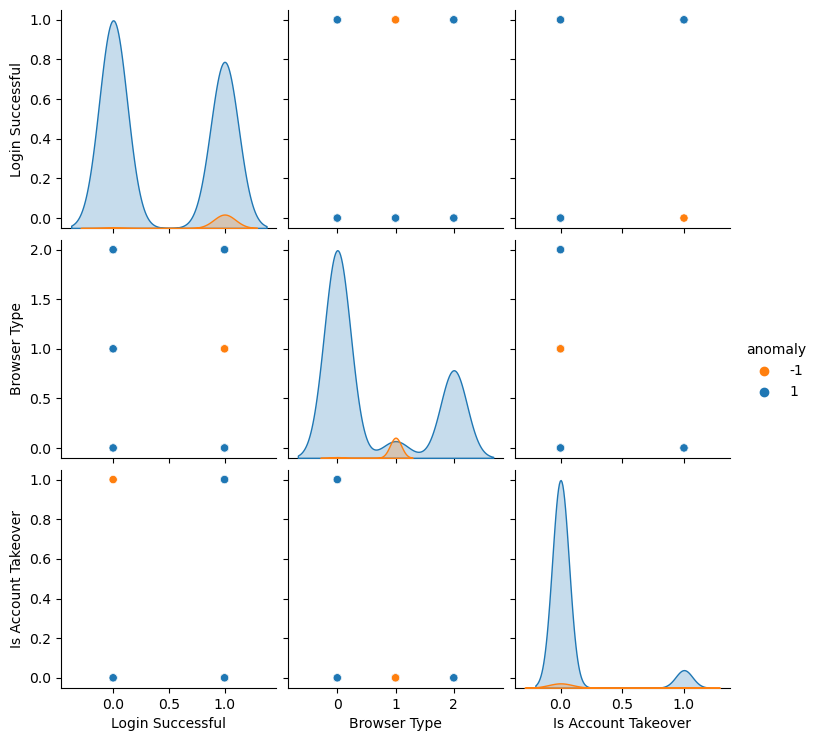

In [120]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 264
Number of non anomalous values  736
Total Number of Values: 1000


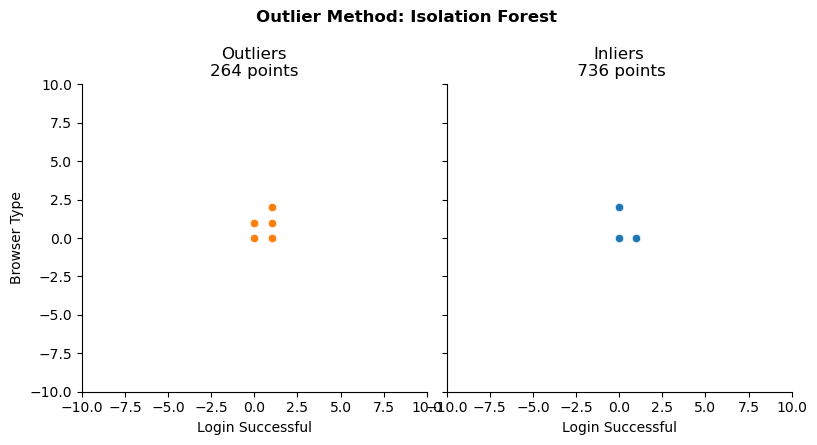

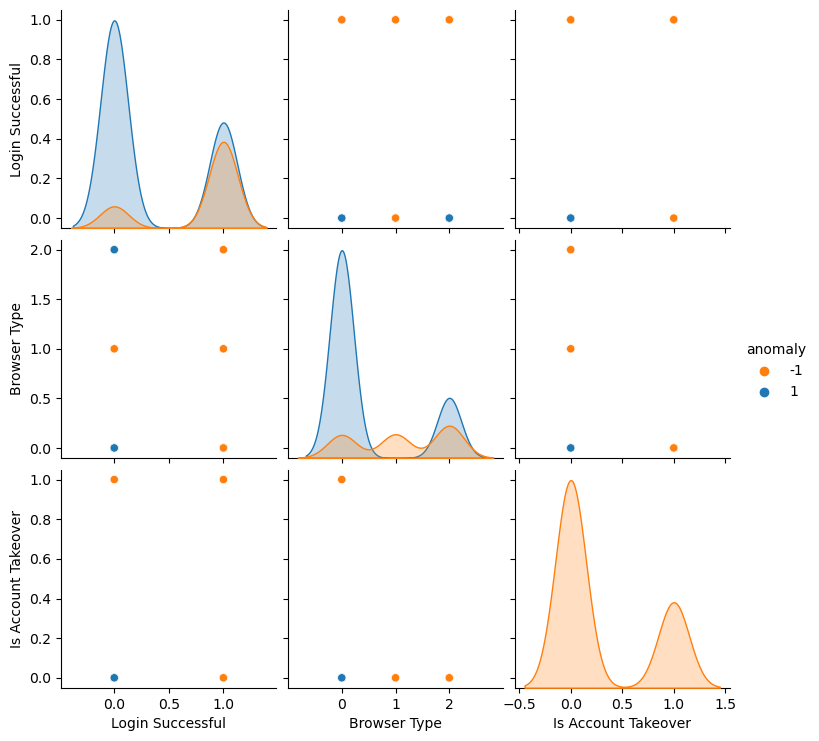

In [121]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 264
Number of non anomalous values  736
Total Number of Values: 1000


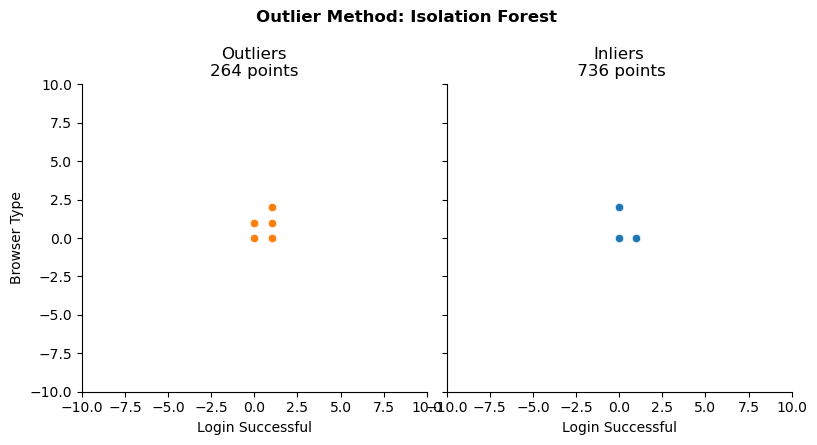

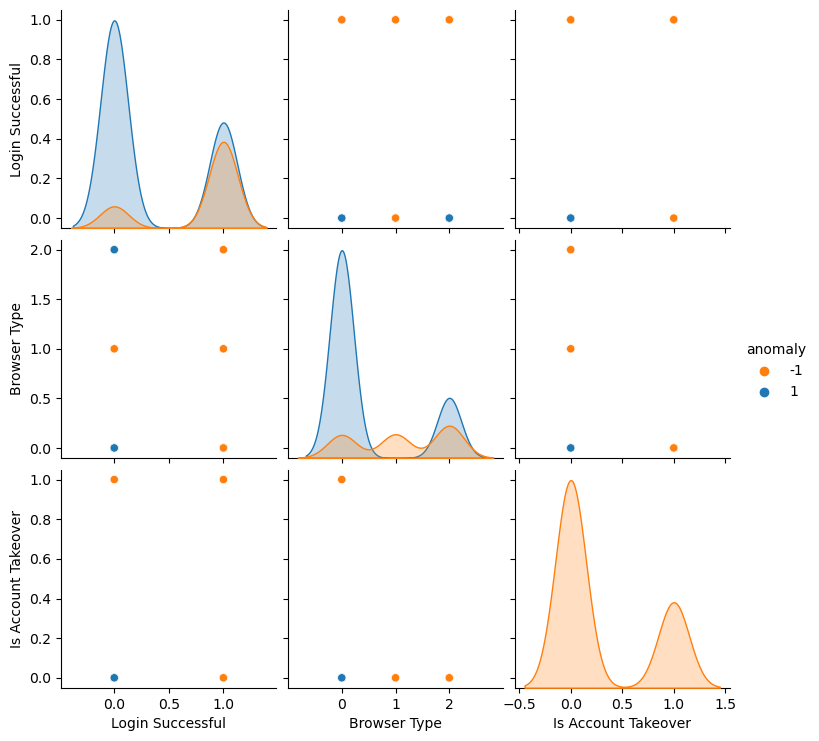

In [122]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 80
Number of non anomalous values  920
Total Number of Values: 1000


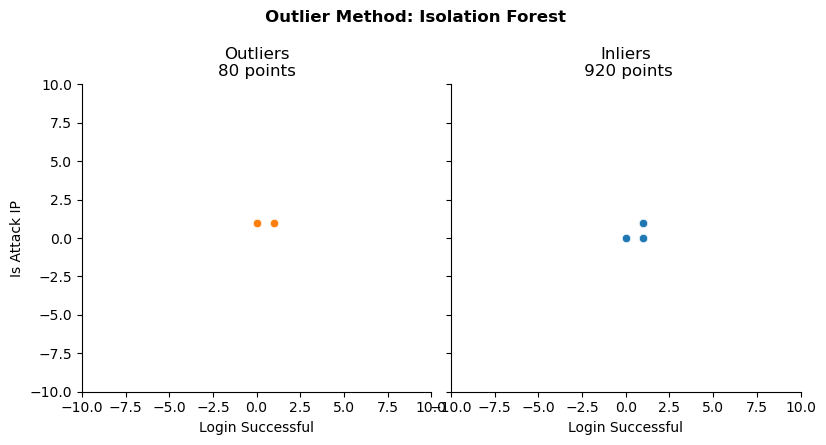

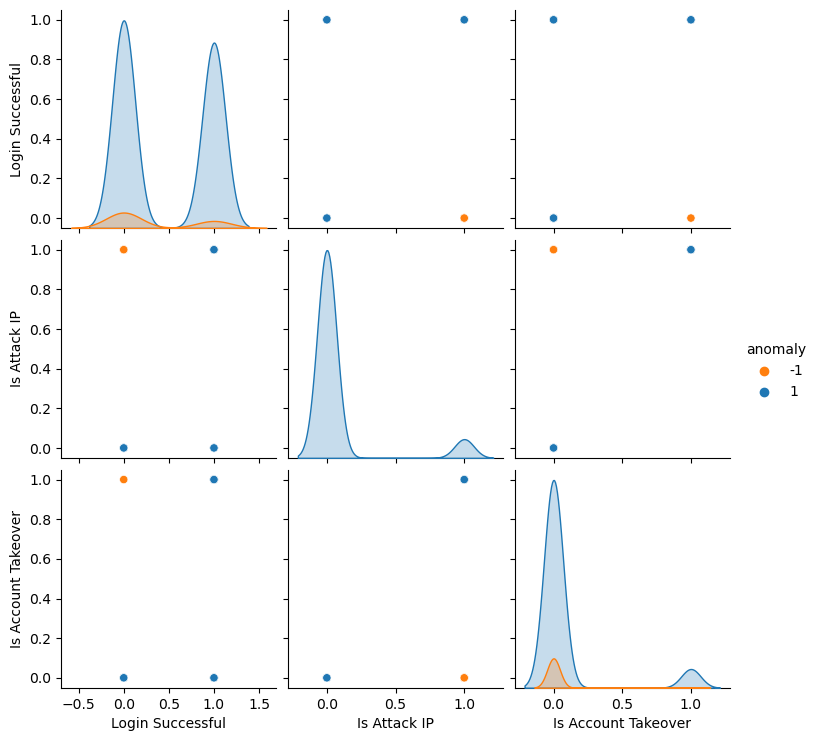

In [123]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


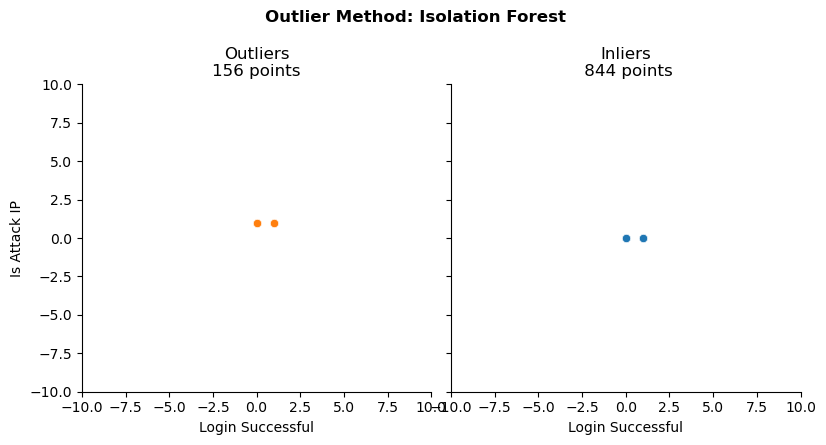

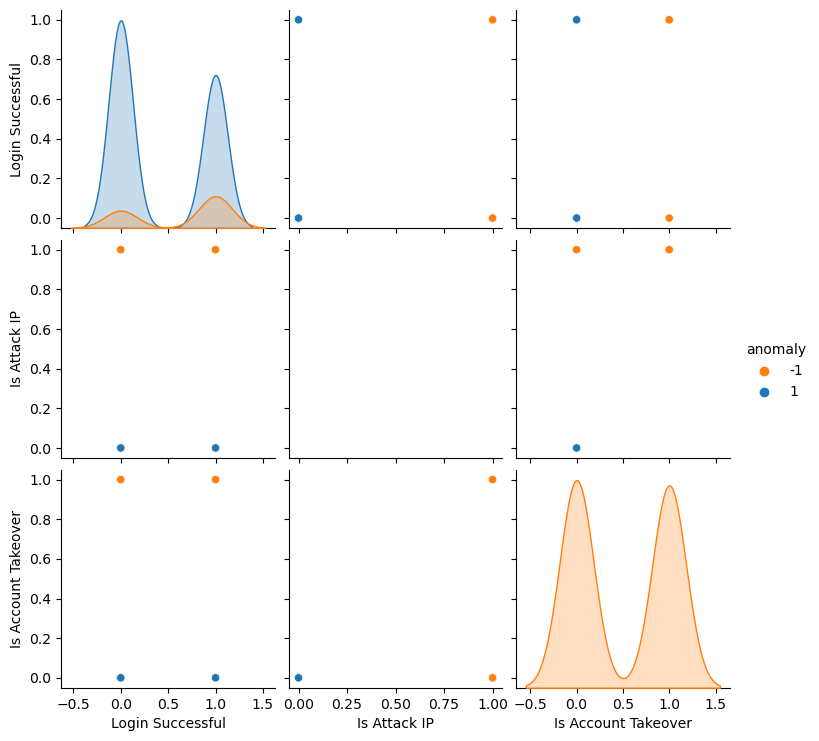

In [124]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


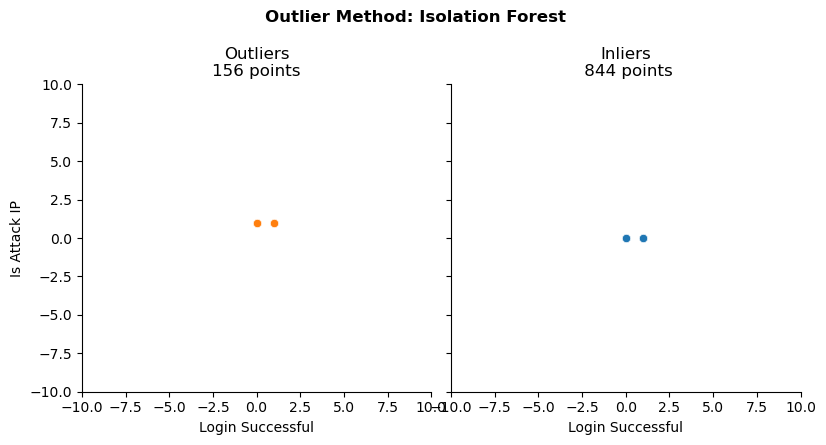

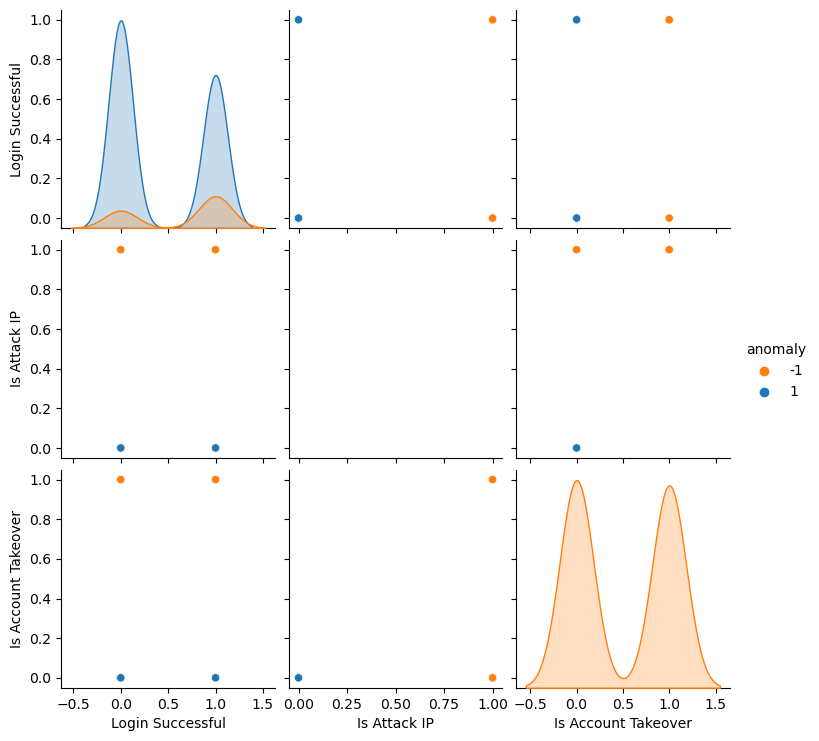

In [125]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

(77, 11) (923, 11)
(1000, 10)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 159
Accuracy Score :
0.841
Classification Report :
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       923
        True       0.09      0.12      0.10        77

    accuracy                           0.84      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.86      0.84      0.85      1000

Local Outlier Factor: 169
Accuracy Score :
0.831
Classification Report :
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       923
        True       0.04      0.05      0.05        77

    accuracy                           0.83      1000
   macro avg       0.48      0.47      0.48      1000
weighted avg       0.85      0.83      0.84      1000

Support Vector Machine: 603
Accuracy Score :
0.397
Classification Report :
              precision    recall  f1-score   support

       False       0.88      0.40      0.55       923
        True       0

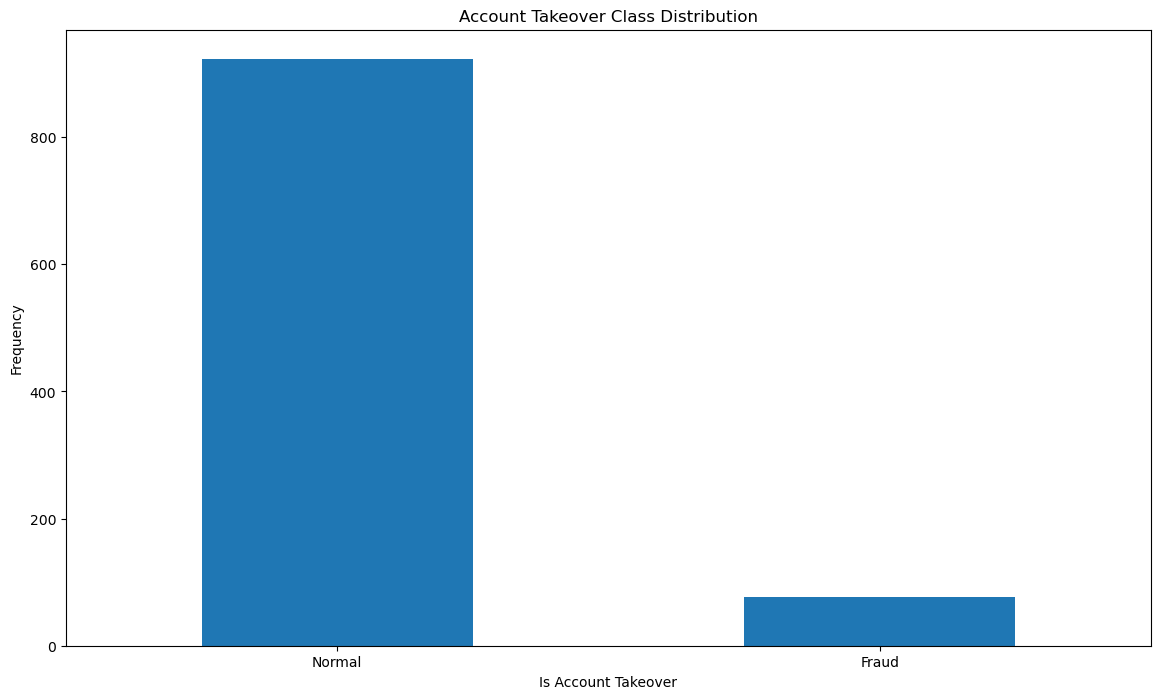

In [130]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding


In [131]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1956 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(1950)
memory usage: 1.9 MB


User ID     ASN  Login Successful  Is Attack IP  \
0  4685694623922316169   57963              True         False   
1 -1991898760516251890   41560              True          True   
2 -7221141651022757816   29695              True         False   
3 -4324475583306591935   29492             False         False   
4 -4324475583306591935  199536             False         False   

   Is Account Takeover  Blacklisted  cntr_AR  cntr_AT  cntr_AU  cntr_BD  ...  \
0                False        False        0        0        0        0  ...   
1                 True        False        0        0        0        0  ...   
2                False        False        0        0        0        0  ...   
3                False        False        0        0        0        0  ...   
4                False        False        0        0        0        0  ...   

   lgnt_2021-02-25 15:36:58.213  lgnt_2021-02-26 10:11:24.224  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-26 12:36:42.680  lgnt_2021-02-26 15:35:23.083  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-26 18:15:39.493  lgnt_2021-02-27 00:19:15.501  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-27 00:43:44.689  brw_C  brw_F  brw_O  
0                             0      0      0      1  
1                             0      1      0      0  
2                             0      1      0      0  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 1956 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1956 entries, User ID to Is Account Takeover
dtypes: bool(4), int64(2), uint8(1950)
memory usage: 1.9 MB
Accuracy: 99.39%
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       301
        True       0.97      0.97      0.97        29

    accuracy                           0.99       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.99      0.99      0.99       330

TN: 0, FP: 2, FN: 1, TP: 1


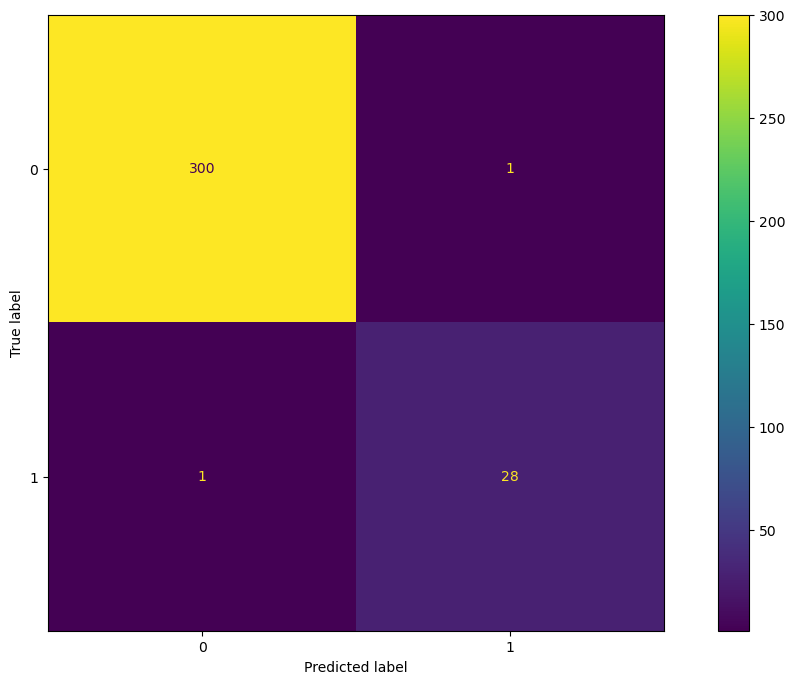

In [136]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 742 records for the majority class and 58 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       181
        True       0.10      1.00      0.17        19

    accuracy                           0.10       200
   macro avg       0.05      0.50      0.09       200
weighted avg       0.01      0.10      0.02       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       181
        True       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

[[  0 181]
 [  0  19]]


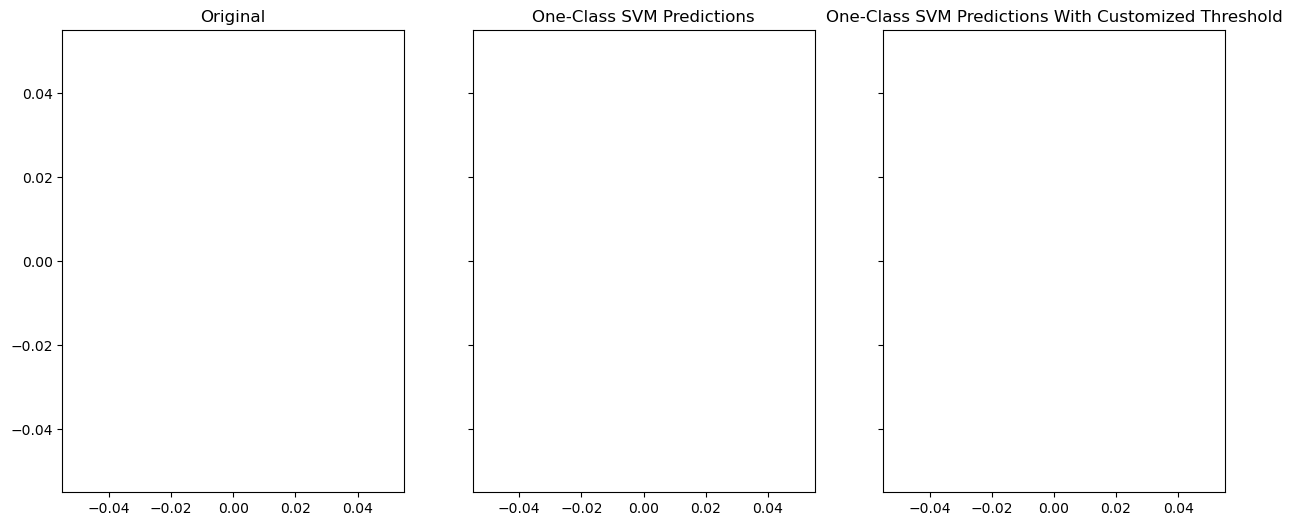

In [133]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 655 records for the majority class and 45 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       268
        True       0.11      1.00      0.19        32

    accuracy                           0.11       300
   macro avg       0.05      0.50      0.10       300
weighted avg       0.01      0.11      0.02       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       268
        True       0.00      0.00      0.00        32

    accuracy                           0.89       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.89      0.84       300

[[  0 268]
 [  0  32]]


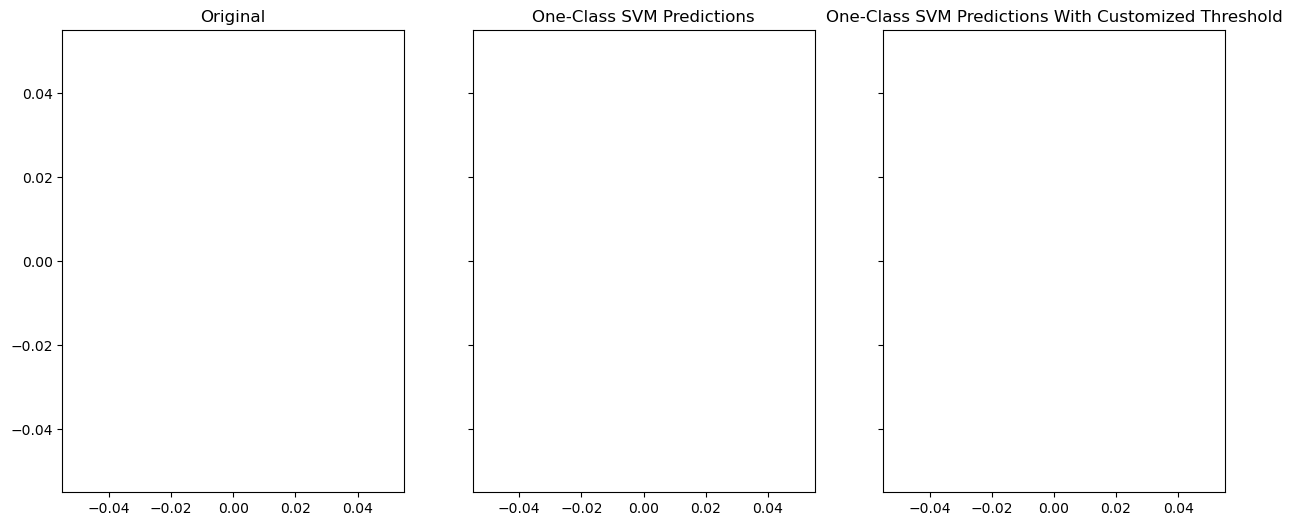

In [134]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 472 records for the majority class and 28 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.00      0.00       451
        True       0.10      1.00      0.18        49

    accuracy                           0.10       500
   macro avg       0.55      0.50      0.09       500
weighted avg       0.91      0.10      0.02       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       451
        True       0.00      0.00      0.00        49

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.86       500

[[  1 450]
 [  0  49]]


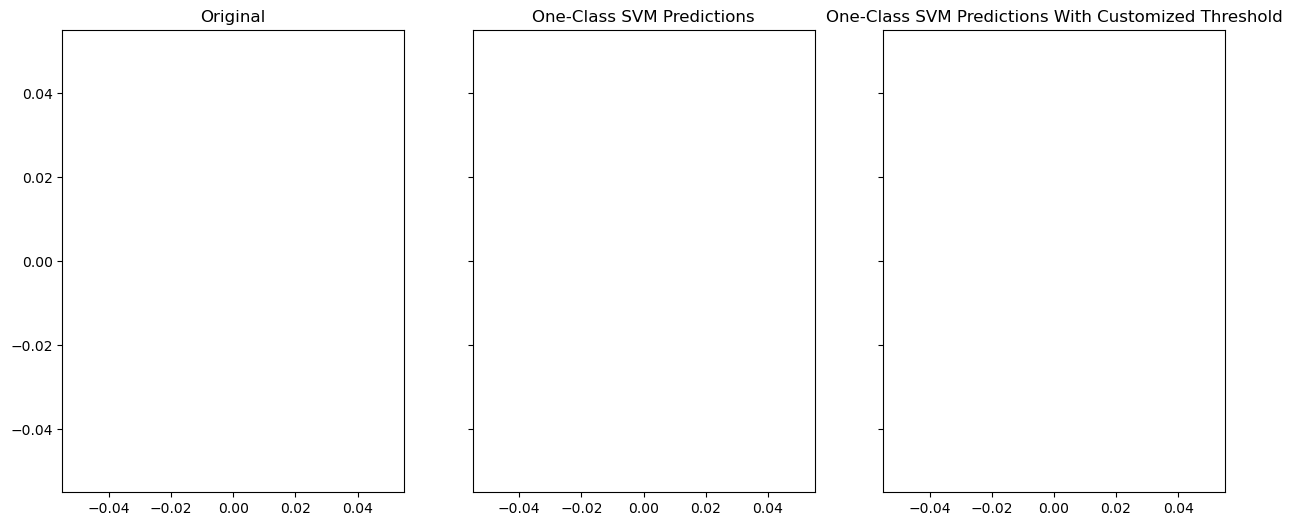

In [135]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 90
Number of non anomalous values  910
Total Number of Values: 1000


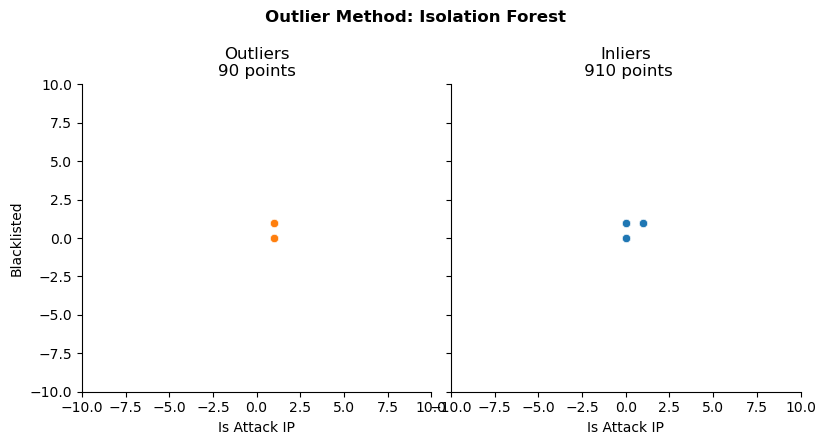

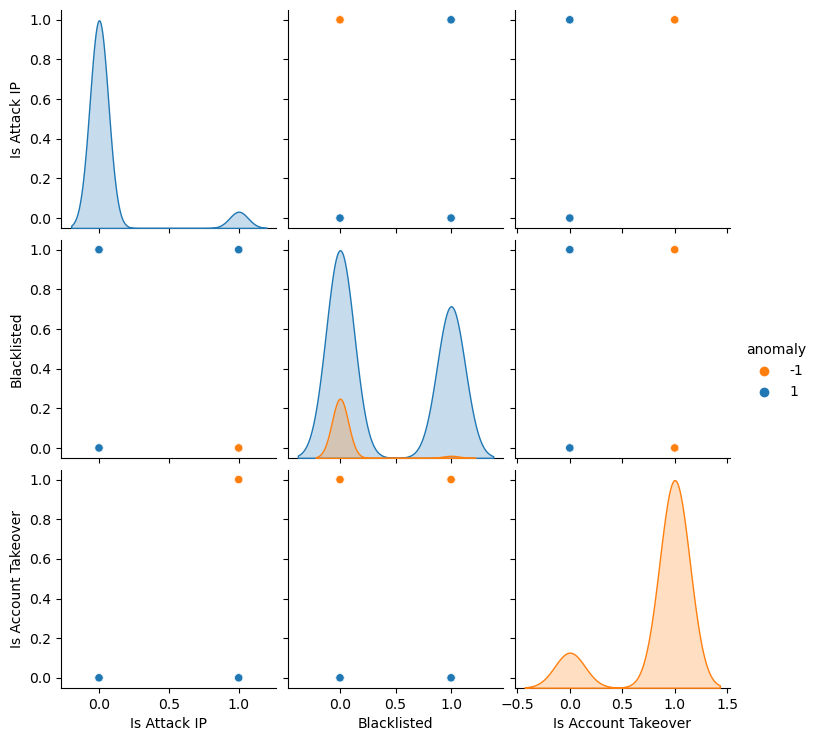

In [137]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


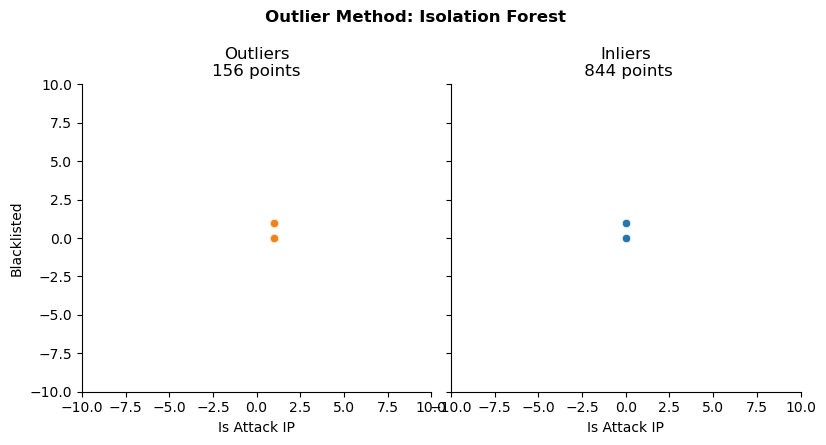

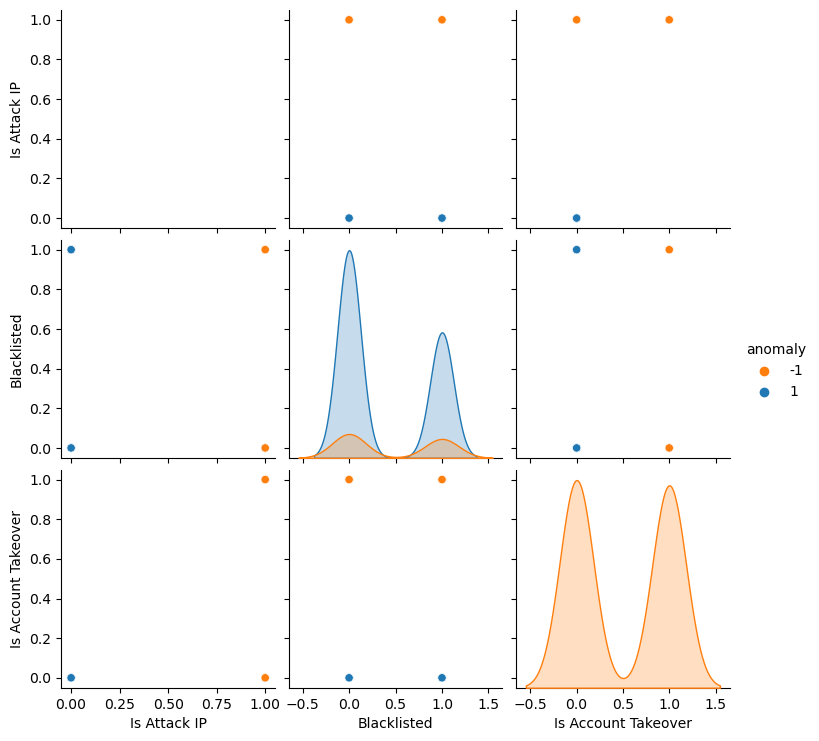

In [138]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 474
Number of non anomalous values  526
Total Number of Values: 1000


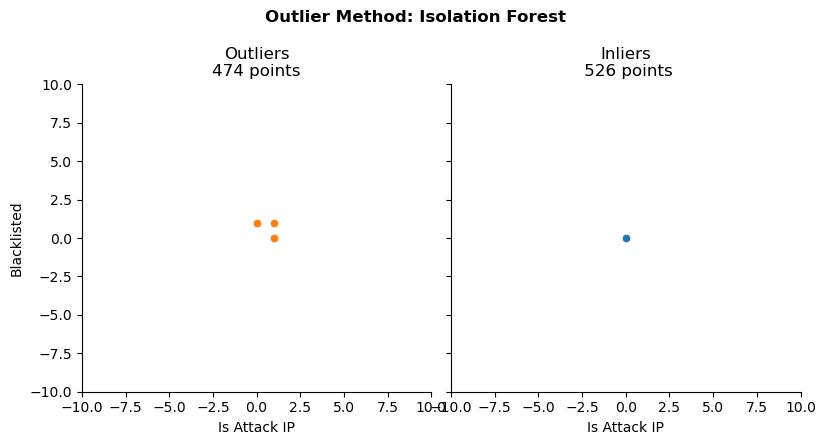

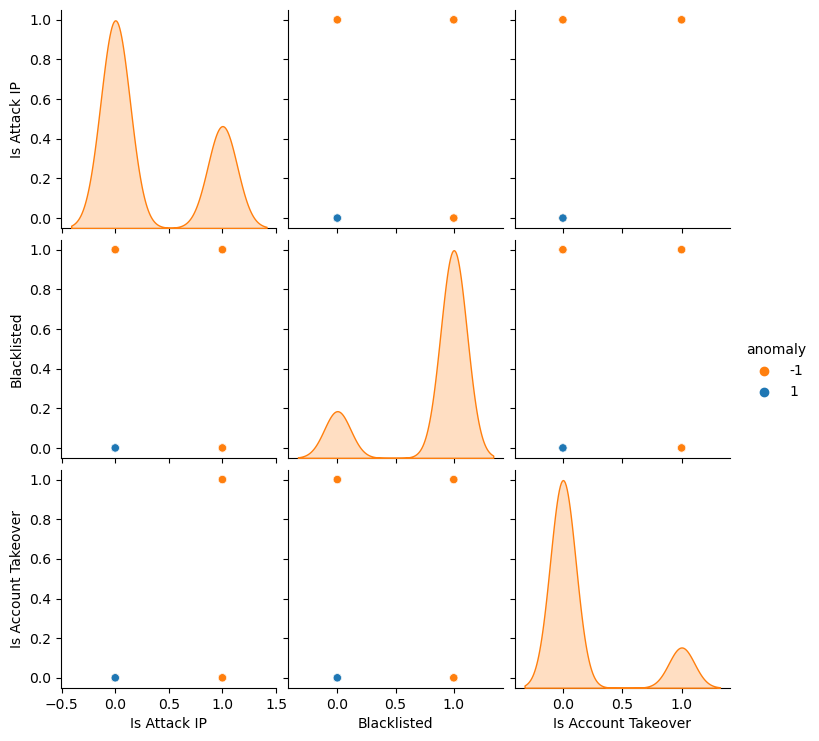

In [139]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 77
Number of non anomalous values  923
Total Number of Values: 1000


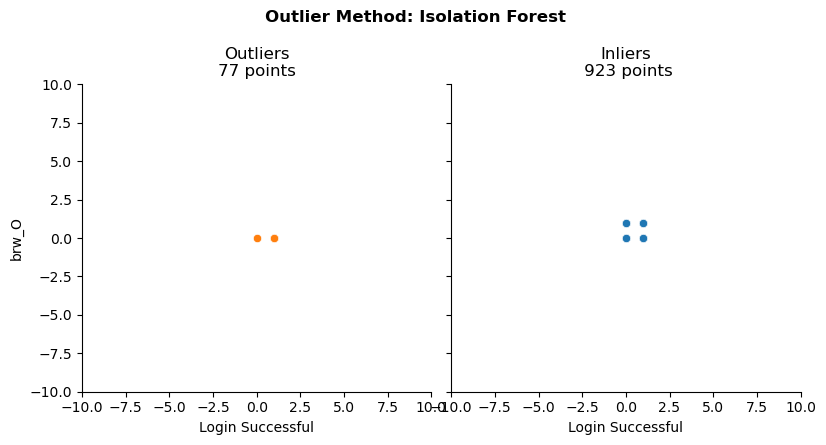

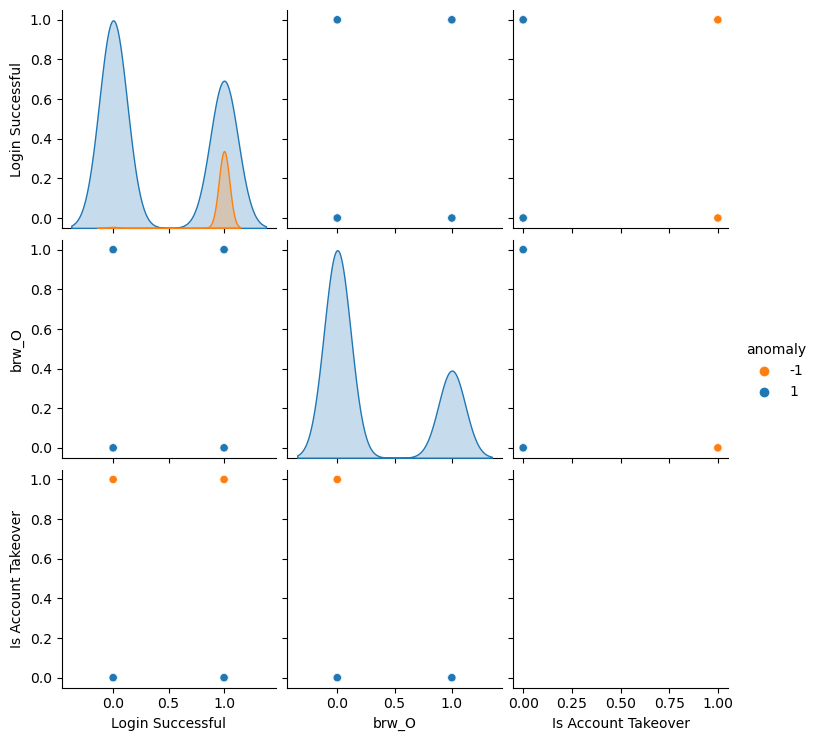

In [140]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 185
Number of non anomalous values  815
Total Number of Values: 1000


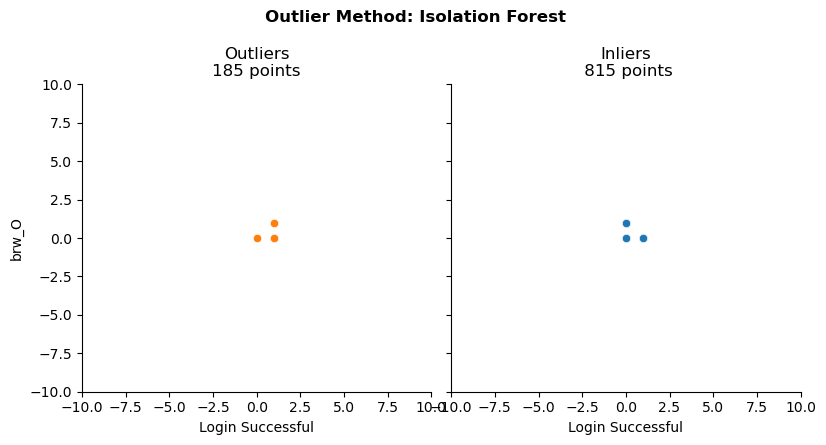

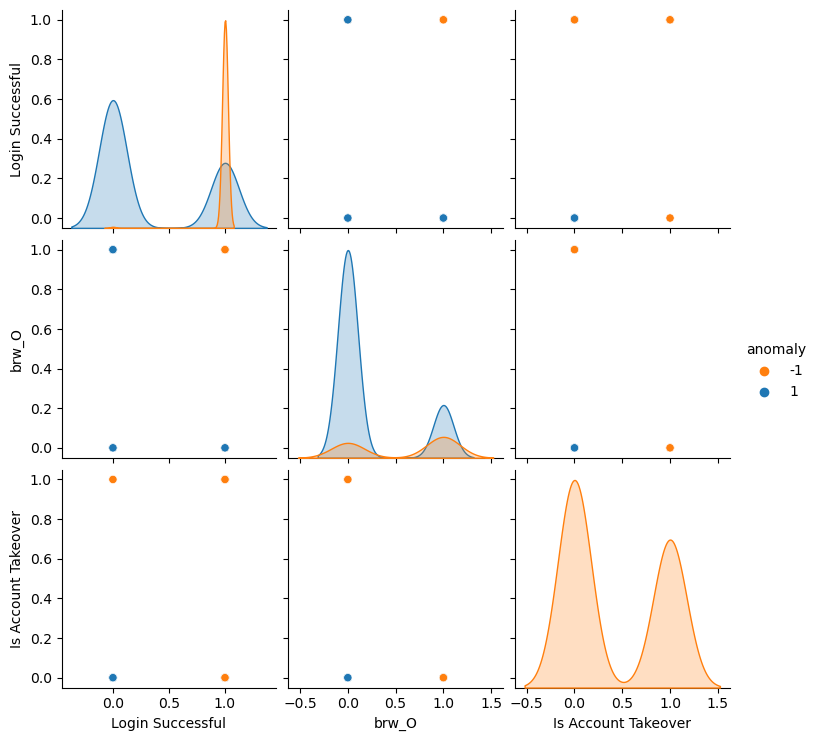

In [141]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 350
Number of non anomalous values  650
Total Number of Values: 1000


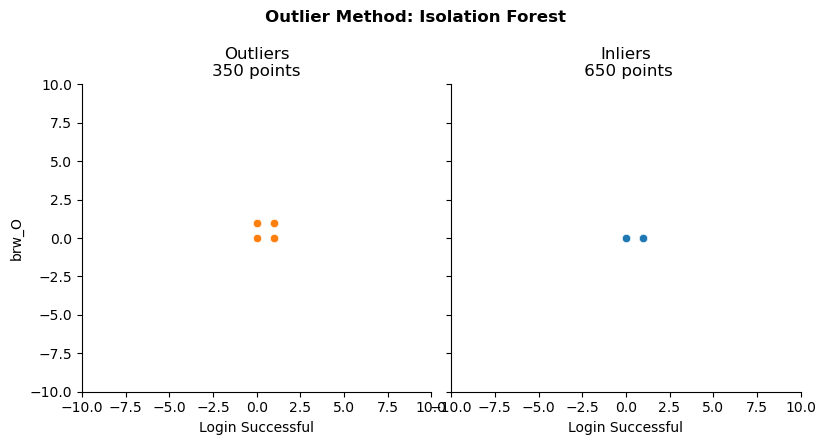

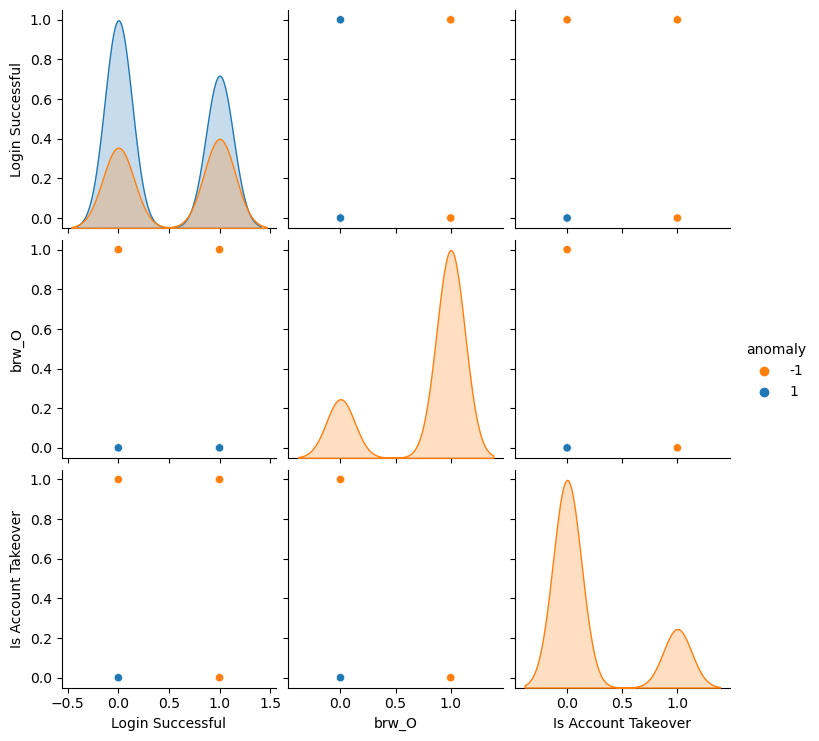

In [142]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 80
Number of non anomalous values  920
Total Number of Values: 1000


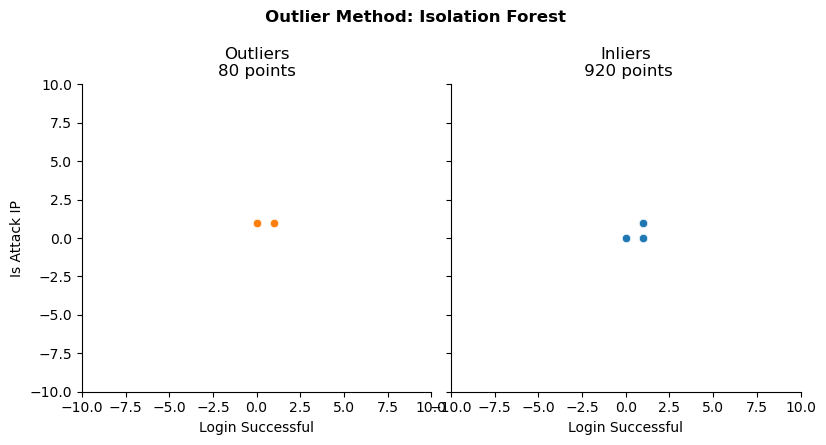

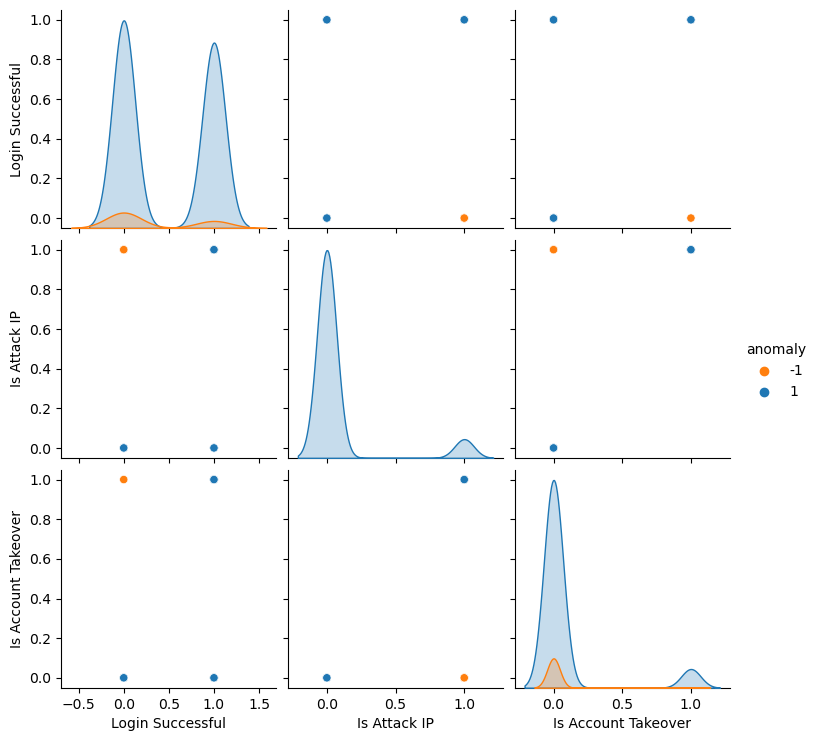

In [143]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


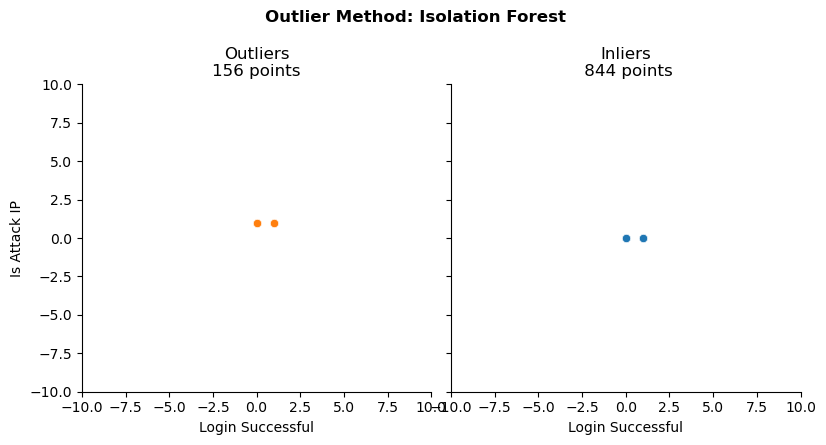

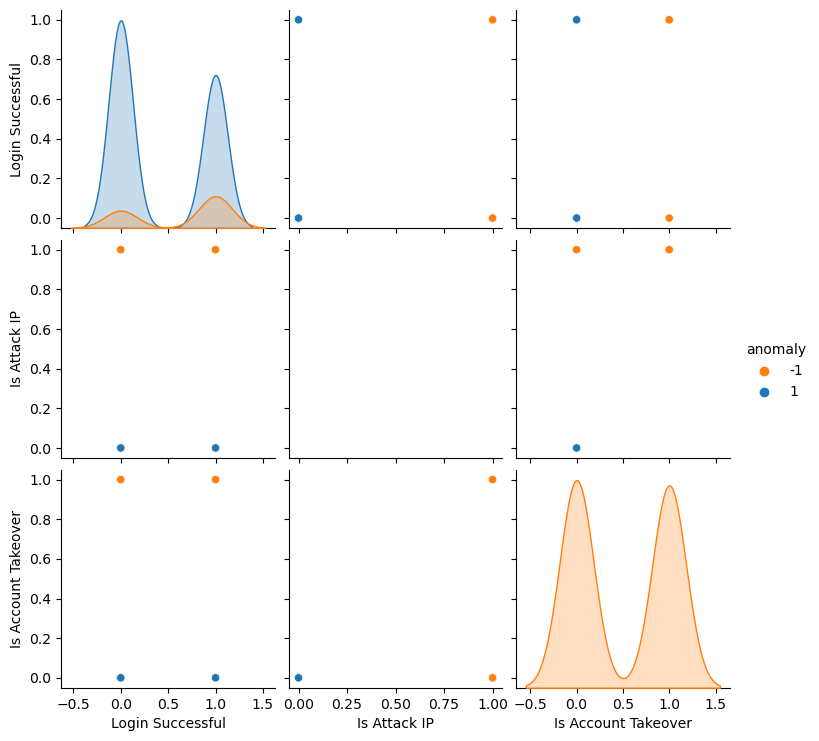

In [144]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


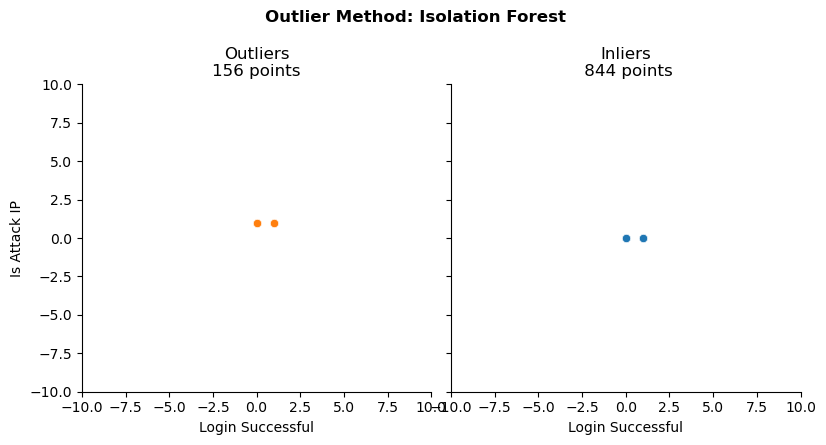

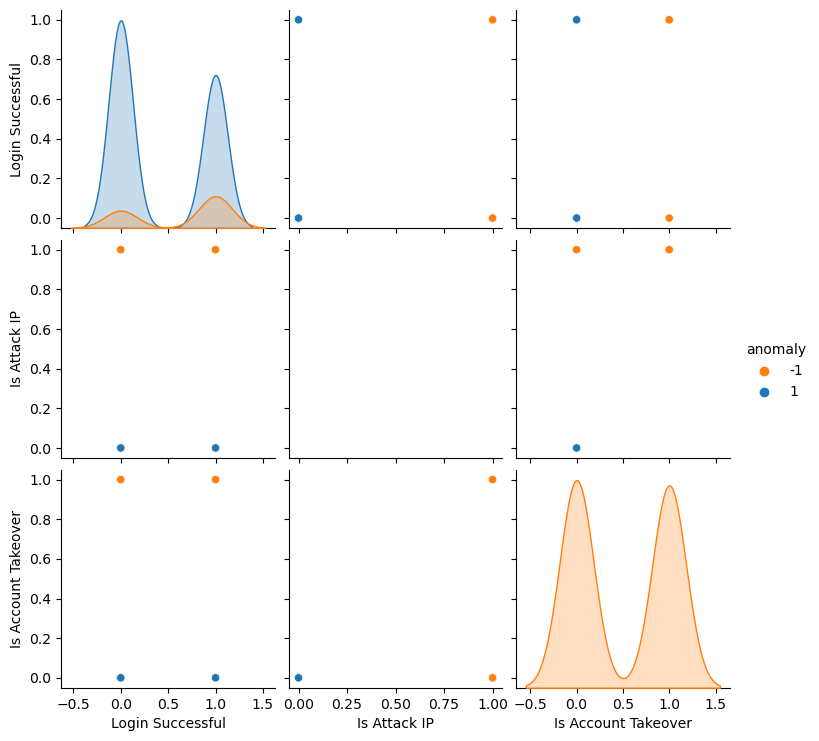

In [145]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 1956) (923, 1956)
(1000, 1955)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 159
Accuracy Score :
0.841
Classification Report :
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       923
        True       0.09      0.12      0.10        77

    accuracy                           0.84      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.86      0.84      0.85      1000

Local Outlier Factor: 147
Accuracy Score :
0.853
Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.91      0.92       923
        True       0.15      0.19      0.17        77

    accuracy                           0.85      1000
   macro avg       0.54      0.55      0.54      1000
weighted avg       0.87      0.85      0.86      1000

Support Vector Machine: 603
Accuracy Score :
0.397
Classification Report :
              precision    recall  f1-score   support

       False       0.88      0.40      0.55       923
        True       0

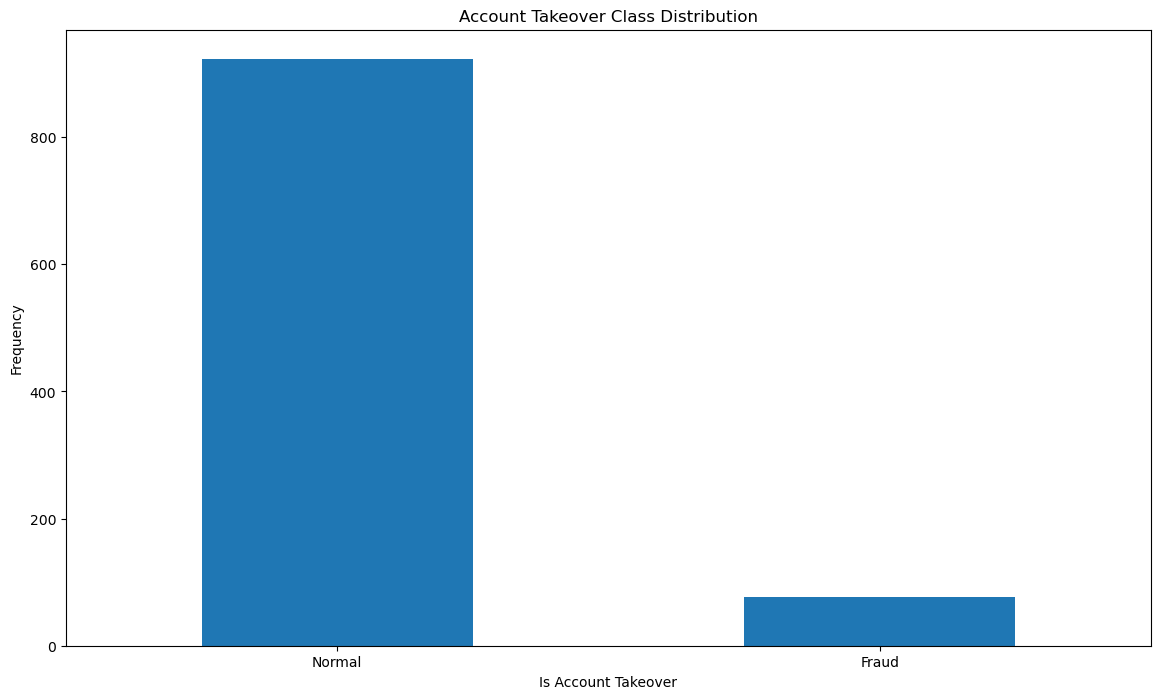

In [146]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

# New dataset with divide in ['Is Account Takeover'] == True
### 141/1000 ATO

In [147]:
import pandas as pd

takeover = pd.read_csv('divided-chunks/takeover141.csv')
restTakeover = safe

In [148]:
import numpy as np

takeover['Login Timestamp'] =  pd.to_datetime(takeover['Login Timestamp'], infer_datetime_format=True)
takeover.dropna(axis = 0, how = 'all', inplace = True)

takeover['IP Address'] = takeover['IP Address'].apply(lambda x: str(x))
takeover = takeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
takeover["Blacklisted"] = np.where(takeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_devices)

takeover["Browser Type"] = (np.where(takeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(takeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_browser)

takeover.drop("OS Name and Version", inplace=True, axis=1)
takeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    takeover[col] = takeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    takeover[col] = takeover[col].astype('bool')

In [149]:
takeover = takeover.sample(frac=1).reset_index(drop=True)
safe = safe.sample(frac=1).reset_index(drop=True)

df = pd.concat([takeover, safe.head(859)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

d1 = df.copy()
               
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      1000 non-null   category
 1   User ID              1000 non-null   int64   
 2   IP Address           1000 non-null   category
 3   Country              1000 non-null   category
 4   ASN                  1000 non-null   int64   
 5   Device Type          1000 non-null   category
 6   Login Successful     1000 non-null   bool    
 7   Is Attack IP         1000 non-null   bool    
 8   Is Account Takeover  1000 non-null   bool    
 9   Blacklisted          1000 non-null   bool    
 10  Browser Type         1000 non-null   category
dtypes: bool(4), category(5), int64(2)
memory usage: 107.6 KB


# Experimental feature XGBoost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      1000 non-null   category
 1   User ID              1000 non-null   int64   
 2   IP Address           1000 non-null   category
 3   Country              1000 non-null   category
 4   ASN                  1000 non-null   int64   
 5   Device Type          1000 non-null   category
 6   Login Successful     1000 non-null   bool    
 7   Is Attack IP         1000 non-null   bool    
 8   Blacklisted          1000 non-null   bool    
 9   Browser Type         1000 non-null   category
 10  Is Account Takeover  1000 non-null   bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 107.6 KB
Feature importances:
[0.         0.01772542 0.03462604 0.70550615 0.00749496 0.09745706
 0.07308619 0.0641042  0.         0.        ]


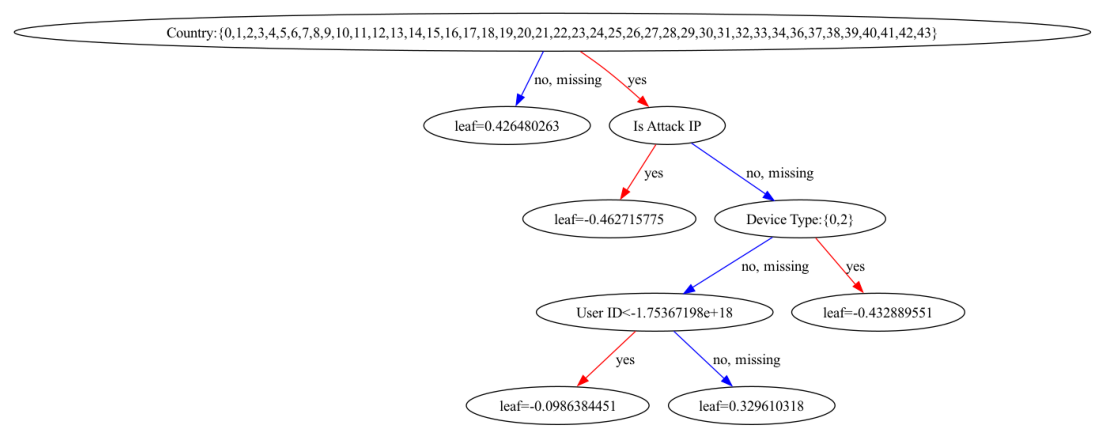

In [150]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

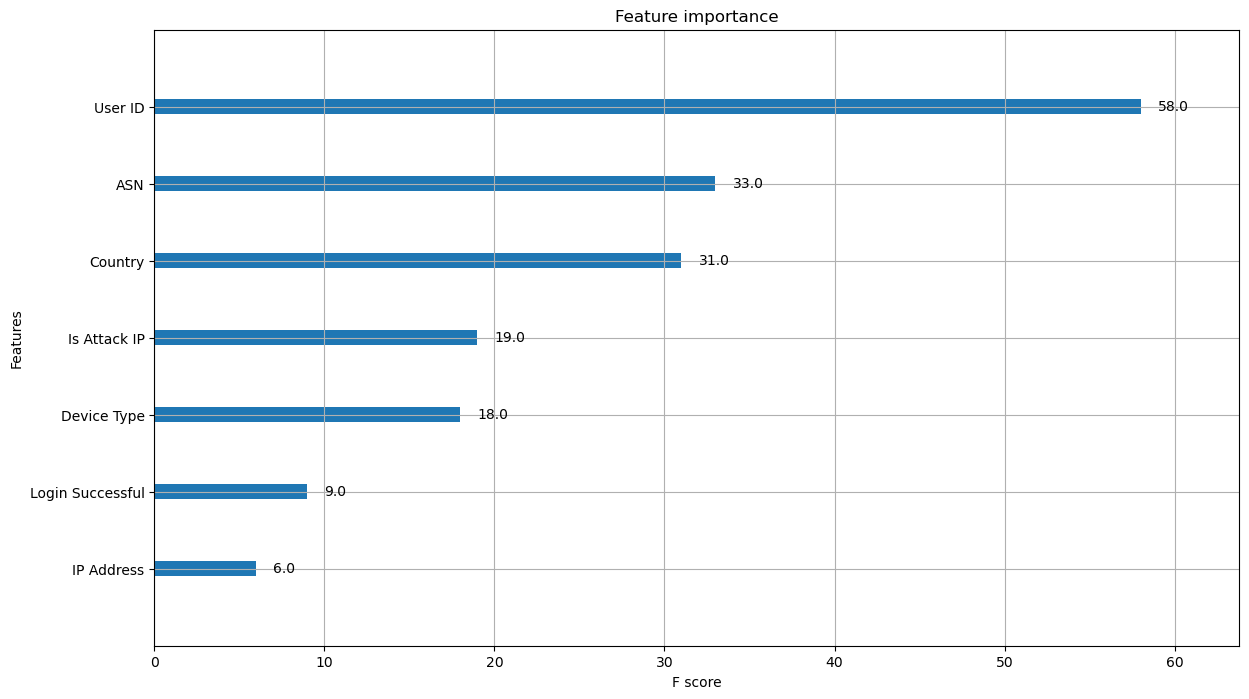

In [151]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [152]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      1000 non-null   int16
 1   User ID              1000 non-null   int64
 2   IP Address           1000 non-null   int16
 3   Country              1000 non-null   int8 
 4   ASN                  1000 non-null   int64
 5   Device Type          1000 non-null   int8 
 6   Login Successful     1000 non-null   bool 
 7   Is Attack IP         1000 non-null   bool 
 8   Is Account Takeover  1000 non-null   bool 
 9   Blacklisted          1000 non-null   bool 
 10  Browser Type         1000 non-null   int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 26.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Login Timestamp   1000 non-null   int16
 1   User ID           1000 non-null   int64
 2   IP Address        1000 non-null   int16
 3   Country           1000 non-null   int8 
 4   ASN               1000 non-null   int64
 5   Device Type       1000 non-null   int8 
 6   Login Successful  1000 non-null   bool 
 7   Is Attack IP      1000 non-null   bool 
 8   Blacklisted       1000 non-null   bool 
 9   Browser Type      1000 non-null   int8 
dtypes: bool(3), int16(2), int64(2), int8(3)
memory usage: 25.5 KB
Accuracy: 98.79%
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       301
        True       0.93      0.93      0.93        29

    accuracy                           0.99       330
   macro avg       0.96      0.96      0.96       33

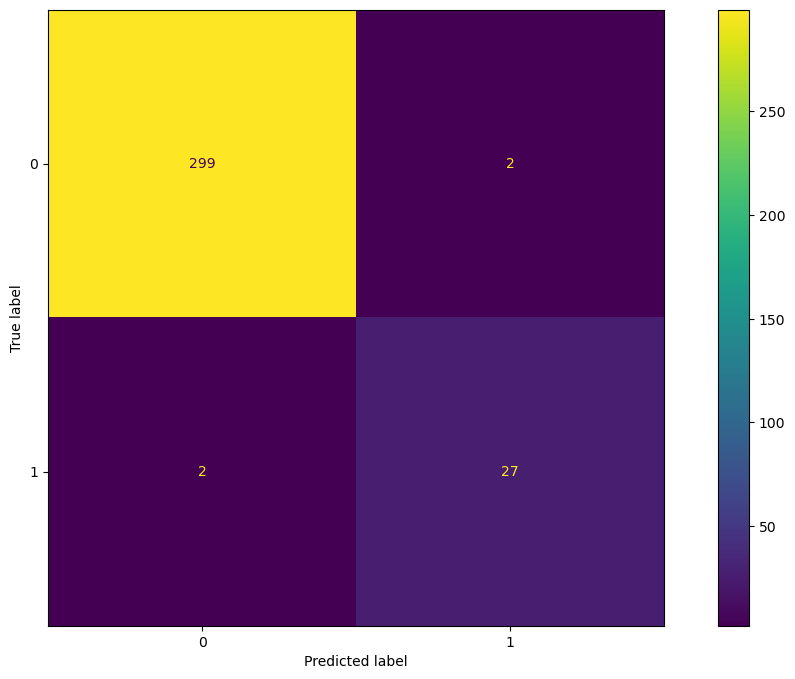

In [153]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 742 records for the majority class and 58 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       181
        True       0.10      1.00      0.17        19

    accuracy                           0.10       200
   macro avg       0.05      0.50      0.09       200
weighted avg       0.01      0.10      0.02       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       181
        True       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

[[  0 181]
 [  0  19]]


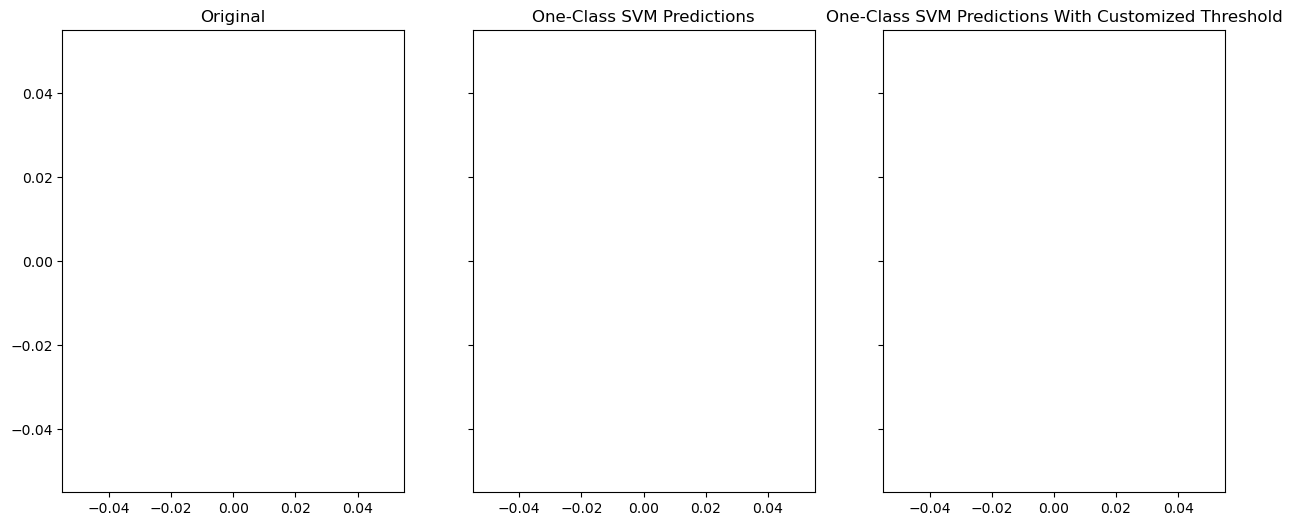

In [154]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 655 records for the majority class and 45 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       268
        True       0.11      1.00      0.19        32

    accuracy                           0.11       300
   macro avg       0.05      0.50      0.10       300
weighted avg       0.01      0.11      0.02       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       268
        True       0.00      0.00      0.00        32

    accuracy                           0.89       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.89      0.84       300

[[  0 268]
 [  0  32]]


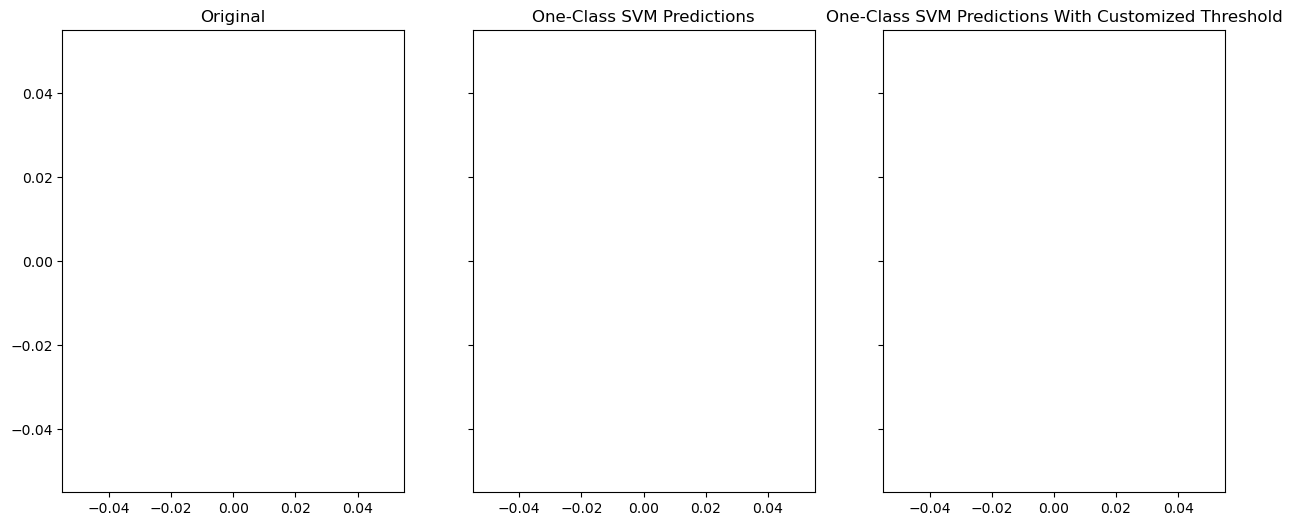

In [155]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 472 records for the majority class and 28 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       451
        True       0.10      1.00      0.18        49

    accuracy                           0.10       500
   macro avg       0.05      0.50      0.09       500
weighted avg       0.01      0.10      0.02       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       451
        True       0.00      0.00      0.00        49

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.86       500

[[  0 451]
 [  0  49]]


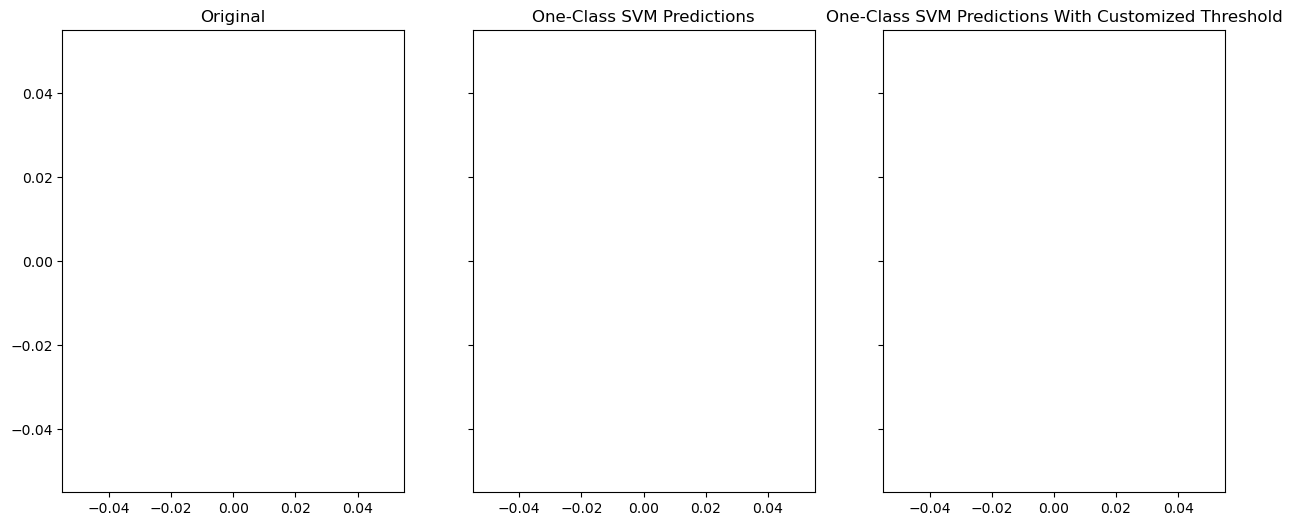

In [156]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 90
Number of non anomalous values  910
Total Number of Values: 1000


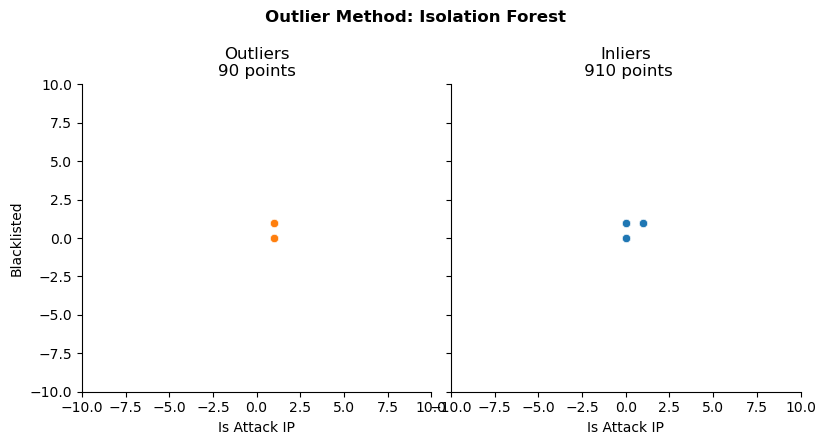

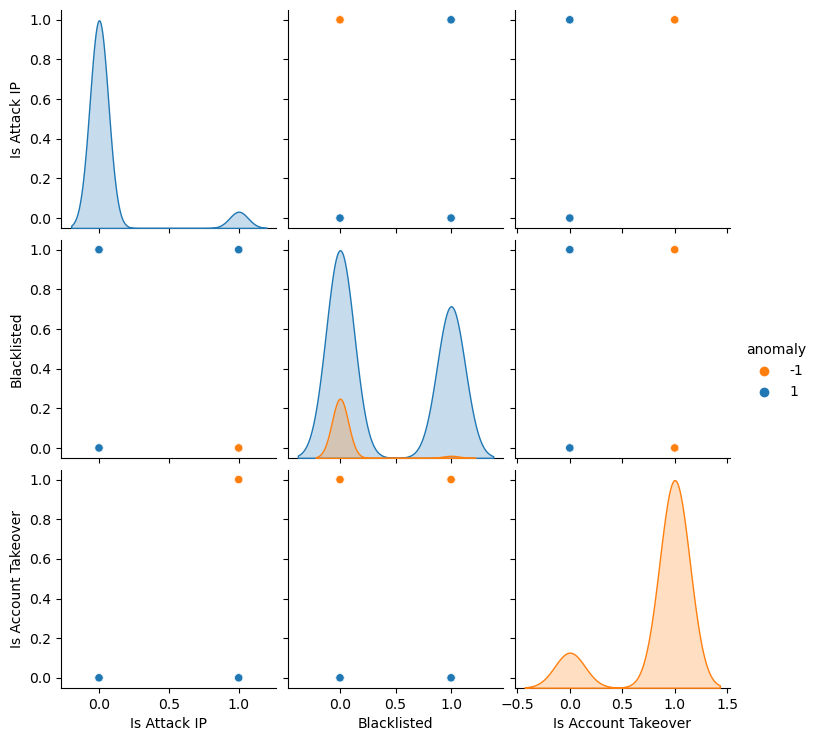

In [157]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


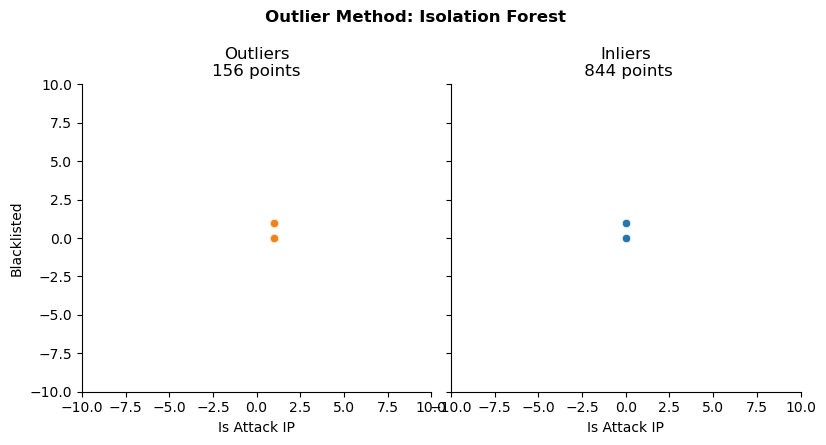

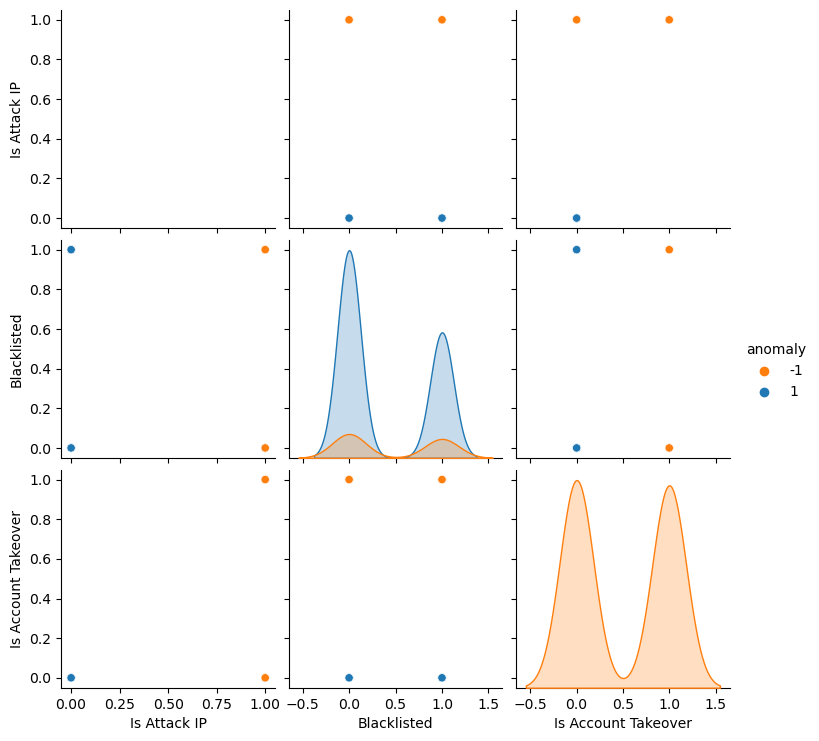

In [158]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 474
Number of non anomalous values  526
Total Number of Values: 1000


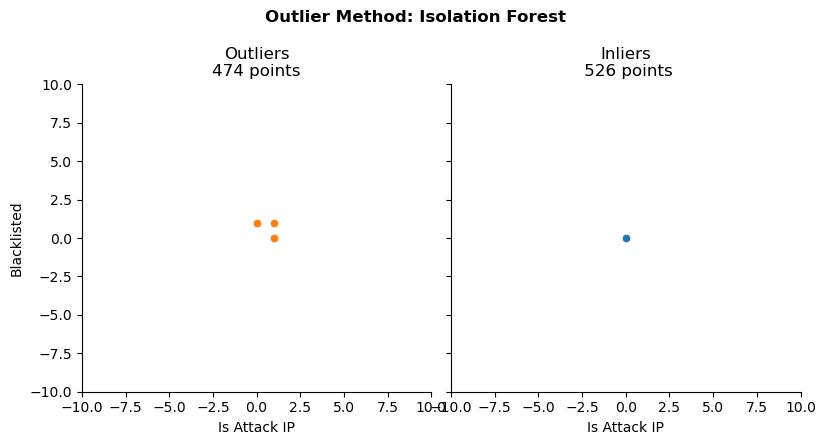

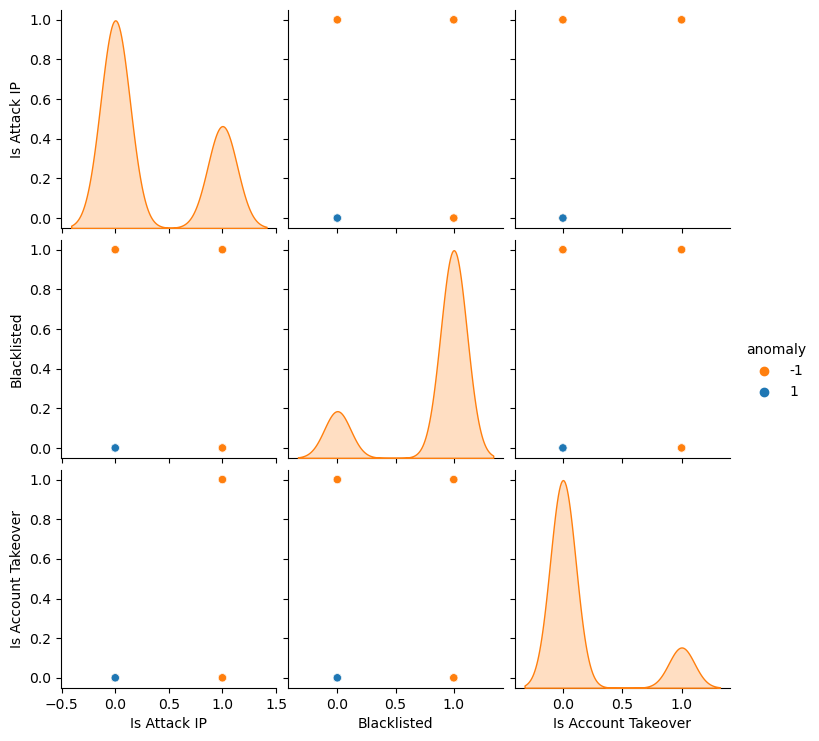

In [159]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28
Number of non anomalous values  972
Total Number of Values: 1000


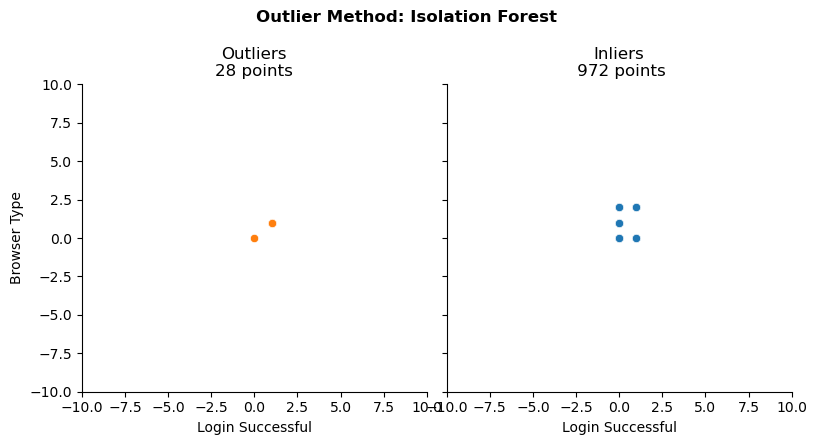

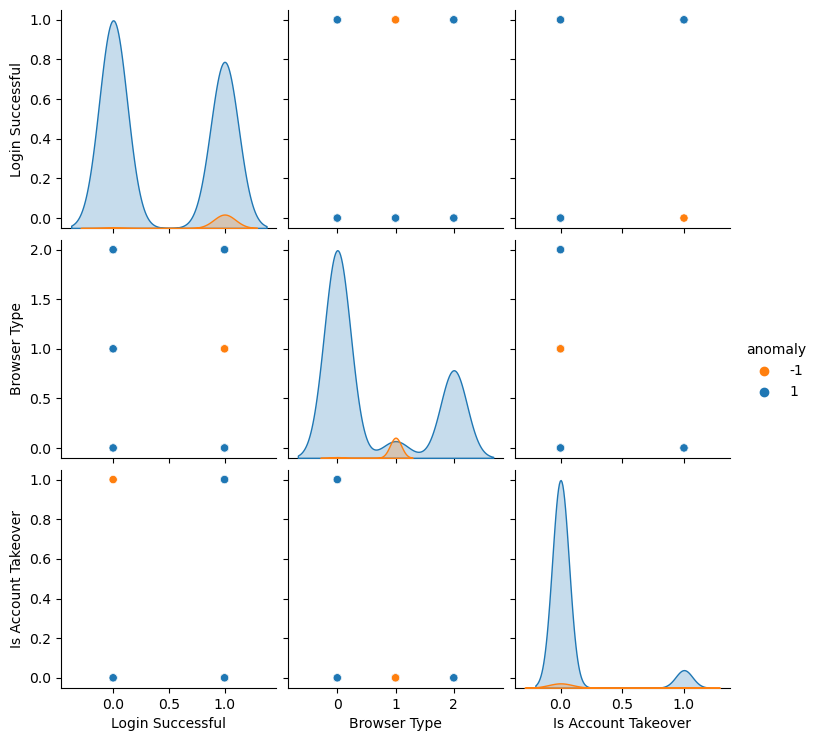

In [160]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 264
Number of non anomalous values  736
Total Number of Values: 1000


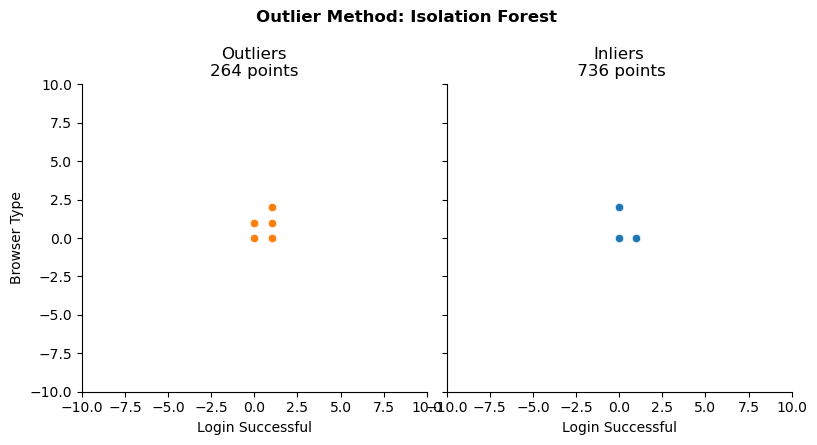

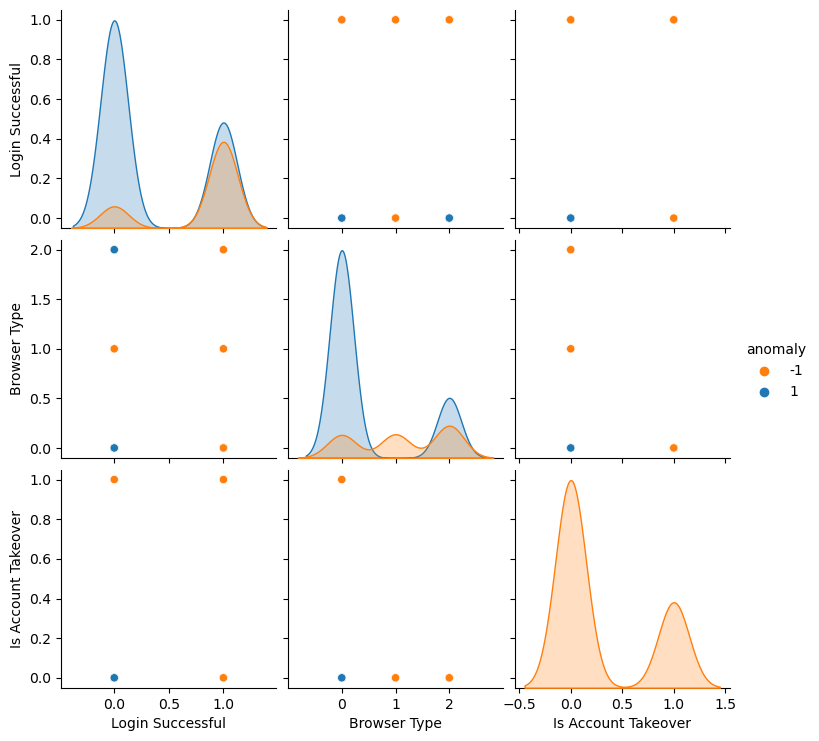

In [161]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 429
Number of non anomalous values  571
Total Number of Values: 1000


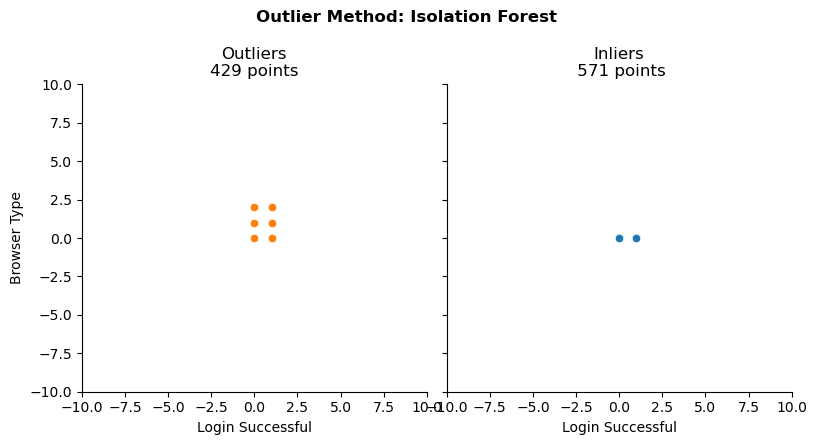

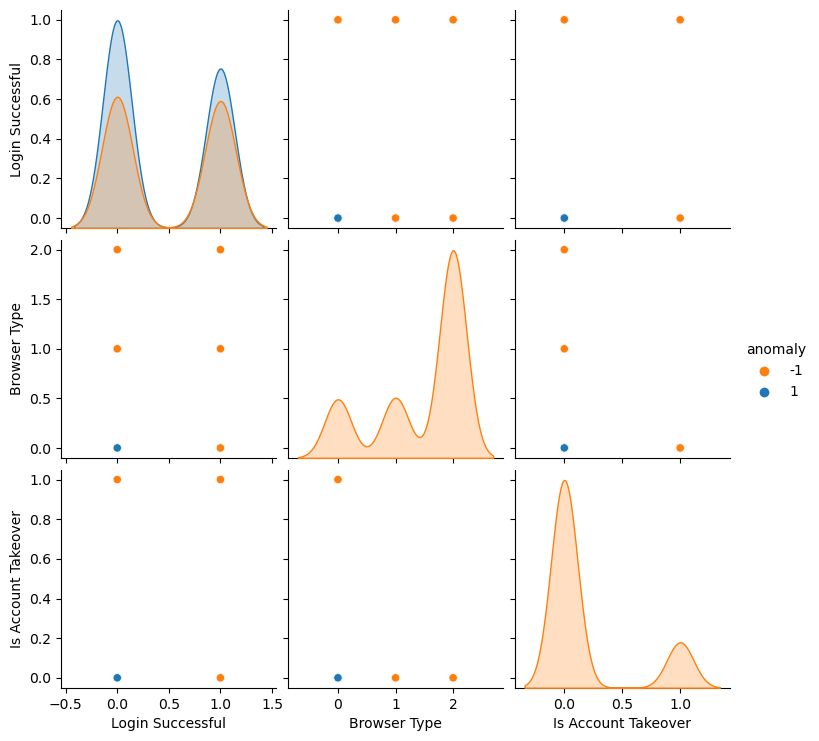

In [162]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 80
Number of non anomalous values  920
Total Number of Values: 1000


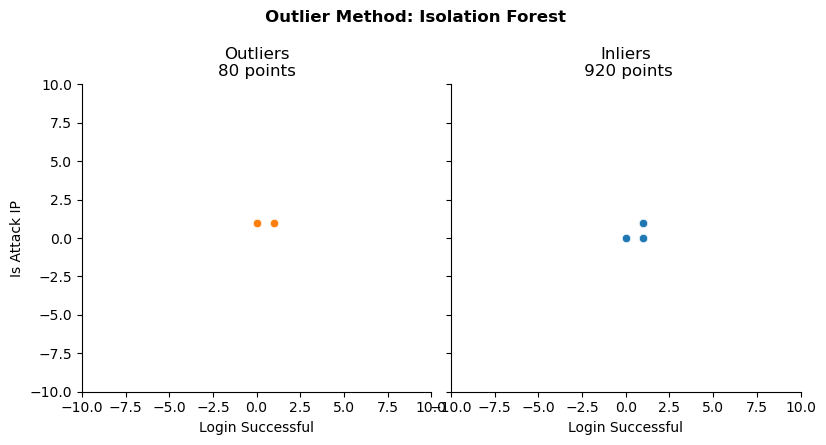

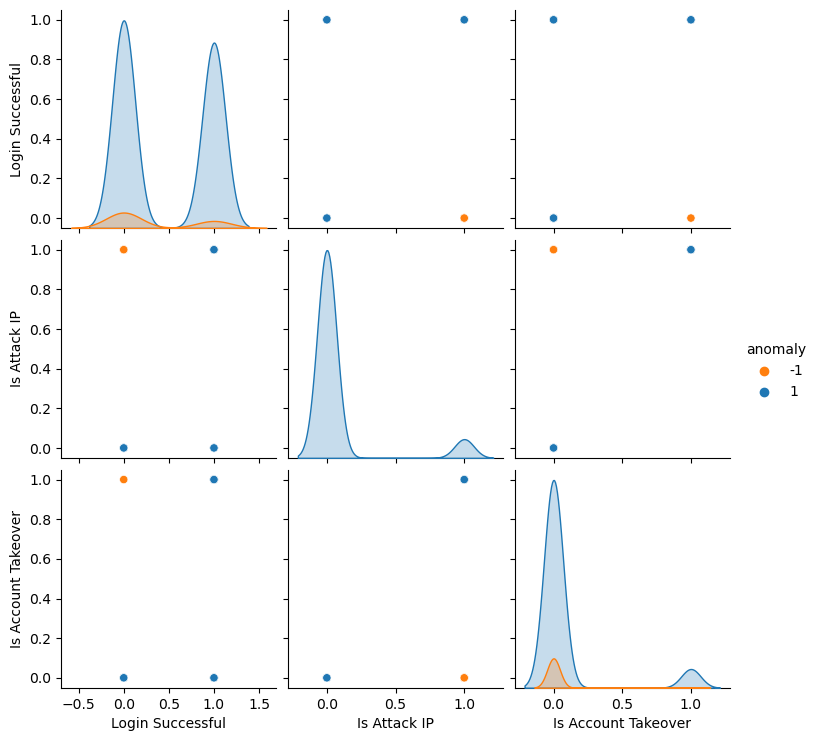

In [163]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


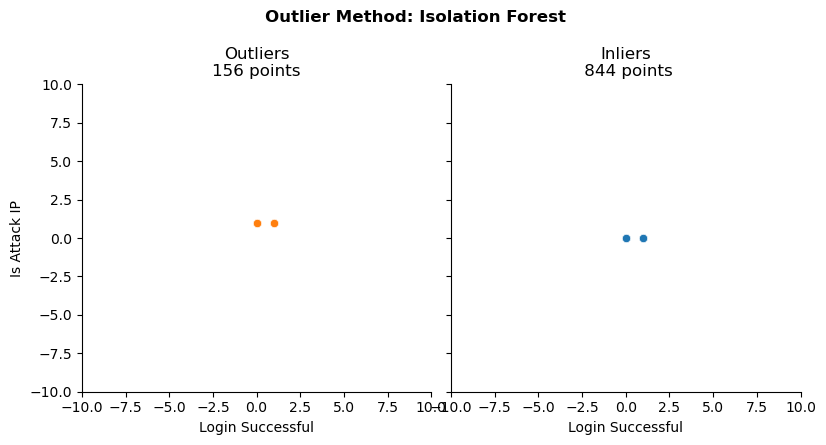

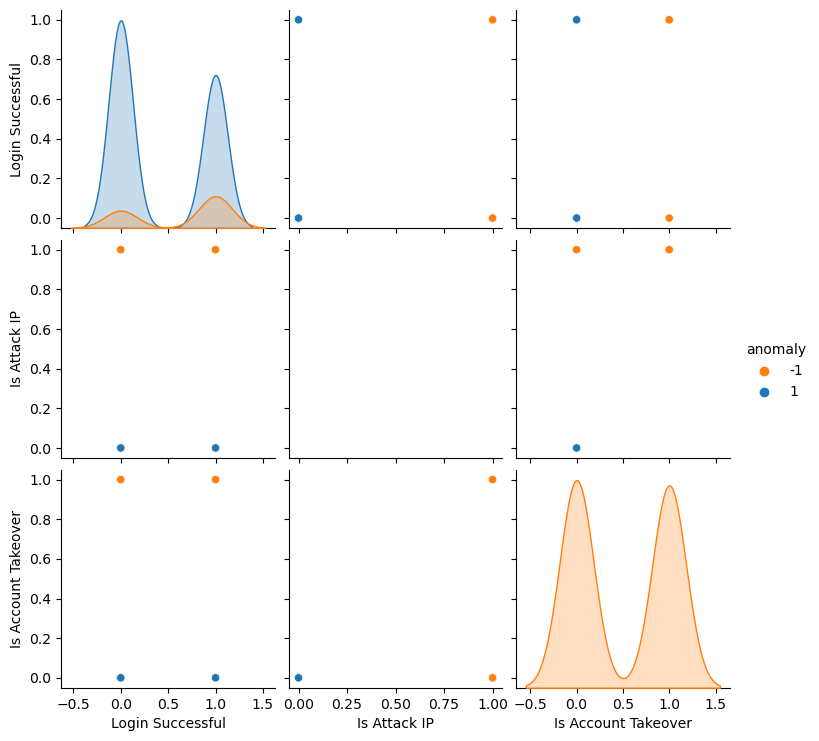

In [164]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


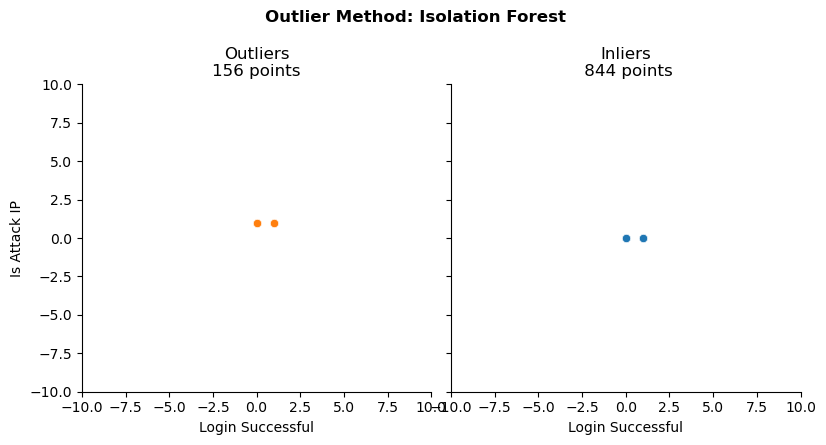

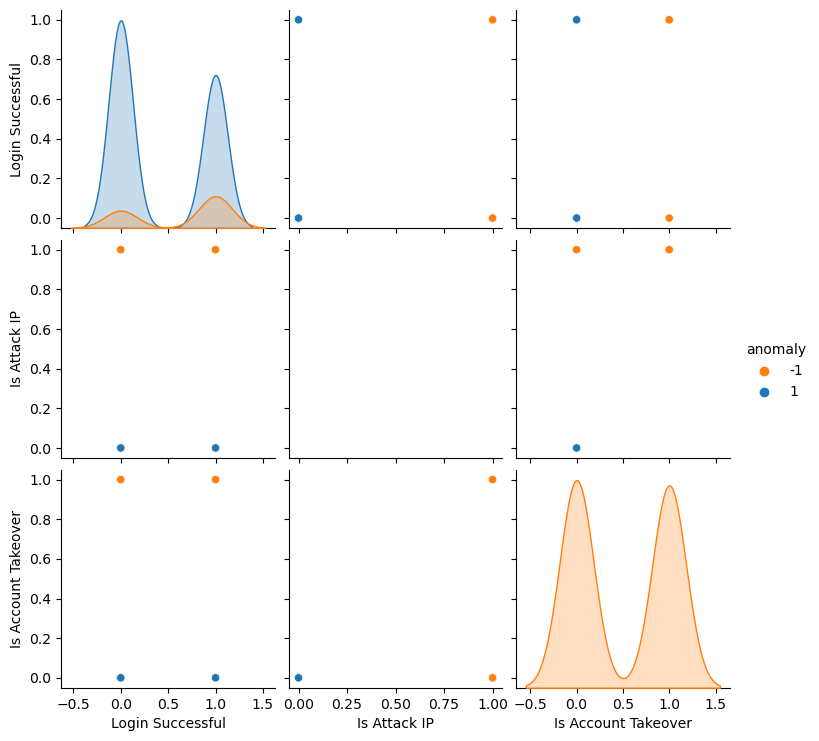

In [165]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 11) (923, 11)
(1000, 10)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 159
Accuracy Score :
0.841
Classification Report :
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       923
        True       0.09      0.12      0.10        77

    accuracy                           0.84      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.86      0.84      0.85      1000

Local Outlier Factor: 169
Accuracy Score :
0.831
Classification Report :
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       923
        True       0.04      0.05      0.05        77

    accuracy                           0.83      1000
   macro avg       0.48      0.47      0.48      1000
weighted avg       0.85      0.83      0.84      1000

Support Vector Machine: 603
Accuracy Score :
0.397
Classification Report :
              precision    recall  f1-score   support

       False       0.88      0.40      0.55       923
        True       0

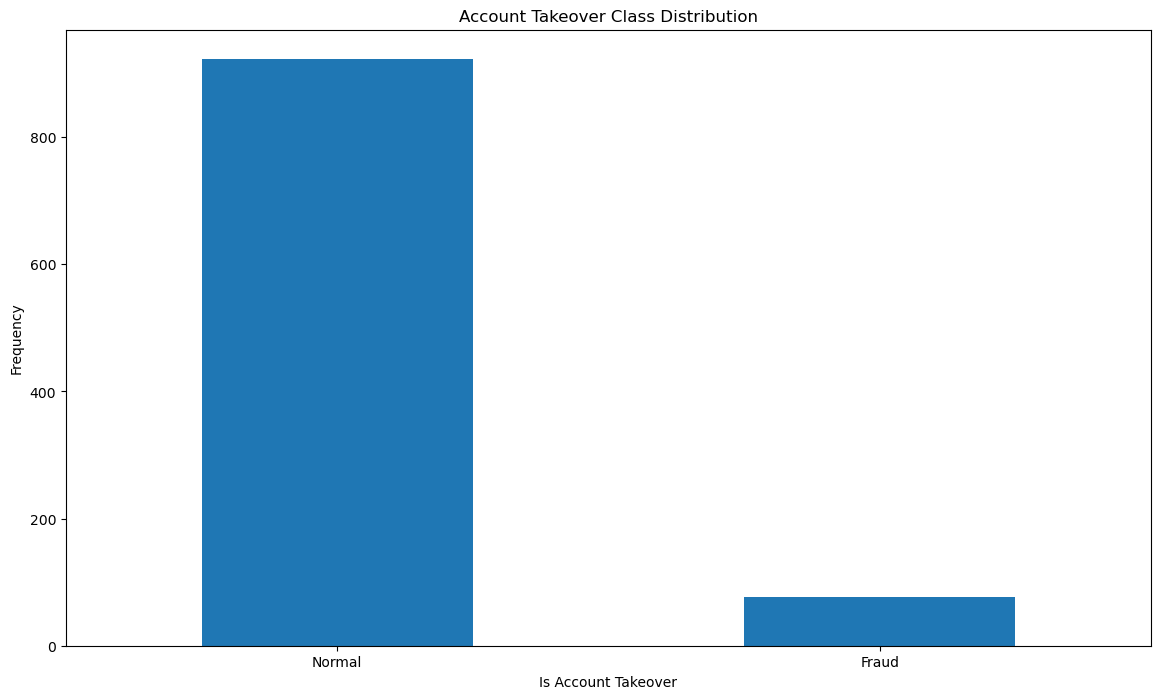

In [167]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [168]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1956 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(1950)
memory usage: 1.9 MB


User ID     ASN  Login Successful  Is Attack IP  \
0  4685694623922316169   57963              True         False   
1 -1991898760516251890   41560              True          True   
2 -7221141651022757816   29695              True         False   
3 -4324475583306591935   29492             False         False   
4 -4324475583306591935  199536             False         False   

   Is Account Takeover  Blacklisted  cntr_AR  cntr_AT  cntr_AU  cntr_BD  ...  \
0                False        False        0        0        0        0  ...   
1                 True        False        0        0        0        0  ...   
2                False        False        0        0        0        0  ...   
3                False        False        0        0        0        0  ...   
4                False        False        0        0        0        0  ...   

   lgnt_2021-02-25 15:36:58.213  lgnt_2021-02-26 10:11:24.224  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-26 12:36:42.680  lgnt_2021-02-26 15:35:23.083  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-26 18:15:39.493  lgnt_2021-02-27 00:19:15.501  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-27 00:43:44.689  brw_C  brw_F  brw_O  
0                             0      0      0      1  
1                             0      1      0      0  
2                             0      1      0      0  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 1956 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1955 entries, User ID to brw_O
dtypes: bool(3), int64(2), uint8(1950)
memory usage: 1.9 MB
Accuracy: 99.39%
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       301
        True       0.97      0.97      0.97        29

    accuracy                           0.99       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.99      0.99      0.99       330

TN: 0, FP: 2, FN: 1, TP: 1


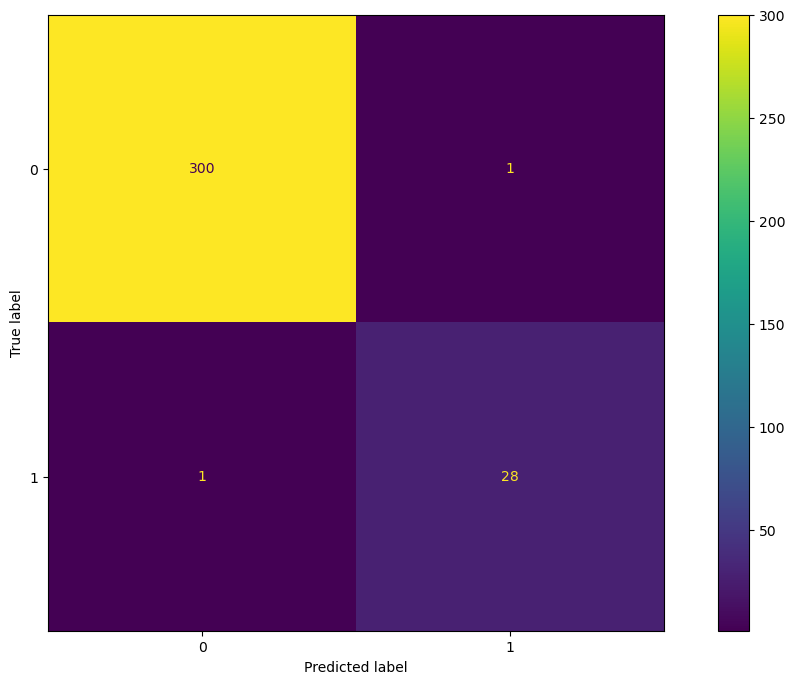

In [169]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 742 records for the majority class and 58 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       181
        True       0.10      1.00      0.17        19

    accuracy                           0.10       200
   macro avg       0.05      0.50      0.09       200
weighted avg       0.01      0.10      0.02       200

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       181
        True       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

[[  0 181]
 [  0  19]]


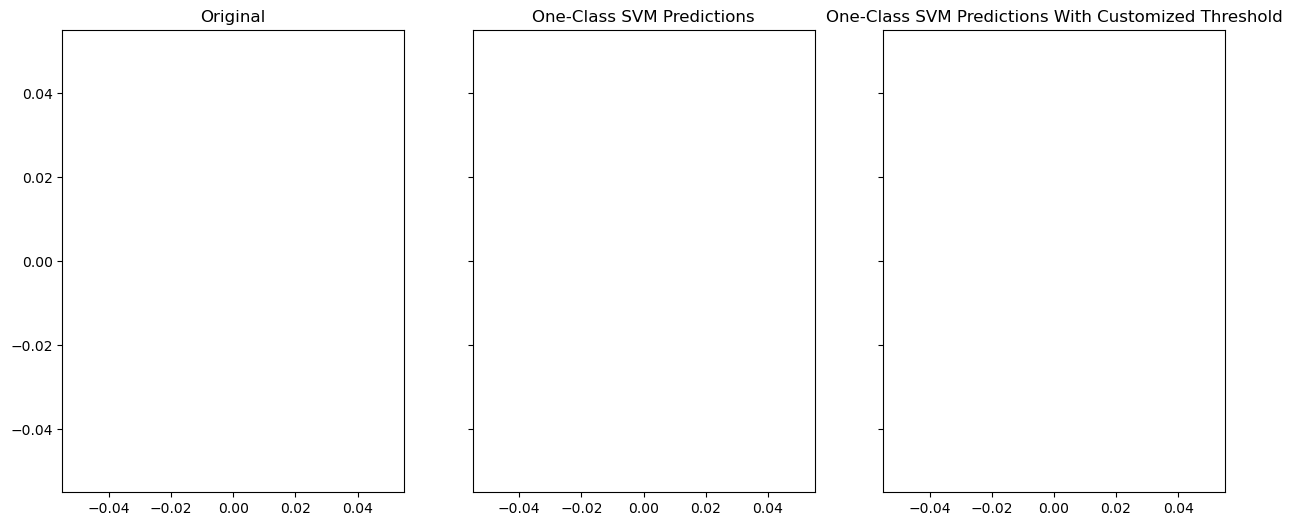

In [170]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 700
The number of records in the test dataset is 300
The training dataset has 655 records for the majority class and 45 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       268
        True       0.11      1.00      0.19        32

    accuracy                           0.11       300
   macro avg       0.05      0.50      0.10       300
weighted avg       0.01      0.11      0.02       300

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       268
        True       0.00      0.00      0.00        32

    accuracy                           0.89       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.89      0.84       300

[[  0 268]
 [  0  32]]


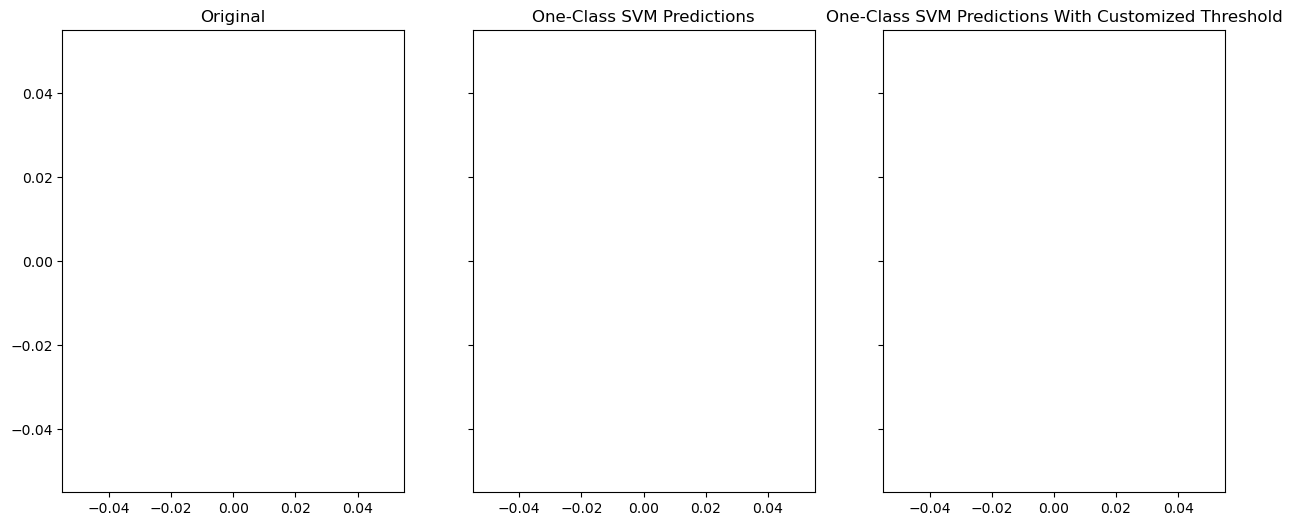

In [171]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 500
The number of records in the test dataset is 500
The training dataset has 472 records for the majority class and 28 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.00      0.00       451
        True       0.10      1.00      0.18        49

    accuracy                           0.10       500
   macro avg       0.55      0.50      0.09       500
weighted avg       0.91      0.10      0.02       500

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       451
        True       0.00      0.00      0.00        49

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.86       500

[[  1 450]
 [  0  49]]


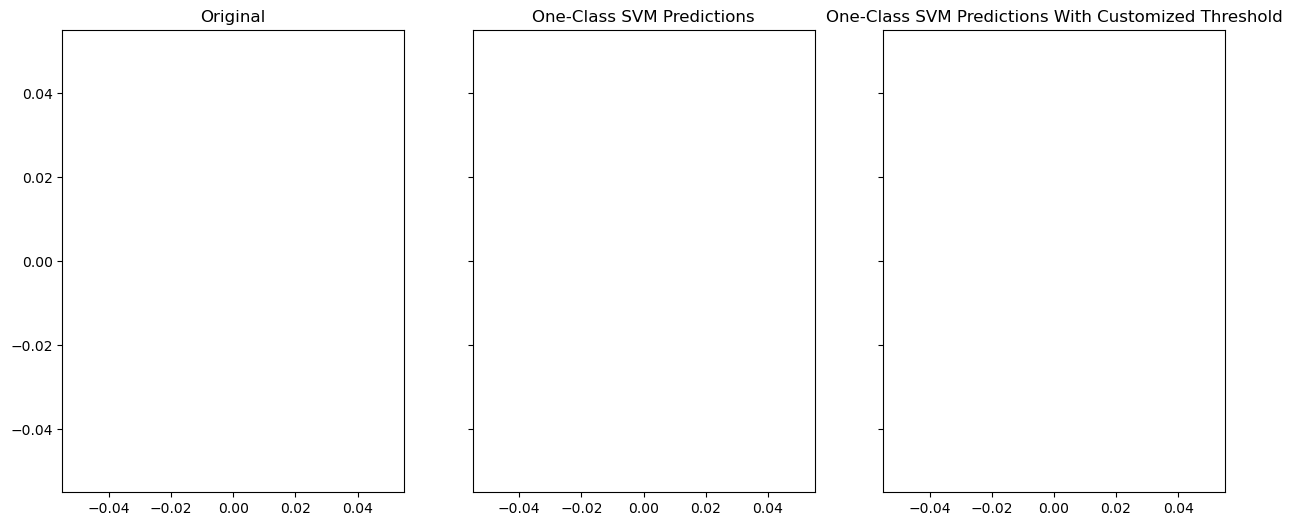

In [172]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:1955]
Y = dataset.iloc[:,1955]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 90
Number of non anomalous values  910
Total Number of Values: 1000


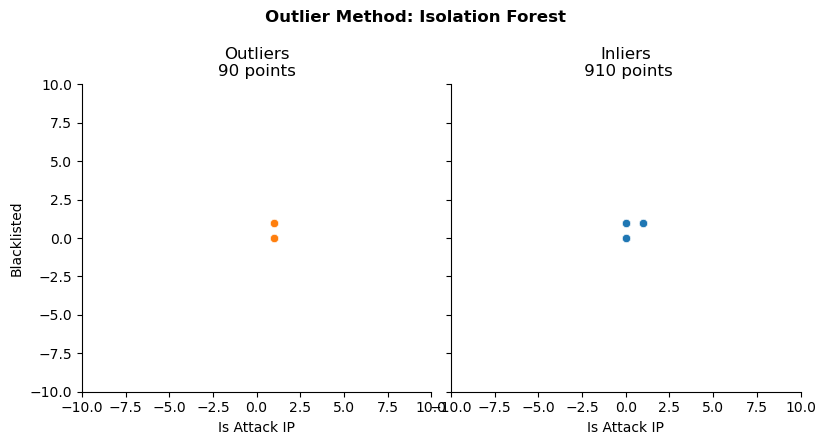

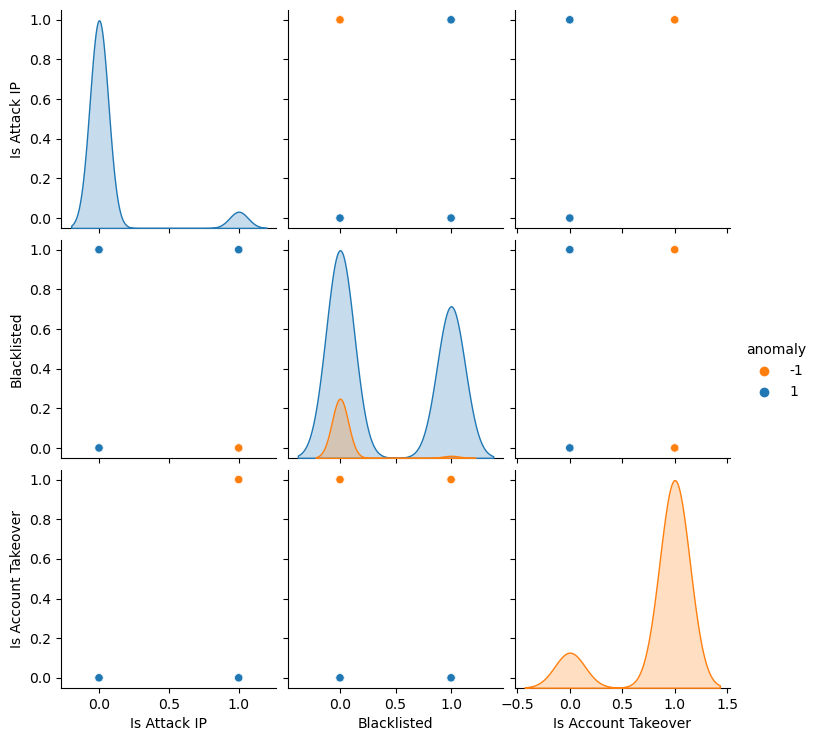

In [173]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


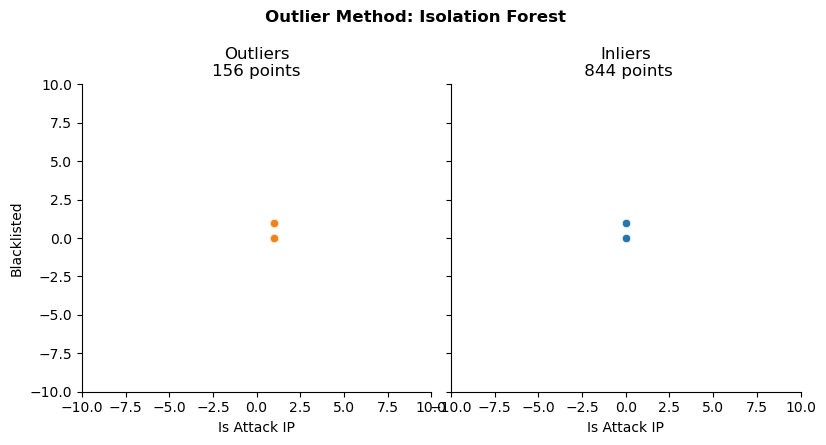

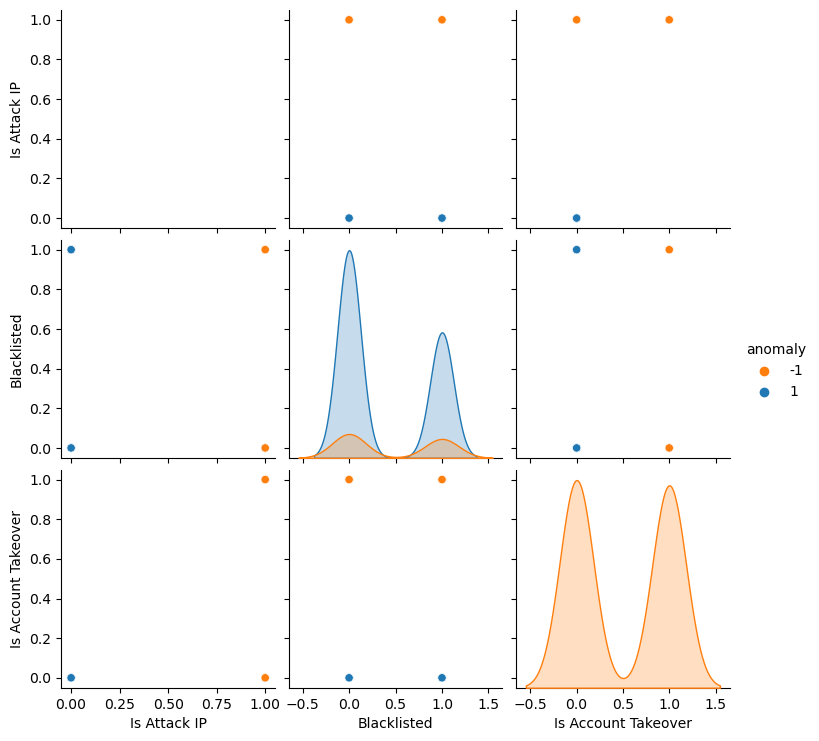

In [174]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 474
Number of non anomalous values  526
Total Number of Values: 1000


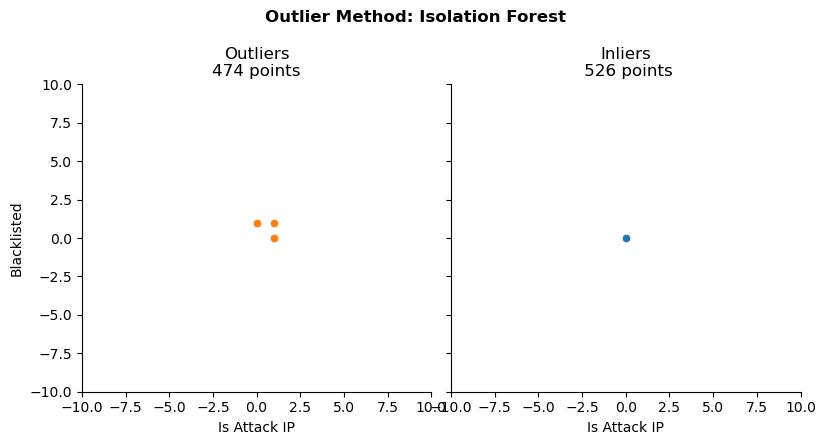

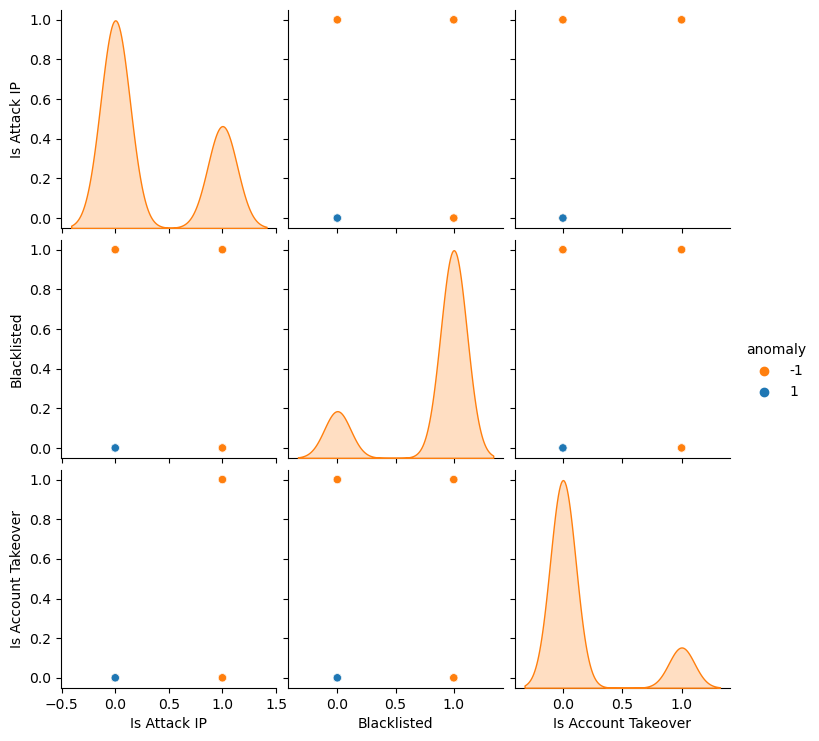

In [175]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 77
Number of non anomalous values  923
Total Number of Values: 1000


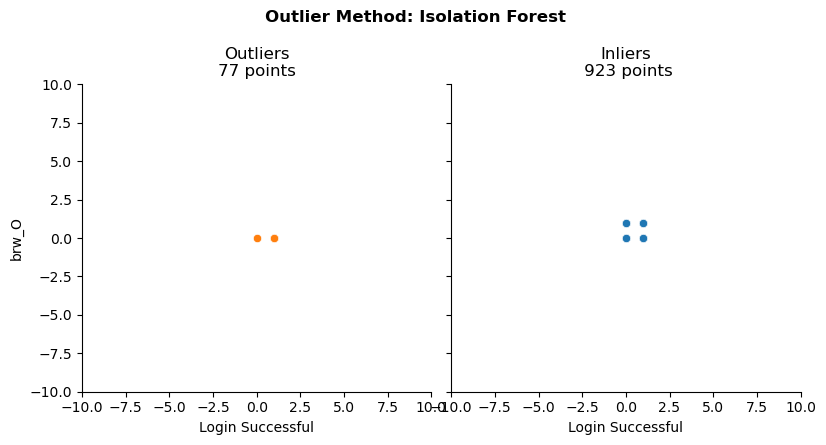

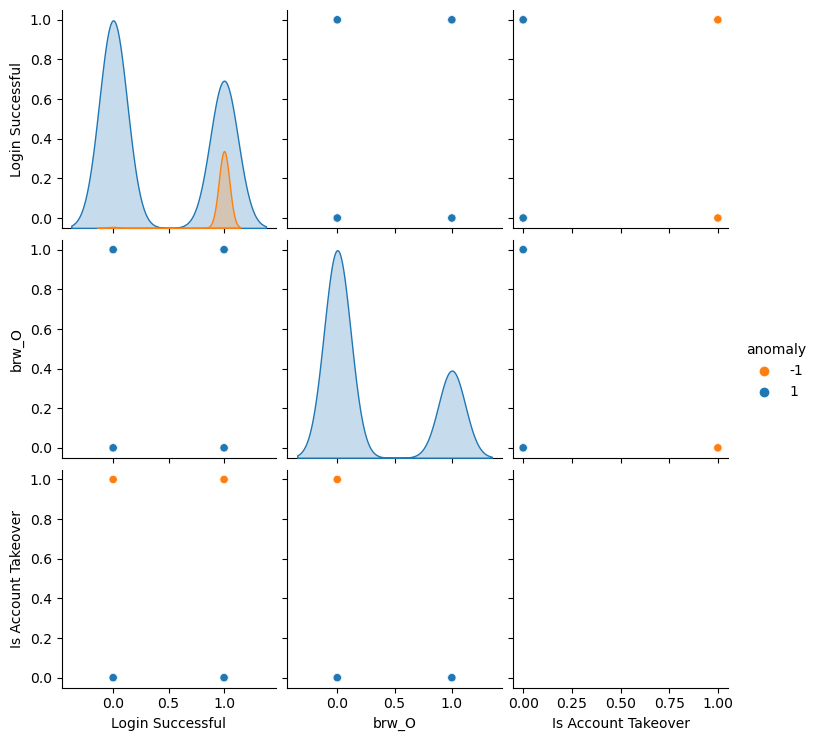

In [176]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 185
Number of non anomalous values  815
Total Number of Values: 1000


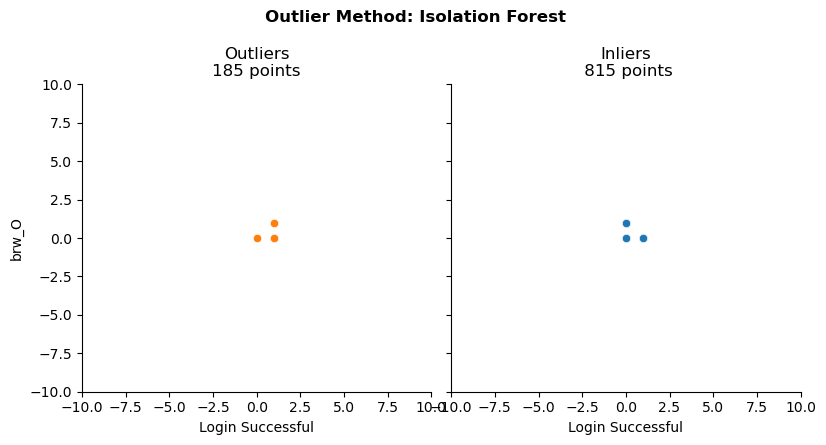

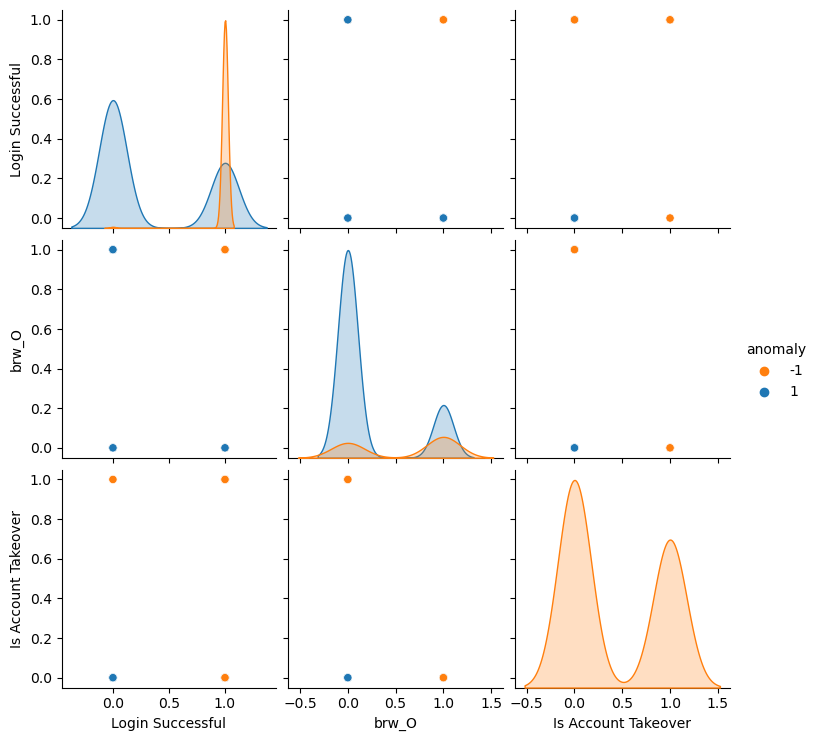

In [177]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 350
Number of non anomalous values  650
Total Number of Values: 1000


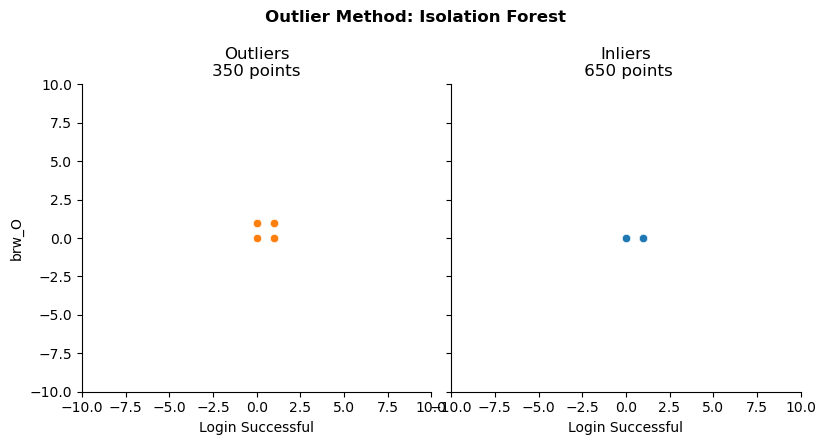

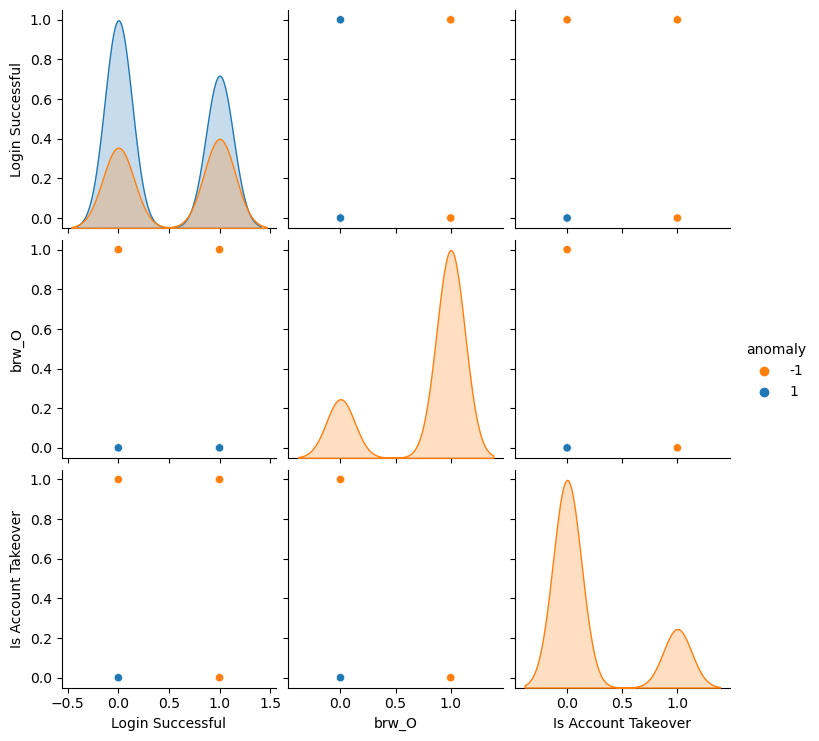

In [178]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 80
Number of non anomalous values  920
Total Number of Values: 1000


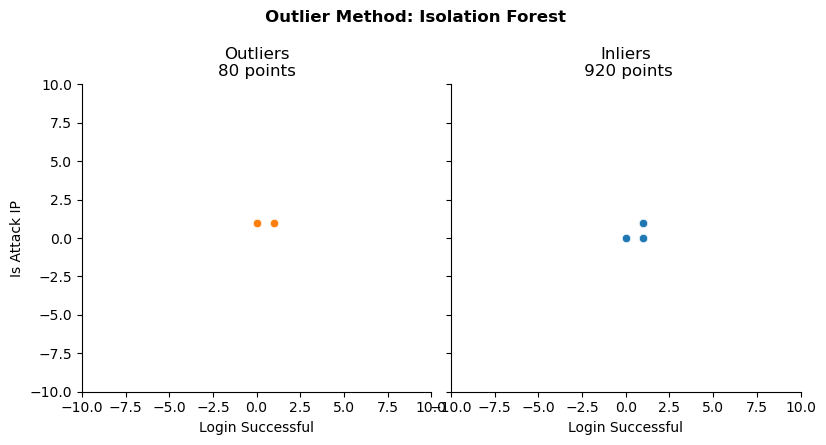

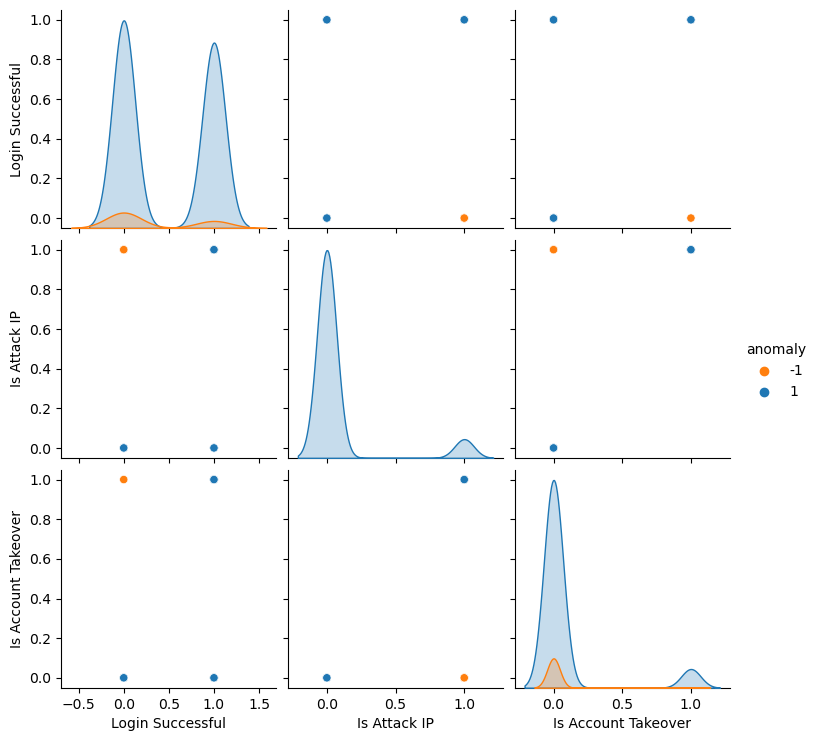

In [179]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


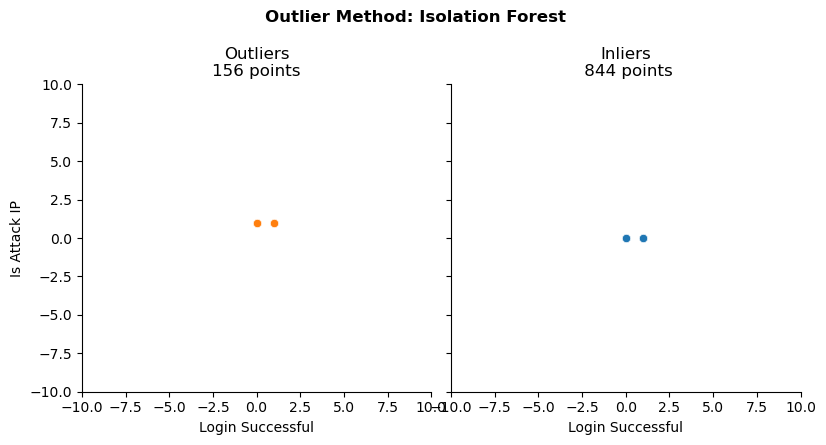

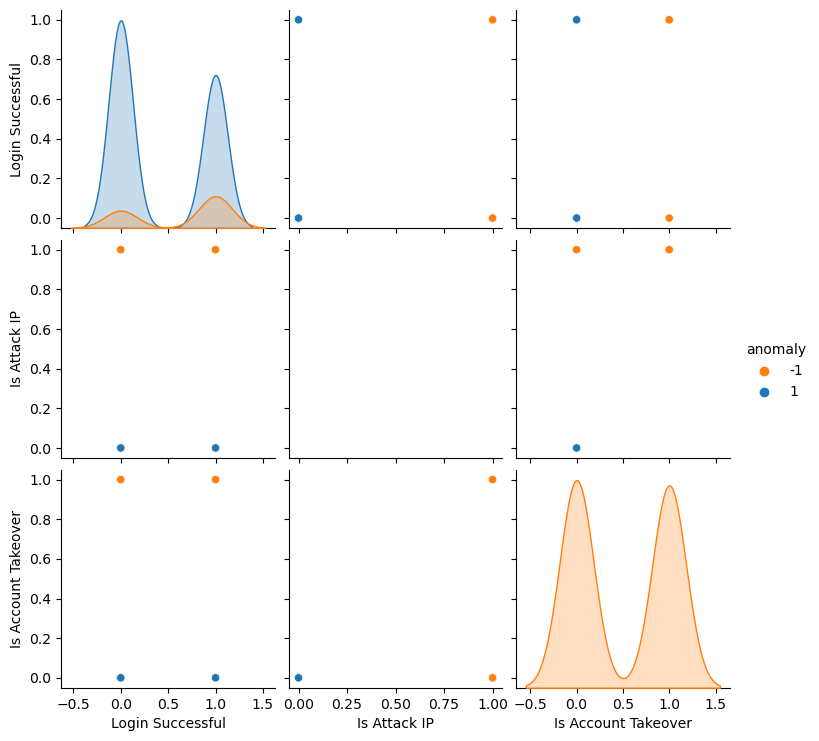

In [180]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 156
Number of non anomalous values  844
Total Number of Values: 1000


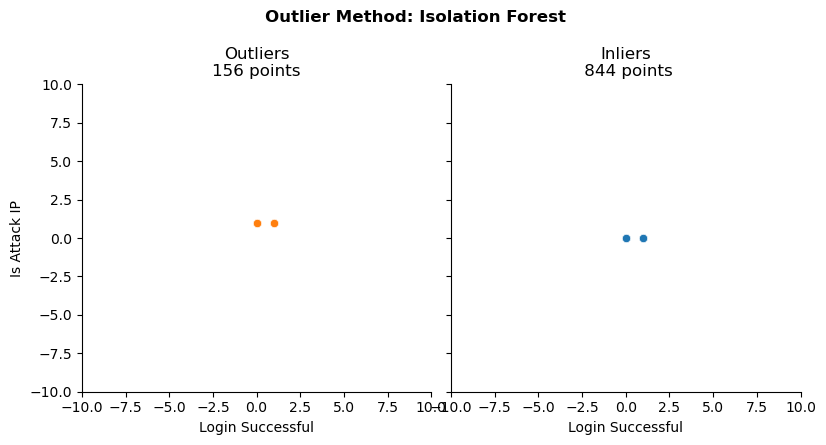

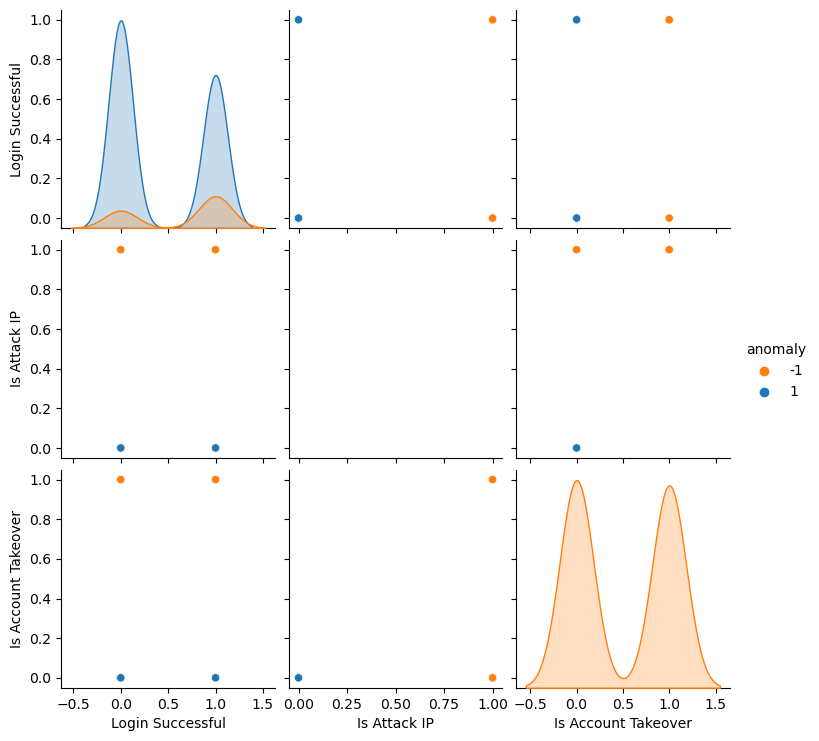

In [181]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 1956) (923, 1956)
(1000, 1955)
(1000,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 147
Accuracy Score :
0.853
Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.91      0.92       923
        True       0.15      0.19      0.17        77

    accuracy                           0.85      1000
   macro avg       0.54      0.55      0.54      1000
weighted avg       0.87      0.85      0.86      1000

Local Outlier Factor: 147
Accuracy Score :
0.853
Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.91      0.92       923
        True       0.15      0.19      0.17        77

    accuracy                           0.85      1000
   macro avg       0.54      0.55      0.54      1000
weighted avg       0.87      0.85      0.86      1000

Support Vector Machine: 603
Accuracy Score :
0.397
Classification Report :
              precision    recall  f1-score   support

       False       0.88      0.40      0.55       923
        True       0

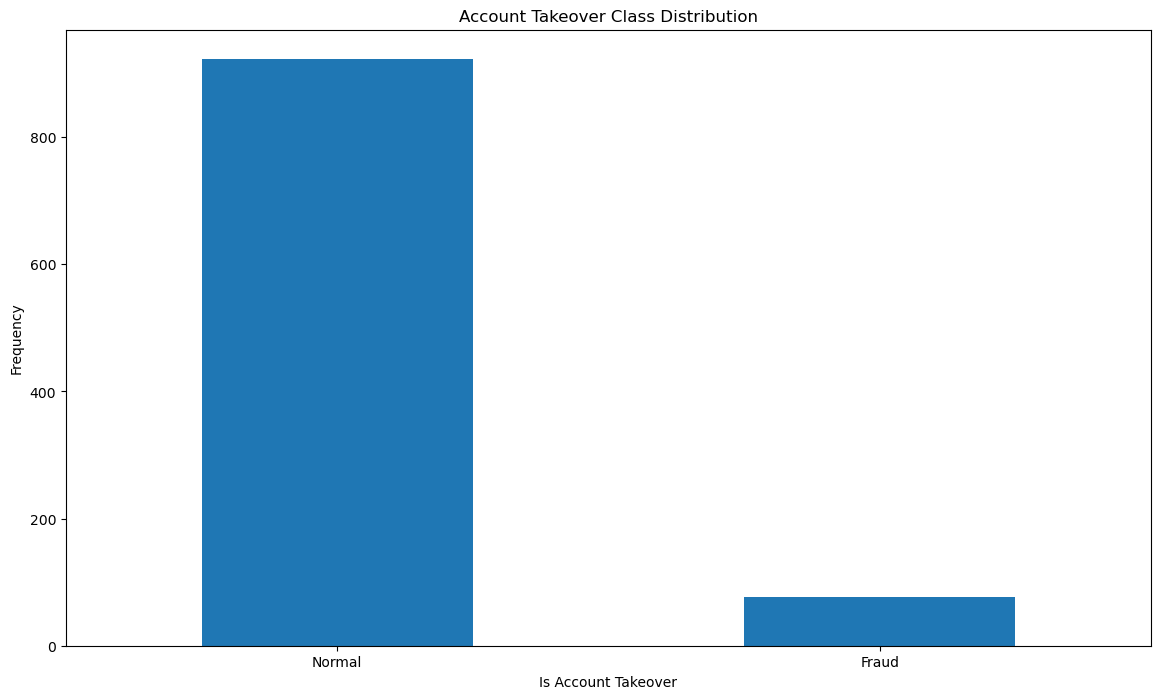

In [182]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))